In [40]:
import pandas as pd

from tqdm import tqdm
import numpy as np

In [2]:
!pwd

/cephyr/NOBACKUP/groups/naiss2023-23-453/Gene_Regulatory_Network_ROSMAP/code/New_GRN_ROSMAP/code/community_detection_Tf


In [3]:
AD_filtered_data = pd.read_csv('AD_filtered_data.csv', index_col=0)

In [4]:
AD_filtered_data

424_120507  444_120507  497_120515  \
ENSG00000158711_ENSG00000188566    7.969756    7.410295    7.148141   
ENSG00000108924_ENSG00000205138   16.216685   16.137094   16.334936   
ENSG00000187815_ENSG00000203705    7.287224    7.489927    7.449483   
ENSG00000074047_ENSG00000196724    7.736812    8.187622    7.748858   
ENSG00000112837_ENSG00000070159    7.452242    7.475133    7.653389   
...                                     ...         ...         ...   
ENSG00000234284_ENSG00000235552    6.732936    7.617611    7.113464   
ENSG00000173041_ENSG00000187527   11.313417   11.801492   11.409871   
ENSG00000078900_ENSG00000119979    6.649116    6.222744    6.184389   
ENSG00000196652_ENSG00000064199    6.316397    6.585316    6.483376   
ENSG00000234284_ENSG00000212978    6.936890    7.423111    6.624685   

                                 232_120425  602_120523  545_120516  \
ENSG00000158711_ENSG00000188566    5.352174    7.126949    5.663472   
ENSG00000108924_ENSG00000205138   17.053382   16.547971   17.234849   
ENSG00000187815_ENSG00000203705    7.457981    7.297276    8.808235   
ENSG00000074047_ENSG00000196724    8.300743    7.389209    7.968920   
ENSG00000112837_ENSG00000070159    8.644384    7.557495    7.697672   
...                                     ...         ...         ...   
ENSG00000234284_ENSG00000235552    6.242067    7.286645    7.590630   
ENSG00000173041_ENSG00000187527   10.478145   10.832541   10.781816   
ENSG00000078900_ENSG00000119979    6.328958    6.047195    6.378106   
ENSG00000196652_ENSG00000064199    6.410056    6.520374    6.550678   
ENSG00000234284_ENSG00000212978    6.202174    6.853531    6.882458   

                                 553_120517  711_120531  309_120430  \
ENSG00000158711_ENSG00000188566    6.198962    6.369835    6.180261   
ENSG00000108924_ENSG00000205138   16.250830   15.600409   16.120988   
ENSG00000187815_ENSG00000203705    7.712538    7.457003    7.240016   
ENSG00000074047_ENSG00000196724    7.513364    7.621810    7.804327   
ENSG00000112837_ENSG00000070159    8.052298    7.482970    7.460650   
...                                     ...         ...         ...   
ENSG00000234284_ENSG00000235552    6.989914    7.467580    6.645855   
ENSG00000173041_ENSG00000187527   11.506942   11.127054   11.285983   
ENSG00000078900_ENSG00000119979    6.237306    6.384785    6.282525   
ENSG00000196652_ENSG00000064199    6.370126    6.609303    6.630917   
ENSG00000234284_ENSG00000212978    5.899786    6.660112    6.660265   

                                 520_120515  ...  186_120424  76_120417  \
ENSG00000158711_ENSG00000188566    7.052883  ...   10.626496   6.047883   
ENSG00000108924_ENSG00000205138   16.556710  ...   16.021844  16.797422   
ENSG00000187815_ENSG00000203705    8.070063  ...    7.485934   7.539081   
ENSG00000074047_ENSG00000196724    7.785315  ...    8.032532   7.726821   
ENSG00000112837_ENSG00000070159    7.494749  ...    7.121617   7.507815   
...                                     ...  ...         ...        ...   
ENSG00000234284_ENSG00000235552    6.750323  ...    6.843543   8.147089   
ENSG00000173041_ENSG00000187527   11.046255  ...   11.398267  11.302481   
ENSG00000078900_ENSG00000119979    6.326364  ...    7.358148   6.412237   
ENSG00000196652_ENSG00000064199    6.313233  ...    6.482994   6.662500   
ENSG00000234284_ENSG00000212978    6.962187  ...   10.516587   7.430484   

                                 469_120514  363_120502  326_120501  \
ENSG00000158711_ENSG00000188566    7.178942    6.549606    8.355237   
ENSG00000108924_ENSG00000205138   16.322433   15.836347   15.961178   
ENSG00000187815_ENSG00000203705    6.846315    7.358613    7.498479   
ENSG00000074047_ENSG00000196724    7.872847    8.353533    7.837181   
ENSG00000112837_ENSG00000070159    7.512243    7.755627    8.021313   
...                                     ...         ...         ...   
ENSG00000234284_ENSG00000235552    8.048603    7.379602    7.078062   
ENSG0

In [5]:
AD_filtered_data.columns

Index(['424_120507', '444_120507', '497_120515', '232_120425', '602_120523',
       '545_120516', '553_120517', '711_120531', '309_120430', '520_120515',
       '459_120514', '286_120430', '706_120605', '708_120531', '304_120430',
       '193_120424', '568_120521', '482_120514', '942_131101', '104_120418',
       '637_120524', '721_120531', '695_120605', '350_120501', '689_120604',
       '705_120605', '231_120425', '254_120426', '550_120517', '173_120424',
       '952_131107', '12_120410', '537_120516', '604_120523', '34_120416',
       '70_120417', '427_120507', '486_120515', '321_120501', '606_120523',
       '202_120424', '617_120524', '355_120501', '292_120430', '289_120430',
       '703_120605', '511_120515', '628_120524', '56_120417', '243_120426',
       '229_120425', '36_120416', '649_120529', '77_120417', '704_120605',
       '607_120523', '280_120430', '364_120502', '237_120426', '318_120501',
       '228_120425', '23_120411', '145_120419', '02_120405', '420_120507',
       

In [5]:
import os

In [6]:
l = os.listdir('./tf_matrix_similarity/')


In [7]:
l = [i.split('.')[0] for i in l]

In [8]:
set(AD_filtered_data.columns)- set(l)

set()

In [9]:
data = pd.read_csv('./tf_matrix_similarity/12_120410.csv', index_col=0)

In [10]:
(data==10.0).sum()

reg_ENSG00000001167     5
reg_ENSG00000004848     2
reg_ENSG00000005513     2
reg_ENSG00000006047     2
reg_ENSG00000006468    21
                       ..
reg_ENSG00000267508     1
reg_ENSG00000267680    98
reg_ENSG00000272602     2
reg_ENSG00000275111    98
reg_ENSG00000278129     1
Length: 663, dtype: int64

In [11]:
data.sum().sum()

449096.0

In [12]:
data = pd.read_csv('./tf_matrix_similarity/02_120405.csv', index_col=0)
data

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                 10.0                  0.0   
reg_ENSG00000004848                  0.0                 10.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                 10.0                  0.0   
reg_ENSG00000006047                  0.0                 10.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  1.0                  0.0   
reg_ENSG00000267680                  9.0                  0.0   
reg_ENSG00000272602                  0.0                  1.0   
reg_ENSG00000275111                  0.0                  2.0   
reg_ENSG00000278129                  7.0                  0.0   

                     reg_ENSG00000006468  reg_ENSG00000007372  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                 10.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  1.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  1.0   

                     reg_ENSG00000007866  reg_ENSG00000008441  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  2.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  2.0   
reg_ENSG00000267680                  3.0                  0.0   
reg_ENSG00000272602                  0.0                  1.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  1.0                  0.0   

                     reg_ENSG00000009709  reg_ENSG00000009950  ...  \
reg_ENSG00000001167                  0.0                  0.0  ...   
reg_ENSG00000004848                  0.0                  0.0  ...   
reg_ENSG00000005513                  0.0                  0.0  ...   
reg_ENSG00000006047                  2.0                  0.0  ...   
reg_ENSG00000006468                  0.0                  0.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0                  0.0  ...   
reg_ENSG00000267680                  0.0                  0.0  ...   
reg_ENSG00000272602                  7.0                  0.0  ...   
reg_ENSG00000275111                 10.0                  0.0  ...   
reg_ENSG00000278129                  0.0                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [13]:
data = np.round(data/14)


In [14]:
data

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  1.0                  0.0   
reg_ENSG00000004848                  0.0                  1.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  1.0                  0.0   
reg_ENSG00000006047                  0.0                  1.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  1.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000006468  reg_ENSG00000007372  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  1.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007866  reg_ENSG00000008441  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000009709  reg_ENSG00000009950  ...  \
reg_ENSG00000001167                  0.0                  0.0  ...   
reg_ENSG00000004848                  0.0                  0.0  ...   
reg_ENSG00000005513                  0.0                  0.0  ...   
reg_ENSG00000006047                  0.0                  0.0  ...   
reg_ENSG00000006468                  0.0                  0.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0                  0.0  ...   
reg_ENSG00000267680                  0.0                  0.0  ...   
reg_ENSG00000272602                  0.0                  0.0  ...   
reg_ENSG00000275111                  1.0                  0.0  ...   
reg_ENSG00000278129                  0.0                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [15]:
(data == 1.0).sum().sum()

32799

In [16]:
rows_col= os.listdir('./tf_matrix_similarity/')

In [17]:
rows = cols = len(rows_col) # number of rowsprint
    

tf_matrix_2 = pd.DataFrame(np.zeros((rows, cols)), columns=[f'{i}' for i in rows_col])
tf_matrix_1 = pd.DataFrame(np.zeros((rows, cols)), columns=[f'{i}' for i in rows_col])

In [18]:
tf_matrix_2.index  = rows_col
tf_matrix_1.index  = rows_col

In [19]:
tf_matrix_2

23_120411.csv  193_120424.csv  254_120426.csv  76_120417.csv  \
23_120411.csv             0.0             0.0             0.0            0.0   
193_120424.csv            0.0             0.0             0.0            0.0   
254_120426.csv            0.0             0.0             0.0            0.0   
76_120417.csv             0.0             0.0             0.0            0.0   
197_120424.csv            0.0             0.0             0.0            0.0   
...                       ...             ...             ...            ...   
420_120507.csv            0.0             0.0             0.0            0.0   
635_120524.csv            0.0             0.0             0.0            0.0   
942_131101.csv            0.0             0.0             0.0            0.0   
280_120430.csv            0.0             0.0             0.0            0.0   
689_120604.csv            0.0             0.0             0.0            0.0   

                197_120424.csv  326_120501.csv  628_120524.csv  \
23_120411.csv              0.0             0.0             0.0   
193_120424.csv             0.0             0.0             0.0   
254_120426.csv             0.0             0.0             0.0   
76_120417.csv              0.0             0.0             0.0   
197_120424.csv             0.0             0.0             0.0   
...                        ...             ...             ...   
420_120507.csv             0.0             0.0             0.0   
635_120524.csv             0.0             0.0             0.0   
942_131101.csv             0.0             0.0             0.0   
280_120430.csv             0.0             0.0             0.0   
689_120604.csv             0.0             0.0             0.0   

                520_120515.csv  550_120517.csv  214_120425.csv  ...  \
23_120411.csv              0.0             0.0             0.0  ...   
193_120424.csv             0.0             0.0             0.0  ...   
254_120426.csv             0.0             0.0             0.0  ...   
76_120417.csv              0.0             0.0             0.0  ...   
197_120424.csv             0.0             0.0             0.0  ...   
...                        ...             ...             ...  ...   
420_120507.csv             0.0             0.0             0.0  ...   
635_120524.csv             0.0             0.0             0.0  ...   
942_131101.csv             0.0             0.0             0.0  ...   
280_120430.csv             0.0             0.0             0.0  ...   
689_120604.csv             0.0             0.0             0.0  ...   

                554_120517.csv  70_120417.csv  649_120529.csv  617_120524.csv  \
23_120411.csv              0.0            0.0             0.0             0.0   
193_120424.csv             0.0            0.0             0.0             0.0   
254_120426.csv             0.0            0.0             0.0             0.0   
76_120417.csv              0.0            0.0             0.0             0.0   
197_120424.csv             0.0            0.0             0.0             0.0   
...                        ...            ...             ...             ...   
420_120507.csv             0.0            0.0             0.0             0.0   
635_120524.csv             0.0            0.0             0.0             0.0   
942_131101.csv             0.0            0.0             0.0             0.0   
280_120430.csv             0.0            0.0             0.0             0.0   
689_120604.csv             0.0            0.0             0.0             0.0   

                434_120507.csv  420_120507.csv  635_120524.csv  \
23_120411.csv              0.0             0.0             0.0   
193_120424.csv             0.0             0.0             0.0   
254_120426.csv             0.0             0.0             0.0   
76_120417.csv              0.0             0.0             0.0   
197_120424.csv             0.0             0.0             0.0   
...                        ...          

In [45]:
for i in tqdm(os.listdir('./tf_matrix_similarity/')):
    if '.csv' not in i:
        continue
    for j in os.listdir('./tf_matrix_similarity/'):
        if '.csv' not in j:
            continue
        
        #print(i,j)

        data_1 = pd.read_csv('./tf_matrix_similarity/'+ i,index_col=0)
        #print(data_1)
        data_1 = np.round(data_1/14)  #14 make sure 70 percent

        data_2 = pd.read_csv('./tf_matrix_similarity/'+ j,index_col=0)
        data_2 = np.round(data_2/14)
        norm = max(data_1.sum().sum(),data_2.sum().sum())

        data = data_1+data_2
        number_1 = (data == 1.0).sum().sum()
        number_2 = (data == 2.0).sum().sum()
        #print(norm)
        tf_matrix_1.loc[i,j] = number_1/norm
        tf_matrix_2.loc[i,j] = number_2/norm

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [12:40<00:00,  8.36s/it]


In [46]:
tf_matrix_2

23_120411.csv  193_120424.csv  254_120426.csv  76_120417.csv  \
23_120411.csv        1.000000        0.921420        0.878216       0.904031   
193_120424.csv       0.921420        1.000000        0.878850       0.922619   
254_120426.csv       0.878216        0.878850        1.000000       0.866990   
76_120417.csv        0.904031        0.922619        0.866990       1.000000   
197_120424.csv       0.930953        0.899868        0.874306       0.900984   
...                       ...             ...             ...            ...   
420_120507.csv       0.915743        0.919536        0.889924       0.904170   
635_120524.csv       0.899033        0.883207        0.896713       0.873033   
942_131101.csv       0.879319        0.890649        0.896138       0.887050   
280_120430.csv       0.921898        0.907384        0.872942       0.910538   
689_120604.csv       0.924169        0.910944        0.894566       0.900587   

                197_120424.csv  326_120501.csv  628_120524.csv  \
23_120411.csv         0.930953        0.916312        0.914727   
193_120424.csv        0.899868        0.914584        0.902402   
254_120426.csv        0.874306        0.877893        0.900358   
76_120417.csv         0.900984        0.887423        0.882017   
197_120424.csv        1.000000        0.908388        0.904863   
...                        ...             ...             ...   
420_120507.csv        0.912913        0.917801        0.898975   
635_120524.csv        0.876598        0.894630        0.887491   
942_131101.csv        0.891465        0.893246        0.886223   
280_120430.csv        0.915146        0.885993        0.884783   
689_120604.csv        0.911209        0.902552        0.932710   

                520_120515.csv  550_120517.csv  214_120425.csv  ...  \
23_120411.csv         0.914542        0.845469        0.910723  ...   
193_120424.csv        0.896533        0.867001        0.907759  ...   
254_120426.csv        0.894468        0.883205        0.899604  ...   
76_120417.csv         0.881449        0.862987        0.882086  ...   
197_120424.csv        0.915001        0.843161        0.901866  ...   
...                        ...             ...             ...  ...   
420_120507.csv        0.894640        0.864790        0.903229  ...   
635_120524.csv        0.902612        0.837335        0.905578  ...   
942_131101.csv        0.895787        0.857956        0.900269  ...   
280_120430.csv        0.875427        0.878124        0.895074  ...   
689_120604.csv        0.893551        0.861328        0.907451  ...   

                554_120517.csv  70_120417.csv  649_120529.csv  617_120524.csv  \
23_120411.csv         0.880008       0.903493        0.920392        0.881084   
193_120424.csv        0.882840       0.908110        0.905849        0.878064   
254_120426.csv        0.876913       0.902813        0.877806        0.879112   
76_120417.csv         0.886641       0.914117        0.894435        0.869477   
197_120424.csv        0.862259       0.906155        0.930010        0.876421   
...                        ...            ...             ...             ...   
420_120507.csv        0.901615       0.938502        0.911411        0.914014   
635_120524.csv        0.860062       0.886063        0.895999        0.861609   
942_131101.csv        0.855773       0.884512        0.910194        0.843675   
280_120430.csv        0.876204       0.920793        0.886671        0.909831   
689_120604.csv        0.885895       0.910703        0.925374        0.896914   

                434_120507.csv  420_120507.csv  635_120524.csv  \
23_120411.csv         0.904426        0.915743        0.899033   
193_120424.csv        0.900454        0.919536        0.883207   
254_120426.csv        0.900513        0.889924        0.896713   
76_120417.csv         0.890078        0.904170        0.873033   
197_120424.csv        0.910445        0.912913        0.876598   
...                        ...          

In [47]:
data[data == 2].sum()

reg_ENSG00000001167     16.0
reg_ENSG00000004848     12.0
reg_ENSG00000005513    214.0
reg_ENSG00000006047      4.0
reg_ENSG00000006468     44.0
                       ...  
reg_ENSG00000267508      2.0
reg_ENSG00000267680    246.0
reg_ENSG00000272602    212.0
reg_ENSG00000275111    248.0
reg_ENSG00000278129      2.0
Length: 663, dtype: float64

In [48]:
(data == 2.0).sum()

reg_ENSG00000001167      8
reg_ENSG00000004848      6
reg_ENSG00000005513    107
reg_ENSG00000006047      2
reg_ENSG00000006468     22
                      ... 
reg_ENSG00000267508      1
reg_ENSG00000267680    123
reg_ENSG00000272602    106
reg_ENSG00000275111    124
reg_ENSG00000278129      1
Length: 663, dtype: int64

In [49]:
tf_matrix_2

23_120411.csv  193_120424.csv  254_120426.csv  76_120417.csv  \
23_120411.csv        1.000000        0.921420        0.878216       0.904031   
193_120424.csv       0.921420        1.000000        0.878850       0.922619   
254_120426.csv       0.878216        0.878850        1.000000       0.866990   
76_120417.csv        0.904031        0.922619        0.866990       1.000000   
197_120424.csv       0.930953        0.899868        0.874306       0.900984   
...                       ...             ...             ...            ...   
420_120507.csv       0.915743        0.919536        0.889924       0.904170   
635_120524.csv       0.899033        0.883207        0.896713       0.873033   
942_131101.csv       0.879319        0.890649        0.896138       0.887050   
280_120430.csv       0.921898        0.907384        0.872942       0.910538   
689_120604.csv       0.924169        0.910944        0.894566       0.900587   

                197_120424.csv  326_120501.csv  628_120524.csv  \
23_120411.csv         0.930953        0.916312        0.914727   
193_120424.csv        0.899868        0.914584        0.902402   
254_120426.csv        0.874306        0.877893        0.900358   
76_120417.csv         0.900984        0.887423        0.882017   
197_120424.csv        1.000000        0.908388        0.904863   
...                        ...             ...             ...   
420_120507.csv        0.912913        0.917801        0.898975   
635_120524.csv        0.876598        0.894630        0.887491   
942_131101.csv        0.891465        0.893246        0.886223   
280_120430.csv        0.915146        0.885993        0.884783   
689_120604.csv        0.911209        0.902552        0.932710   

                520_120515.csv  550_120517.csv  214_120425.csv  ...  \
23_120411.csv         0.914542        0.845469        0.910723  ...   
193_120424.csv        0.896533        0.867001        0.907759  ...   
254_120426.csv        0.894468        0.883205        0.899604  ...   
76_120417.csv         0.881449        0.862987        0.882086  ...   
197_120424.csv        0.915001        0.843161        0.901866  ...   
...                        ...             ...             ...  ...   
420_120507.csv        0.894640        0.864790        0.903229  ...   
635_120524.csv        0.902612        0.837335        0.905578  ...   
942_131101.csv        0.895787        0.857956        0.900269  ...   
280_120430.csv        0.875427        0.878124        0.895074  ...   
689_120604.csv        0.893551        0.861328        0.907451  ...   

                554_120517.csv  70_120417.csv  649_120529.csv  617_120524.csv  \
23_120411.csv         0.880008       0.903493        0.920392        0.881084   
193_120424.csv        0.882840       0.908110        0.905849        0.878064   
254_120426.csv        0.876913       0.902813        0.877806        0.879112   
76_120417.csv         0.886641       0.914117        0.894435        0.869477   
197_120424.csv        0.862259       0.906155        0.930010        0.876421   
...                        ...            ...             ...             ...   
420_120507.csv        0.901615       0.938502        0.911411        0.914014   
635_120524.csv        0.860062       0.886063        0.895999        0.861609   
942_131101.csv        0.855773       0.884512        0.910194        0.843675   
280_120430.csv        0.876204       0.920793        0.886671        0.909831   
689_120604.csv        0.885895       0.910703        0.925374        0.896914   

                434_120507.csv  420_120507.csv  635_120524.csv  \
23_120411.csv         0.904426        0.915743        0.899033   
193_120424.csv        0.900454        0.919536        0.883207   
254_120426.csv        0.900513        0.889924        0.896713   
76_120417.csv         0.890078        0.904170        0.873033   
197_120424.csv        0.910445        0.912913        0.876598   
...                        ...          

In [50]:

distance_matrix_2 = 1-tf_matrix_2 

In [51]:
distance_matrix_2

23_120411.csv  193_120424.csv  254_120426.csv  76_120417.csv  \
23_120411.csv        0.000000        0.078580        0.121784       0.095969   
193_120424.csv       0.078580        0.000000        0.121150       0.077381   
254_120426.csv       0.121784        0.121150        0.000000       0.133010   
76_120417.csv        0.095969        0.077381        0.133010       0.000000   
197_120424.csv       0.069047        0.100132        0.125694       0.099016   
...                       ...             ...             ...            ...   
420_120507.csv       0.084257        0.080464        0.110076       0.095830   
635_120524.csv       0.100967        0.116793        0.103287       0.126967   
942_131101.csv       0.120681        0.109351        0.103862       0.112950   
280_120430.csv       0.078102        0.092616        0.127058       0.089462   
689_120604.csv       0.075831        0.089056        0.105434       0.099413   

                197_120424.csv  326_120501.csv  628_120524.csv  \
23_120411.csv         0.069047        0.083688        0.085273   
193_120424.csv        0.100132        0.085416        0.097598   
254_120426.csv        0.125694        0.122107        0.099642   
76_120417.csv         0.099016        0.112577        0.117983   
197_120424.csv        0.000000        0.091612        0.095137   
...                        ...             ...             ...   
420_120507.csv        0.087087        0.082199        0.101025   
635_120524.csv        0.123402        0.105370        0.112509   
942_131101.csv        0.108535        0.106754        0.113777   
280_120430.csv        0.084854        0.114007        0.115217   
689_120604.csv        0.088791        0.097448        0.067290   

                520_120515.csv  550_120517.csv  214_120425.csv  ...  \
23_120411.csv         0.085458        0.154531        0.089277  ...   
193_120424.csv        0.103467        0.132999        0.092241  ...   
254_120426.csv        0.105532        0.116795        0.100396  ...   
76_120417.csv         0.118551        0.137013        0.117914  ...   
197_120424.csv        0.084999        0.156839        0.098134  ...   
...                        ...             ...             ...  ...   
420_120507.csv        0.105360        0.135210        0.096771  ...   
635_120524.csv        0.097388        0.162665        0.094422  ...   
942_131101.csv        0.104213        0.142044        0.099731  ...   
280_120430.csv        0.124573        0.121876        0.104926  ...   
689_120604.csv        0.106449        0.138672        0.092549  ...   

                554_120517.csv  70_120417.csv  649_120529.csv  617_120524.csv  \
23_120411.csv         0.119992       0.096507        0.079608        0.118916   
193_120424.csv        0.117160       0.091890        0.094151        0.121936   
254_120426.csv        0.123087       0.097187        0.122194        0.120888   
76_120417.csv         0.113359       0.085883        0.105565        0.130523   
197_120424.csv        0.137741       0.093845        0.069990        0.123579   
...                        ...            ...             ...             ...   
420_120507.csv        0.098385       0.061498        0.088589        0.085986   
635_120524.csv        0.139938       0.113937        0.104001        0.138391   
942_131101.csv        0.144227       0.115488        0.089806        0.156325   
280_120430.csv        0.123796       0.079207        0.113329        0.090169   
689_120604.csv        0.114105       0.089297        0.074626        0.103086   

                434_120507.csv  420_120507.csv  635_120524.csv  \
23_120411.csv         0.095574        0.084257        0.100967   
193_120424.csv        0.099546        0.080464        0.116793   
254_120426.csv        0.099487        0.110076        0.103287   
76_120417.csv         0.109922        0.095830        0.126967   
197_120424.csv        0.089555        0.087087        0.123402   
...                        ...          

In [52]:
distance_matrix_2.min()

23_120411.csv     0.0
193_120424.csv    0.0
254_120426.csv    0.0
76_120417.csv     0.0
197_120424.csv    0.0
                 ... 
420_120507.csv    0.0
635_120524.csv    0.0
942_131101.csv    0.0
280_120430.csv    0.0
689_120604.csv    0.0
Length: 91, dtype: float64

In [53]:
distance_matrix_2.min().min()

0.0

/local/tmp.6113201/ipykernel_1405544/1590232272.py:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix_2, method='ward')


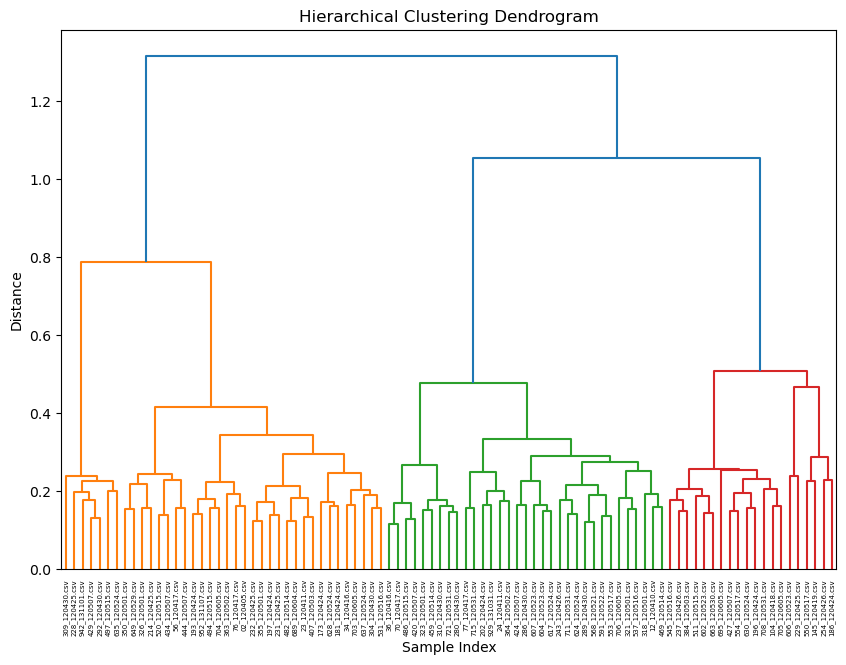

In [54]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Sample data

# Compute similarity matrix (e.g., cosine similarity)


# Convert similarity matrix to distance matrix (1 - similarity)



# Perform hierarchical clustering using the distance matrix
linked = sch.linkage(distance_matrix_2, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linked,labels=list(tf_matrix_2.columns))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()





In [55]:
from scipy.cluster.hierarchy import ward, fcluster
cluster_dct = dict(zip(list(tf_matrix_2.columns), fcluster(linked,t=1, criterion='distance').tolist()))

In [56]:
cl_dct= dict()
cluster_1 = []
cluster_2 = []
cluster_3 = []

for i,j in cluster_dct.items():
    if j == 1:
        cluster_1.append(i)
    elif j ==2:
        cluster_2.append(i)
    elif j==3:
        cluster_3.append(i)

In [57]:
cluster_1

['23_120411.csv',
 '193_120424.csv',
 '76_120417.csv',
 '197_120424.csv',
 '326_120501.csv',
 '628_120524.csv',
 '520_120515.csv',
 '214_120425.csv',
 '497_120515.csv',
 '228_120425.csv',
 '350_120501.csv',
 '363_120502.csv',
 '637_120524.csv',
 '232_120425.csv',
 '429_120507.csv',
 '56_120417.csv',
 '444_120507.csv',
 '292_120430.csv',
 '494_120515.csv',
 '304_120430.csv',
 '34_120416.csv',
 '181_120424.csv',
 '231_120425.csv',
 '703_120605.csv',
 '355_120501.csv',
 '482_120514.csv',
 '952_131107.csv',
 '704_120605.csv',
 '531_120516.csv',
 '309_120430.csv',
 '02_120405.csv',
 '173_120424.csv',
 '407_120503.csv',
 '649_120529.csv',
 '434_120507.csv',
 '635_120524.csv',
 '942_131101.csv',
 '689_120604.csv']

In [58]:
cluster_2

['243_120426.csv',
 '424_120507.csv',
 '36_120416.csv',
 '323_120501.csv',
 '24_120411.csv',
 '721_120531.csv',
 '607_120523.csv',
 '604_120523.csv',
 '286_120430.csv',
 '12_120410.csv',
 '77_120417.csv',
 '591_120522.csv',
 '715_120531.csv',
 '459_120514.csv',
 '202_120424.csv',
 '711_120531.csv',
 '706_120605.csv',
 '624_120524.csv',
 '289_120430.csv',
 '321_120501.csv',
 '310_120430.csv',
 '537_120516.csv',
 '553_120517.csv',
 '469_120514.csv',
 '486_120515.csv',
 '364_120502.csv',
 '568_120521.csv',
 '929_131031.csv',
 '318_120501.csv',
 '70_120417.csv',
 '617_120524.csv',
 '420_120507.csv',
 '280_120430.csv']

In [59]:
cluster_3

['254_120426.csv',
 '550_120517.csv',
 '427_120507.csv',
 '602_120523.csv',
 '186_120424.csv',
 '695_120605.csv',
 '104_120418.csv',
 '630_120524.csv',
 '237_120426.csv',
 '384_120503.csv',
 '606_120523.csv',
 '229_120425.csv',
 '511_120515.csv',
 '545_120516.csv',
 '663_120530.csv',
 '145_120419.csv',
 '708_120531.csv',
 '705_120605.csv',
 '196_120424.csv',
 '554_120517.csv']

In [61]:
tf_matrix_2

23_120411.csv  193_120424.csv  254_120426.csv  76_120417.csv  \
23_120411.csv        1.000000        0.921420        0.878216       0.904031   
193_120424.csv       0.921420        1.000000        0.878850       0.922619   
254_120426.csv       0.878216        0.878850        1.000000       0.866990   
76_120417.csv        0.904031        0.922619        0.866990       1.000000   
197_120424.csv       0.930953        0.899868        0.874306       0.900984   
...                       ...             ...             ...            ...   
420_120507.csv       0.915743        0.919536        0.889924       0.904170   
635_120524.csv       0.899033        0.883207        0.896713       0.873033   
942_131101.csv       0.879319        0.890649        0.896138       0.887050   
280_120430.csv       0.921898        0.907384        0.872942       0.910538   
689_120604.csv       0.924169        0.910944        0.894566       0.900587   

                197_120424.csv  326_120501.csv  628_120524.csv  \
23_120411.csv         0.930953        0.916312        0.914727   
193_120424.csv        0.899868        0.914584        0.902402   
254_120426.csv        0.874306        0.877893        0.900358   
76_120417.csv         0.900984        0.887423        0.882017   
197_120424.csv        1.000000        0.908388        0.904863   
...                        ...             ...             ...   
420_120507.csv        0.912913        0.917801        0.898975   
635_120524.csv        0.876598        0.894630        0.887491   
942_131101.csv        0.891465        0.893246        0.886223   
280_120430.csv        0.915146        0.885993        0.884783   
689_120604.csv        0.911209        0.902552        0.932710   

                520_120515.csv  550_120517.csv  214_120425.csv  ...  \
23_120411.csv         0.914542        0.845469        0.910723  ...   
193_120424.csv        0.896533        0.867001        0.907759  ...   
254_120426.csv        0.894468        0.883205        0.899604  ...   
76_120417.csv         0.881449        0.862987        0.882086  ...   
197_120424.csv        0.915001        0.843161        0.901866  ...   
...                        ...             ...             ...  ...   
420_120507.csv        0.894640        0.864790        0.903229  ...   
635_120524.csv        0.902612        0.837335        0.905578  ...   
942_131101.csv        0.895787        0.857956        0.900269  ...   
280_120430.csv        0.875427        0.878124        0.895074  ...   
689_120604.csv        0.893551        0.861328        0.907451  ...   

                554_120517.csv  70_120417.csv  649_120529.csv  617_120524.csv  \
23_120411.csv         0.880008       0.903493        0.920392        0.881084   
193_120424.csv        0.882840       0.908110        0.905849        0.878064   
254_120426.csv        0.876913       0.902813        0.877806        0.879112   
76_120417.csv         0.886641       0.914117        0.894435        0.869477   
197_120424.csv        0.862259       0.906155        0.930010        0.876421   
...                        ...            ...             ...             ...   
420_120507.csv        0.901615       0.938502        0.911411        0.914014   
635_120524.csv        0.860062       0.886063        0.895999        0.861609   
942_131101.csv        0.855773       0.884512        0.910194        0.843675   
280_120430.csv        0.876204       0.920793        0.886671        0.909831   
689_120604.csv        0.885895       0.910703        0.925374        0.896914   

                434_120507.csv  420_120507.csv  635_120524.csv  \
23_120411.csv         0.904426        0.915743        0.899033   
193_120424.csv        0.900454        0.919536        0.883207   
254_120426.csv        0.900513        0.889924        0.896713   
76_120417.csv         0.890078        0.904170        0.873033   
197_120424.csv        0.910445        0.912913        0.876598   
...                        ...          

In [62]:
cluster_list = [cluster_1,cluster_2, cluster_3]

In [63]:
'''import pickle

# Step 2: Create a list

# Step 3: Save the list to a pickle file
with open('cluster_list.pkl', 'wb') as file:
    pickle.dump(cluster_list, file)

print("List saved to my_list.pkl")'''

List saved to my_list.pkl


In [20]:
import pickle

# Step 4: Load the list from the pickle file
with open('cluster_list.pkl', 'rb') as file:
    cluster_list = pickle.load(file)

print("List loaded from my_list.pkl:")
print(cluster_list)

List loaded from my_list.pkl:
[['23_120411.csv', '193_120424.csv', '76_120417.csv', '197_120424.csv', '326_120501.csv', '628_120524.csv', '520_120515.csv', '214_120425.csv', '497_120515.csv', '228_120425.csv', '350_120501.csv', '363_120502.csv', '637_120524.csv', '232_120425.csv', '429_120507.csv', '56_120417.csv', '444_120507.csv', '292_120430.csv', '494_120515.csv', '304_120430.csv', '34_120416.csv', '181_120424.csv', '231_120425.csv', '703_120605.csv', '355_120501.csv', '482_120514.csv', '952_131107.csv', '704_120605.csv', '531_120516.csv', '309_120430.csv', '02_120405.csv', '173_120424.csv', '407_120503.csv', '649_120529.csv', '434_120507.csv', '635_120524.csv', '942_131101.csv', '689_120604.csv'], ['243_120426.csv', '424_120507.csv', '36_120416.csv', '323_120501.csv', '24_120411.csv', '721_120531.csv', '607_120523.csv', '604_120523.csv', '286_120430.csv', '12_120410.csv', '77_120417.csv', '591_120522.csv', '715_120531.csv', '459_120514.csv', '202_120424.csv', '711_120531.csv', '70

In [21]:
cluster_list[0]

['23_120411.csv',
 '193_120424.csv',
 '76_120417.csv',
 '197_120424.csv',
 '326_120501.csv',
 '628_120524.csv',
 '520_120515.csv',
 '214_120425.csv',
 '497_120515.csv',
 '228_120425.csv',
 '350_120501.csv',
 '363_120502.csv',
 '637_120524.csv',
 '232_120425.csv',
 '429_120507.csv',
 '56_120417.csv',
 '444_120507.csv',
 '292_120430.csv',
 '494_120515.csv',
 '304_120430.csv',
 '34_120416.csv',
 '181_120424.csv',
 '231_120425.csv',
 '703_120605.csv',
 '355_120501.csv',
 '482_120514.csv',
 '952_131107.csv',
 '704_120605.csv',
 '531_120516.csv',
 '309_120430.csv',
 '02_120405.csv',
 '173_120424.csv',
 '407_120503.csv',
 '649_120529.csv',
 '434_120507.csv',
 '635_120524.csv',
 '942_131101.csv',
 '689_120604.csv']

In [22]:
data = pd.read_csv('./tf_matrix_similarity/12_120410.csv', index_col=0)

In [23]:
import numpy as np
from tqdm import tqdm
cluster_data_list = []


for j in cluster_list:
    cluster_data = []
    for i in tqdm(j):
        data_2 = pd.read_csv('./tf_matrix_similarity/' + str(i), index_col= 0)
        #print(data_2.head())
        if isinstance(cluster_data, pd.DataFrame):
            cluster_data= cluster_data + np.round(data_2/14)
        else:
            cluster_data = np.round(data_2/14)

    cluster_data_list.append(cluster_data)  

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.54it/s]


In [24]:
cluster_data_list[0]

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                 38.0                  0.0   
reg_ENSG00000004848                  0.0                 38.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                 38.0                  0.0   
reg_ENSG00000006047                  0.0                 38.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                 37.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  6.0                  0.0   

                     reg_ENSG00000006468  reg_ENSG00000007372  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                 38.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007866  reg_ENSG00000008441  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000009709  reg_ENSG00000009950  ...  \
reg_ENSG00000001167                  0.0                  0.0  ...   
reg_ENSG00000004848                  0.0                  0.0  ...   
reg_ENSG00000005513                  0.0                  0.0  ...   
reg_ENSG00000006047                  0.0                  0.0  ...   
reg_ENSG00000006468                  0.0                  0.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0                  0.0  ...   
reg_ENSG00000267680                  0.0                  0.0  ...   
reg_ENSG00000272602                 20.0                  0.0  ...   
reg_ENSG00000275111                 30.0                  0.0  ...   
reg_ENSG00000278129                  0.0                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [25]:
cluster_data_list[0].max().max()

38.0

### len(cluster_list[0])

In [26]:
for i,j in enumerate(cluster_data_list):
    cluster_data_list[i] = j/j.max().max()
    

In [27]:
cluster_data_list[0]

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  1.0                  0.0   
reg_ENSG00000004848                  0.0                  1.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167             0.000000                  0.0   
reg_ENSG00000004848             0.000000                  0.0   
reg_ENSG00000005513             1.000000                  0.0   
reg_ENSG00000006047             0.000000                  1.0   
reg_ENSG00000006468             0.000000                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508             0.000000                  0.0   
reg_ENSG00000267680             0.973684                  0.0   
reg_ENSG00000272602             0.000000                  0.0   
reg_ENSG00000275111             0.000000                  0.0   
reg_ENSG00000278129             0.157895                  0.0   

                     reg_ENSG00000006468  reg_ENSG00000007372  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  1.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007866  reg_ENSG00000008441  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000009709  reg_ENSG00000009950  ...  \
reg_ENSG00000001167             0.000000                  0.0  ...   
reg_ENSG00000004848             0.000000                  0.0  ...   
reg_ENSG00000005513             0.000000                  0.0  ...   
reg_ENSG00000006047             0.000000                  0.0  ...   
reg_ENSG00000006468             0.000000                  0.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508             0.000000                  0.0  ...   
reg_ENSG00000267680             0.000000                  0.0  ...   
reg_ENSG00000272602             0.526316                  0.0  ...   
reg_ENSG00000275111             0.789474                  0.0  ...   
reg_ENSG00000278129             0.000000                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [28]:
cluster_data_list[1]

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  1.0                  0.0   
reg_ENSG00000004848                  0.0                  1.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167             0.000000                  0.0   
reg_ENSG00000004848             0.000000                  0.0   
reg_ENSG00000005513             1.000000                  0.0   
reg_ENSG00000006047             0.000000                  1.0   
reg_ENSG00000006468             0.000000                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508             0.000000                  0.0   
reg_ENSG00000267680             0.969697                  0.0   
reg_ENSG00000272602             0.000000                  0.0   
reg_ENSG00000275111             0.000000                  0.0   
reg_ENSG00000278129             0.030303                  0.0   

                     reg_ENSG00000006468  reg_ENSG00000007372  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  1.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007866  reg_ENSG00000008441  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000009709  reg_ENSG00000009950  ...  \
reg_ENSG00000001167             0.000000                  0.0  ...   
reg_ENSG00000004848             0.000000                  0.0  ...   
reg_ENSG00000005513             0.000000                  0.0  ...   
reg_ENSG00000006047             0.000000                  0.0  ...   
reg_ENSG00000006468             0.000000                  0.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508             0.000000                  0.0  ...   
reg_ENSG00000267680             0.000000                  0.0  ...   
reg_ENSG00000272602             0.545455                  0.0  ...   
reg_ENSG00000275111             0.757576                  0.0  ...   
reg_ENSG00000278129             0.000000                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [29]:
dct_sim = dict()
dct_inf = dict()


for i,j in enumerate(cluster_data_list):
    for l,m in enumerate(cluster_data_list):
        if (m-j).sum().sum() ==0:
            print(i,l)
            continue
        diff = j - m
        abs_diff = diff.abs()
        
        element_wise_min = np.minimum(j, m)
        #print(element_wise_min)
# Step 4: Divide the absolute differences by the element-wise minimum
        
        
        result = abs_diff / element_wise_min
        result = result.fillna(0)
        inf_mask = np.isinf(result)

# Stack the DataFrame to get multi-index Series of inf values
        inf_positions = inf_mask.stack()
        
        # Filter the positions to only those that are True (i.e., inf values)
        inf_positions = inf_positions[inf_positions]
        
        # Convert the filtered positions to a DataFrame for better readability
        inf_positions_df = inf_positions.reset_index()
        inf_positions_df.columns = ['Row', 'Column', 'IsInf']
        
        # Drop the IsInf column as it is not needed
        inf_positions_df = inf_positions_df.drop(columns=['IsInf'])
        
        #print(inf_positions_df)
        result = result.replace([np.inf, -np.inf], 0)
        dct_sim[str(i)+'_'+str(l)] = result 
        dct_inf[str(i)+'_'+str(l)] = inf_positions_df
        

0 0
1 1
2 2


In [30]:
dct_sim['0_1']

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167             0.000000                  0.0   
reg_ENSG00000004848             0.000000                  0.0   
reg_ENSG00000005513             0.000000                  0.0   
reg_ENSG00000006047             0.000000                  0.0   
reg_ENSG00000006468             0.000000                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508             0.000000                  0.0   
reg_ENSG00000267680             0.004112                  0.0   
reg_ENSG00000272602             0.000000                  0.0   
reg_ENSG00000275111             0.000000                  0.0   
reg_ENSG00000278129             4.210526                  0.0   

                     reg_ENSG00000006468  reg_ENSG00000007372  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007866  reg_ENSG00000008441  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000009709  reg_ENSG00000009950  ...  \
reg_ENSG00000001167             0.000000                  0.0  ...   
reg_ENSG00000004848             0.000000                  0.0  ...   
reg_ENSG00000005513             0.000000                  0.0  ...   
reg_ENSG00000006047             0.000000                  0.0  ...   
reg_ENSG00000006468             0.000000                  0.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508             0.000000                  0.0  ...   
reg_ENSG00000267680             0.000000                  0.0  ...   
reg_ENSG00000272602             0.036364                  0.0  ...   
reg_ENSG00000275111             0.042105                  0.0  ...   
reg_ENSG00000278129             0.000000                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [76]:
dct_sim['0_2']

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167             0.000000                  0.0   
reg_ENSG00000004848             0.000000                  0.0   
reg_ENSG00000005513             0.000000                  0.0   
reg_ENSG00000006047             0.000000                  0.0   
reg_ENSG00000006468             0.000000                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508             0.000000                  0.0   
reg_ENSG00000267680             0.024931                  0.0   
reg_ENSG00000272602             0.000000                  0.0   
reg_ENSG00000275111             0.000000                  0.0   
reg_ENSG00000278129             0.000000                  0.0   

                     reg_ENSG00000006468  reg_ENSG00000007372  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007866  reg_ENSG00000008441  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006468                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000009709  reg_ENSG00000009950  ...  \
reg_ENSG00000001167             0.000000                  0.0  ...   
reg_ENSG00000004848             0.000000                  0.0  ...   
reg_ENSG00000005513             0.000000                  0.0  ...   
reg_ENSG00000006047             0.000000                  0.0  ...   
reg_ENSG00000006468             0.000000                  0.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508             0.000000                  0.0  ...   
reg_ENSG00000267680             0.000000                  0.0  ...   
reg_ENSG00000272602             1.631579                  0.0  ...   
reg_ENSG00000275111             0.578947                  0.0  ...   
reg_ENSG00000278129             0.000000                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [77]:
list(dct_inf.keys())

['0_1', '0_2', '1_0', '1_2', '2_0', '2_1']

In [78]:
dct_inf['0_1']

Row               Column
0     reg_ENSG00000001167  reg_ENSG00000121406
1     reg_ENSG00000005513  reg_ENSG00000067082
2     reg_ENSG00000005513  reg_ENSG00000149050
3     reg_ENSG00000006047  reg_ENSG00000122386
4     reg_ENSG00000006047  reg_ENSG00000181827
...                   ...                  ...
3487  reg_ENSG00000278129  reg_ENSG00000171448
3488  reg_ENSG00000278129  reg_ENSG00000181894
3489  reg_ENSG00000278129  reg_ENSG00000187815
3490  reg_ENSG00000278129  reg_ENSG00000197619
3491  reg_ENSG00000278129  reg_ENSG00000197961

[3492 rows x 2 columns]

In [31]:

for key in tqdm(list(dct_inf.keys())):
    l = []
    y  = []
    z = []
    for i,j in dct_inf[key].iterrows():

        
        #print(j.Row,j.Column)
        #print(j.Row)
        m = int(key.split('_')[0])
        #print(m)
        o = int(key.split('_')[1])
        #print(o)
    
        l.append(np.abs(cluster_data_list[m].loc[j.Row,j.Column]-cluster_data_list[o].loc[j.Row,j.Column]))
        y.append(cluster_data_list[m].loc[j.Row,j.Column])
        z.append(cluster_data_list[o].loc[j.Row,j.Column])
        
        
    dct_inf[key]['abs_diff'] = l
    dct_inf[key][m] = y
    dct_inf[key][o] = z
    dct_inf[key].sort_values(by ='abs_diff', ascending=False, inplace=True)
            

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.23it/s]


In [32]:
dct_inf['0_1'].iloc[0:10,]

Row               Column  abs_diff         0    1
1533  reg_ENSG00000162992  reg_ENSG00000172888  0.342105  0.342105  0.0
2079  reg_ENSG00000172888  reg_ENSG00000162992  0.342105  0.342105  0.0
3431  reg_ENSG00000254004  reg_ENSG00000120693  0.342105  0.342105  0.0
2080  reg_ENSG00000172888  reg_ENSG00000168874  0.342105  0.342105  0.0
1094  reg_ENSG00000137492  reg_ENSG00000168874  0.342105  0.342105  0.0
1503  reg_ENSG00000162992  reg_ENSG00000137492  0.342105  0.342105  0.0
1093  reg_ENSG00000137492  reg_ENSG00000162992  0.342105  0.342105  0.0
1819  reg_ENSG00000168874  reg_ENSG00000172888  0.342105  0.342105  0.0
1789  reg_ENSG00000168874  reg_ENSG00000137492  0.342105  0.342105  0.0
759   reg_ENSG00000120693  reg_ENSG00000254004  0.342105  0.342105  0.0

In [33]:
dct_inf['0_2'].iloc[0:20,]

Row               Column  abs_diff         0    2
1609  reg_ENSG00000159885  reg_ENSG00000170684  0.447368  0.447368  0.0
1565  reg_ENSG00000159885  reg_ENSG00000118058  0.447368  0.447368  0.0
1567  reg_ENSG00000159885  reg_ENSG00000118620  0.447368  0.447368  0.0
1639  reg_ENSG00000159885  reg_ENSG00000185278  0.447368  0.447368  0.0
2240  reg_ENSG00000177125  reg_ENSG00000159885  0.447368  0.447368  0.0
2631  reg_ENSG00000185278  reg_ENSG00000159885  0.447368  0.447368  0.0
2032  reg_ENSG00000170684  reg_ENSG00000159885  0.447368  0.447368  0.0
612   reg_ENSG00000118620  reg_ENSG00000159885  0.447368  0.447368  0.0
1620  reg_ENSG00000159885  reg_ENSG00000177125  0.447368  0.447368  0.0
601   reg_ENSG00000118058  reg_ENSG00000159885  0.447368  0.447368  0.0
1577  reg_ENSG00000159885  reg_ENSG00000126603  0.421053  0.421053  0.0
1624  reg_ENSG00000159885  reg_ENSG00000178150  0.421053  0.421053  0.0
1578  reg_ENSG00000159885  reg_ENSG00000126804  0.421053  0.421053  0.0
1637  reg_ENSG00000159885  reg_ENSG00000184828  0.421053  0.421053  0.0
1636  reg_ENSG00000159885  reg_ENSG00000181896  0.421053  0.421053  0.0
1579  reg_ENSG00000159885  reg_ENSG00000130844  0.421053  0.421053  0.0
1634  reg_ENSG00000159885  reg_ENSG00000181638  0.421053  0.421053  0.0
1633  reg_ENSG00000159885  reg_ENSG00000181135  0.421053  0.421053  0.0
1617  reg_ENSG00000159885  reg_ENSG00000173480  0.421053  0.421053  0.0
1615  reg_ENSG00000159885  reg_ENSG00000172888  0.421053  0.421053  0.0

In [34]:
dct_inf['1_2'].iloc[0:20,]

Row               Column  abs_diff         1     2
1410  reg_ENSG00000147421  reg_ENSG00000196458  0.303030  0.303030  0.00
2394  reg_ENSG00000178860  reg_ENSG00000169740  0.303030  0.303030  0.00
2772  reg_ENSG00000196458  reg_ENSG00000147421  0.303030  0.303030  0.00
2064  reg_ENSG00000169740  reg_ENSG00000178860  0.303030  0.303030  0.00
372   reg_ENSG00000085644  reg_ENSG00000106536  0.250000  0.000000  0.25
536   reg_ENSG00000106536  reg_ENSG00000085644  0.250000  0.000000  0.25
2780  reg_ENSG00000196458  reg_ENSG00000272602  0.242424  0.242424  0.00
3287  reg_ENSG00000272602  reg_ENSG00000196458  0.242424  0.242424  0.00
673   reg_ENSG00000117010  reg_ENSG00000159885  0.212121  0.212121  0.00
2666  reg_ENSG00000187815  reg_ENSG00000167840  0.212121  0.212121  0.00
3163  reg_ENSG00000213762  reg_ENSG00000124216  0.212121  0.212121  0.00
1499  reg_ENSG00000159885  reg_ENSG00000117010  0.212121  0.212121  0.00
1917  reg_ENSG00000167840  reg_ENSG00000187815  0.212121  0.212121  0.00
888   reg_ENSG00000124216  reg_ENSG00000213762  0.212121  0.212121  0.00
828   reg_ENSG00000120693  reg_ENSG00000162992  0.200000  0.000000  0.20
2597  reg_ENSG00000185669  reg_ENSG00000120693  0.200000  0.000000  0.20
2726  reg_ENSG00000189180  reg_ENSG00000139793  0.200000  0.000000  0.20
829   reg_ENSG00000120693  reg_ENSG00000168874  0.200000  0.000000  0.20
1698  reg_ENSG00000162992  reg_ENSG00000120693  0.200000  0.000000  0.20
1963  reg_ENSG00000168874  reg_ENSG00000120693  0.200000  0.000000  0.20

# Cluster 0 and Cluster 1 Similarity

In [35]:
# Step 1: Unstack the DataFrame to create a Series with MultiIndex
df_unstacked = dct_sim['0_1'].unstack()

# Step 2: Sort the Series in descending order
sorted_series = df_unstacked.sort_values(ascending=False)

# Step 3: Extract the top 50 values
top_50 = sorted_series.head(50)

# Step 4: Display the indices and corresponding values
result_0_1 = top_50.reset_index()
result_0_1.columns = ['Column', 'Index', 'Value']

print(result_0_1)

                 Column                Index      Value
0   reg_ENSG00000254004  reg_ENSG00000092607  10.289474
1   reg_ENSG00000092607  reg_ENSG00000254004  10.289474
2   reg_ENSG00000162992  reg_ENSG00000118620   9.421053
3   reg_ENSG00000198429  reg_ENSG00000196705   9.421053
4   reg_ENSG00000198429  reg_ENSG00000137492   9.421053
5   reg_ENSG00000168874  reg_ENSG00000118620   9.421053
6   reg_ENSG00000177485  reg_ENSG00000177873   9.421053
7   reg_ENSG00000118620  reg_ENSG00000162992   9.421053
8   reg_ENSG00000196705  reg_ENSG00000198429   9.421053
9   reg_ENSG00000177873  reg_ENSG00000177485   9.421053
10  reg_ENSG00000137492  reg_ENSG00000198429   9.421053
11  reg_ENSG00000118620  reg_ENSG00000168874   9.421053
12  reg_ENSG00000198429  reg_ENSG00000172888   8.552632
13  reg_ENSG00000179965  reg_ENSG00000198429   8.552632
14  reg_ENSG00000139793  reg_ENSG00000198429   8.552632
15  reg_ENSG00000198429  reg_ENSG00000108001   8.552632
16  reg_ENSG00000125618  reg_ENSG00000198429   8

In [36]:
# Step 1: Unstack the DataFrame to create a Series with MultiIndex
df_unstacked = dct_sim['0_2'].unstack()

# Step 2: Sort the Series in descending order
sorted_series = df_unstacked.sort_values(ascending=False)

# Step 3: Extract the top 50 values
top_50 = sorted_series.head(50)

# Step 4: Display the indices and corresponding values
result_0_2 = top_50.reset_index()
result_0_2.columns = ['Column', 'Index', 'Value']

print(result_0_2)

                 Column                Index      Value
0   reg_ENSG00000092607  reg_ENSG00000168826  10.052632
1   reg_ENSG00000168826  reg_ENSG00000092607  10.052632
2   reg_ENSG00000272602  reg_ENSG00000124216   9.000000
3   reg_ENSG00000166888  reg_ENSG00000197619   9.000000
4   reg_ENSG00000254004  reg_ENSG00000168826   9.000000
5   reg_ENSG00000124216  reg_ENSG00000272602   9.000000
6   reg_ENSG00000197619  reg_ENSG00000166888   9.000000
7   reg_ENSG00000168826  reg_ENSG00000254004   9.000000
8   reg_ENSG00000197951  reg_ENSG00000144792   8.500000
9   reg_ENSG00000144792  reg_ENSG00000197951   8.500000
10  reg_ENSG00000272602  reg_ENSG00000122386   8.473684
11  reg_ENSG00000254004  reg_ENSG00000147421   8.473684
12  reg_ENSG00000147421  reg_ENSG00000254004   8.473684
13  reg_ENSG00000122386  reg_ENSG00000272602   8.473684
14  reg_ENSG00000147421  reg_ENSG00000177873   7.947368
15  reg_ENSG00000177873  reg_ENSG00000147421   7.947368
16  reg_ENSG00000182983  reg_ENSG00000159885   7

In [37]:
# Step 1: Unstack the DataFrame to create a Series with MultiIndex
df_unstacked = dct_sim['1_2'].unstack()

# Step 2: Sort the Series in descending order
sorted_series = df_unstacked.sort_values(ascending=False)

# Step 3: Extract the top 50 values
top_50 = sorted_series.head(50)

# Step 4: Display the indices and corresponding values
result_1_2 = top_50.reset_index()
result_1_2.columns = ['Column', 'Index', 'Value']

print(result_1_2)

                 Column                Index      Value
0   reg_ENSG00000272602  reg_ENSG00000117707  10.550000
1   reg_ENSG00000117707  reg_ENSG00000272602  10.550000
2   reg_ENSG00000009709  reg_ENSG00000122386   9.303030
3   reg_ENSG00000122386  reg_ENSG00000009709   9.303030
4   reg_ENSG00000169740  reg_ENSG00000168826   7.484848
5   reg_ENSG00000178860  reg_ENSG00000122386   7.484848
6   reg_ENSG00000122386  reg_ENSG00000178860   7.484848
7   reg_ENSG00000168826  reg_ENSG00000169740   7.484848
8   reg_ENSG00000120693  reg_ENSG00000197714   7.250000
9   reg_ENSG00000083812  reg_ENSG00000117707   7.250000
10  reg_ENSG00000117707  reg_ENSG00000083812   7.250000
11  reg_ENSG00000131931  reg_ENSG00000176293   7.250000
12  reg_ENSG00000171448  reg_ENSG00000131848   7.250000
13  reg_ENSG00000131848  reg_ENSG00000171448   7.250000
14  reg_ENSG00000176293  reg_ENSG00000131931   7.250000
15  reg_ENSG00000197714  reg_ENSG00000120693   7.250000
16  reg_ENSG00000122386  reg_ENSG00000272602   6

In [24]:
for i,j in result.iterrows():
    print(cluster_data_list[0].loc[j.Index,j.Column],cluster_data_list[1].loc[j.Index,j.Column])
    break

0.34210526315789475 0.030303030303030304


In [47]:
import gseapy as gp
from gseapy import Msigdb
names = gp.get_library_name(organism='Human')
names


['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [48]:
important_tf_0_1 = [i.split('_')[1] for i in list(set(list(result_0_1['Column'])[0:10] + list(result_0_1['Index'])[0:10]))]
important_tf_0_2 = [i.split('_')[1] for i in list(set(list(result_0_2['Column'])[0:10] + list(result_0_2['Index'])[0:10]))]
important_tf_1_2 = [i.split('_')[1] for i in list(set(list(result_1_2['Column'])[0:10] + list(result_1_2['Index'])[0:10]))]


aggregate_network = AD_filtered_data['424_120507']
aggregate_network = pd.DataFrame(aggregate_network)
tf_agg = []
gene_agg= []
for i in aggregate_network.index:
    tf_agg.append(i.split('_')[0])
    gene_agg.append(i.split('_')[1])


aggregate_network['TF'] = tf_agg
aggregate_network['Gene'] = gene_agg
important_TF_0_1 = list(set(important_tf_0_1).intersection(set(aggregate_network.TF.values)))
important_TF_0_2 = list(set(important_tf_0_2).intersection(set(aggregate_network.TF.values)))
important_TF_1_2 = list(set(important_tf_1_2).intersection(set(aggregate_network.TF.values)))



In [49]:

from biomart import BiomartServer

server = BiomartServer("http://www.ensembl.org/biomart")
def return_gene_name(ensemble_id):
# Connect to the Ensembl Biomart server
    
    
    # Select the appropriate dataset (human genes in this case)
    dataset = server.datasets['hsapiens_gene_ensembl']
    
    # List of Ensembl IDs to convert
    ensembl_ids = ensemble_id # Add your IDs here
        
        # Perform the query to get the gene symbols
    response = dataset.search({
            'filters': {
                'ensembl_gene_id': ensembl_ids,
            },
            'attributes': [
                'ensembl_gene_id',
                'external_gene_name',
            ]
        })
        
        # Process and display the results
    result = []    
    for line in response.iter_lines():
        decoded_line = line.decode('utf-8')
        ensembl_id, gene_symbol = decoded_line.split('\t')
        result.append(gene_symbol)
    return result

filtered_tf_set_0_1 = [return_gene_name(i)[0] for i in important_TF_0_1]
filtered_tf_set_0_2 = [return_gene_name(i)[0] for i in important_TF_0_2]
filtered_tf_set_1_2 = [return_gene_name(i)[0] for i in important_TF_1_2]
filtered_tf_set_1_2

['ZNF595',
 'ZNF324',
 'MSC',
 'ZNF460',
 'ZNF32',
 'ZNF205',
 'ZBTB49',
 'SMAD9',
 'PAX7',
 'PROX1']

In [55]:
import gseapy as gp
from gseapy import Msigdb


def return_enriched_pathways(filtered_gene_set, adj_p_value = 0.05, gene_sets_databases =['GO_Molecular_Function_2023']):
    enr = gp.enrichr(gene_list= filtered_gene_set, gene_sets=gene_sets_databases, organism='human')
    
    dataframe = enr.results[enr.results['Adjusted P-value']<adj_p_value].sort_values(by = 'Adjusted P-value')
    return dataframe

def plot_dotplot(dataframe,size=10,top_term=5,fig_size=(3,5),title="GSEA"):
    ax = dotplot(dataframe,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=size,
              top_term=top_term,
              figsize=fig_size,
              title = title,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

# categorical scatterplot
def plot_barplot(dataframe,size=10,top_term=5,fig_size=(3,5),title="GSEA"):
    ax = barplot(dataframe,
                  column="Adjusted P-value",
                  group='Gene_set', # set group, so you could do a multi-sample/library comparsion
                  size=size,
                  title=title,
                  top_term=top_term,
                  figsize=fig_size,
                  #color=['darkred', 'darkblue'] # set colors for group
                  #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
                 )

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v

no
no


/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v

no


/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v

no
no
no


/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v

no
no
no
no
no


/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v

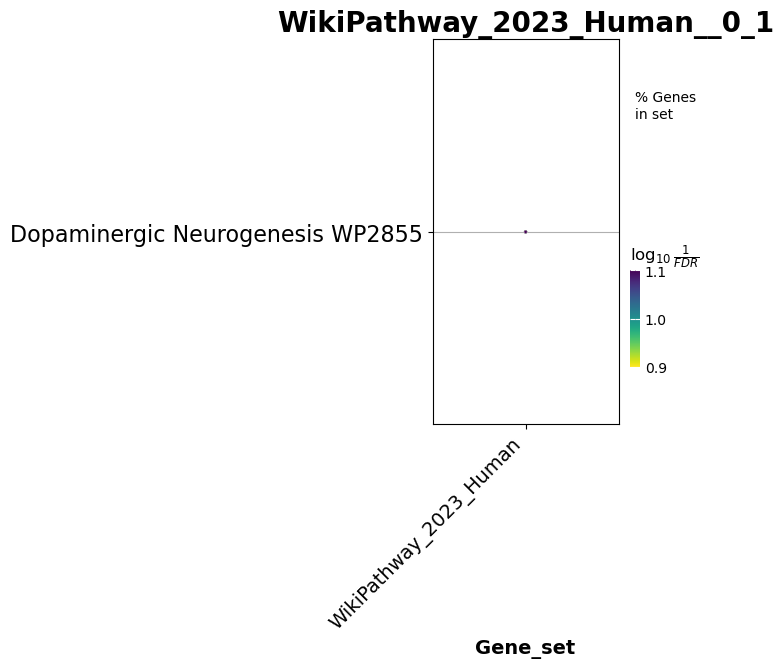

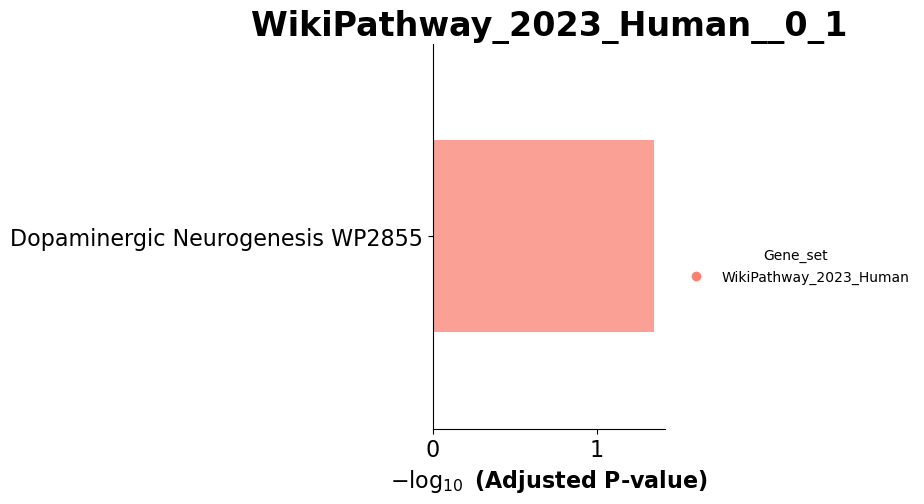

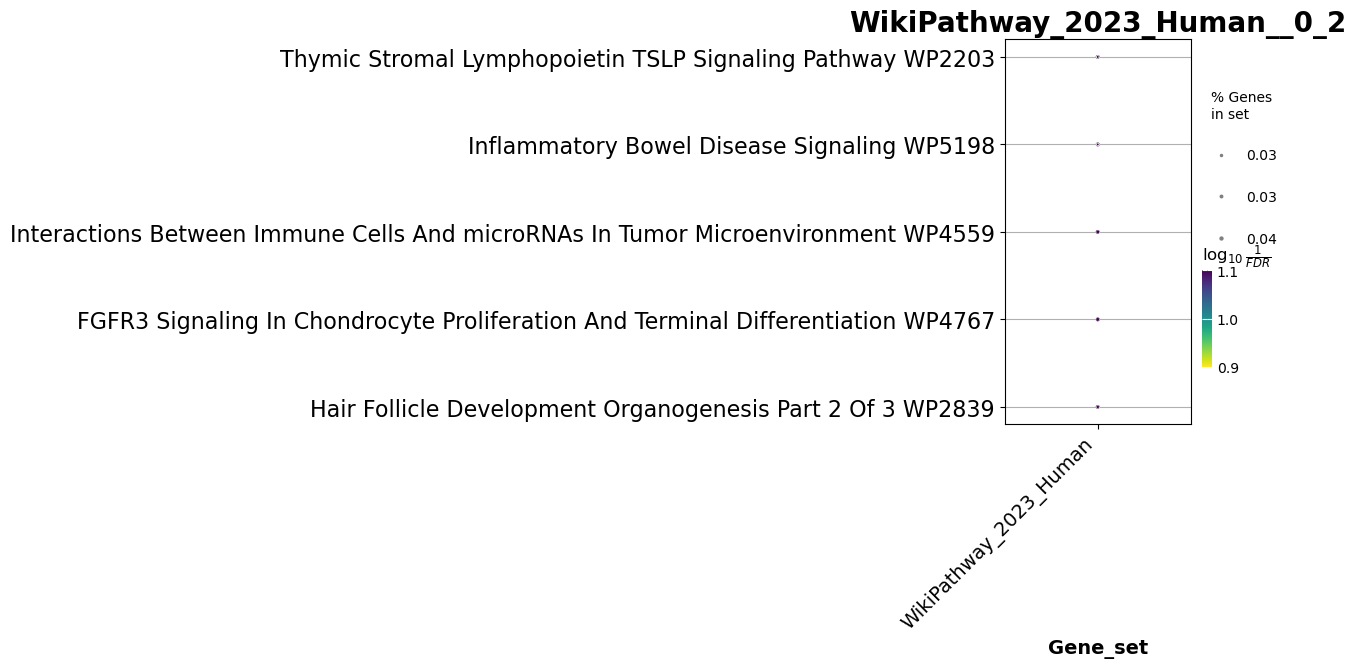

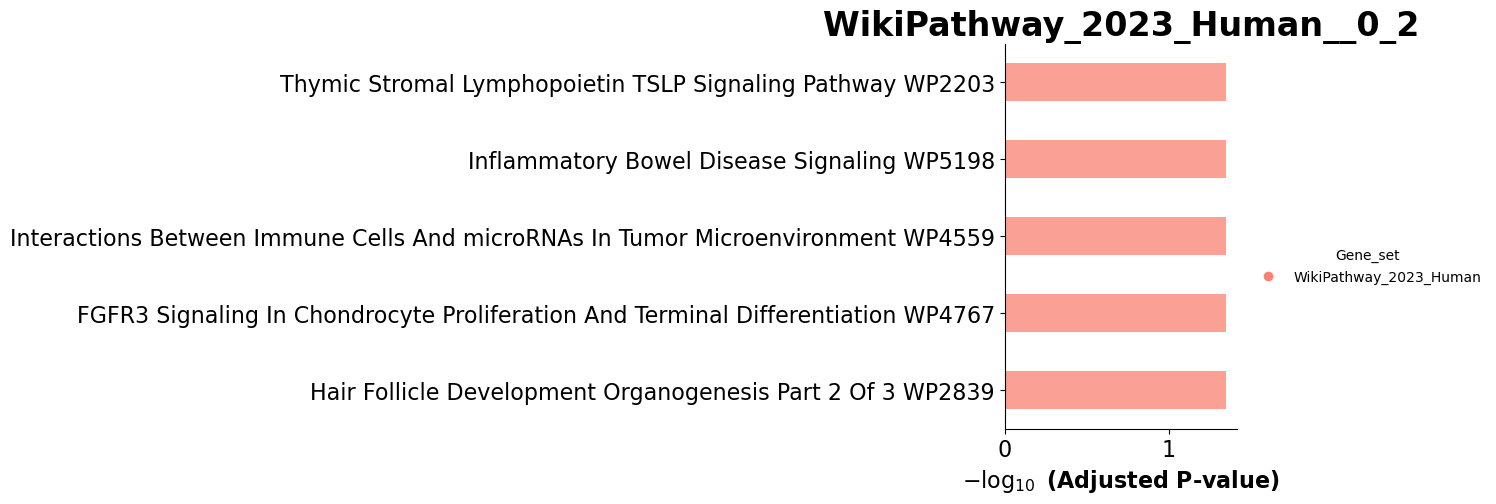

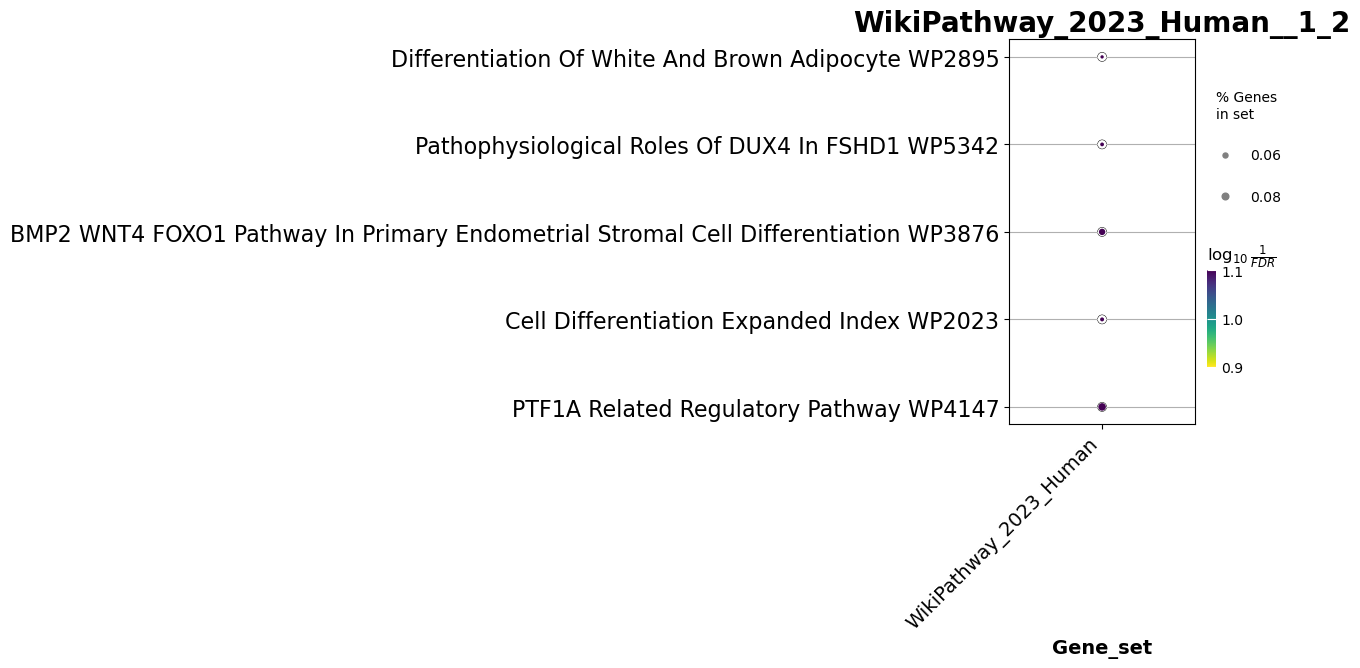

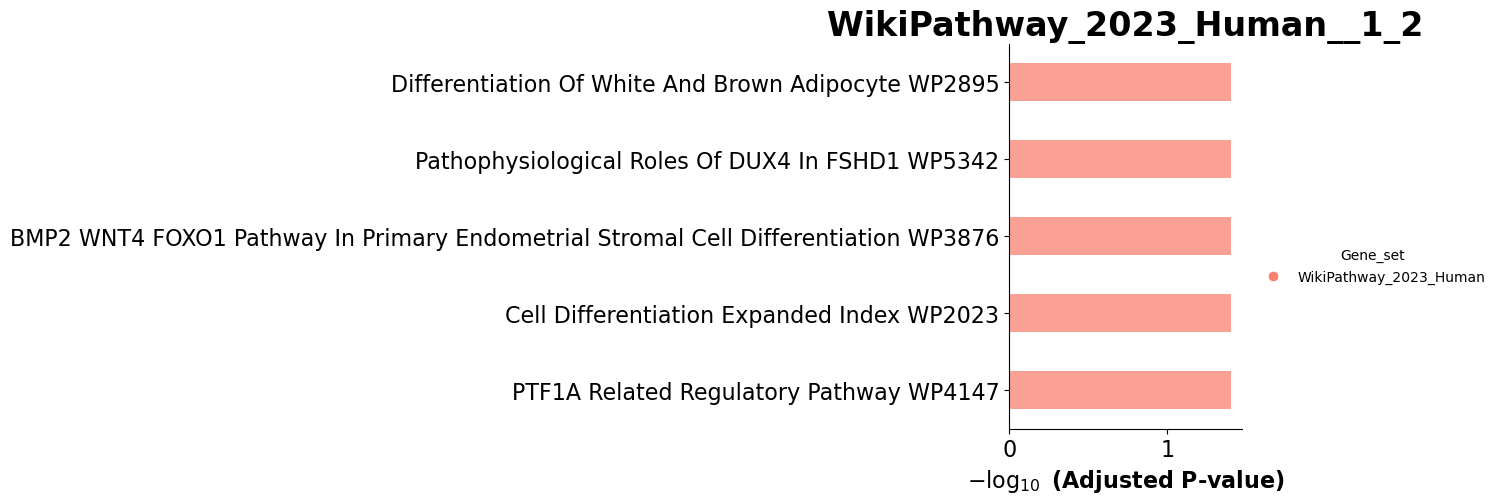

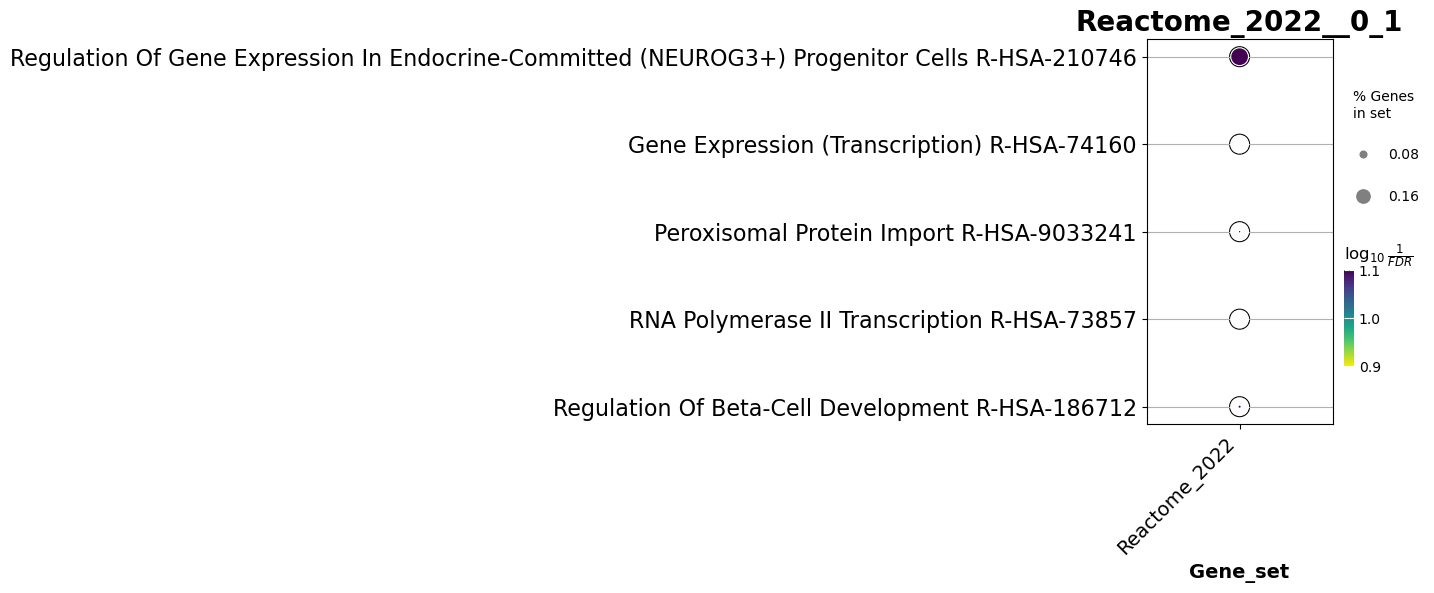

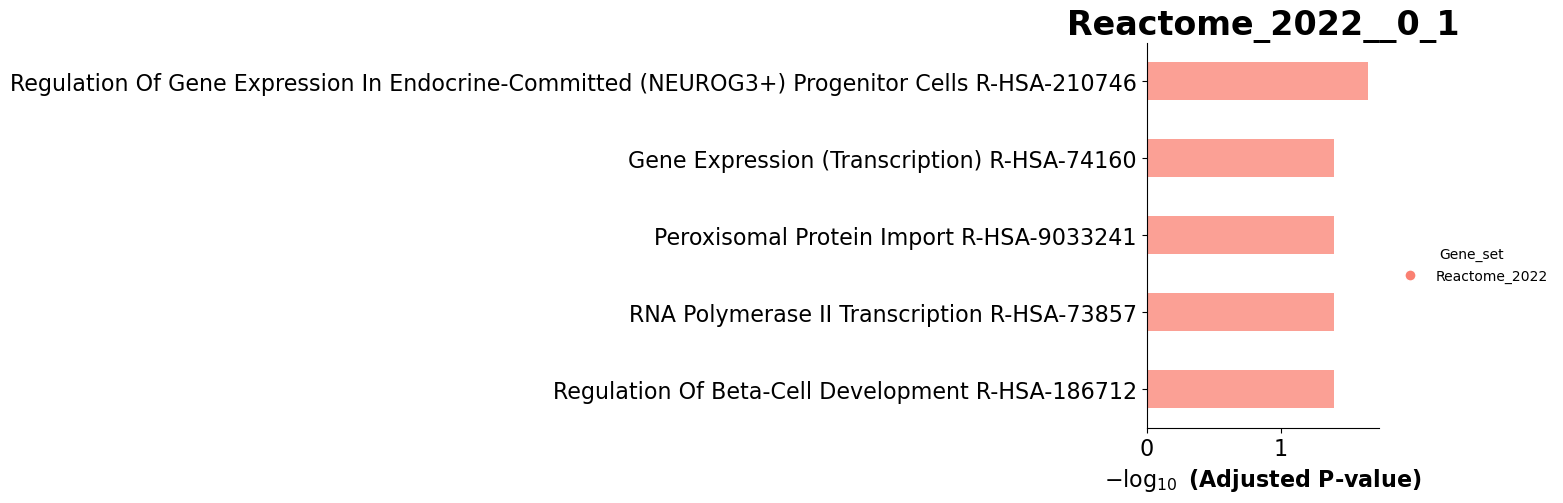

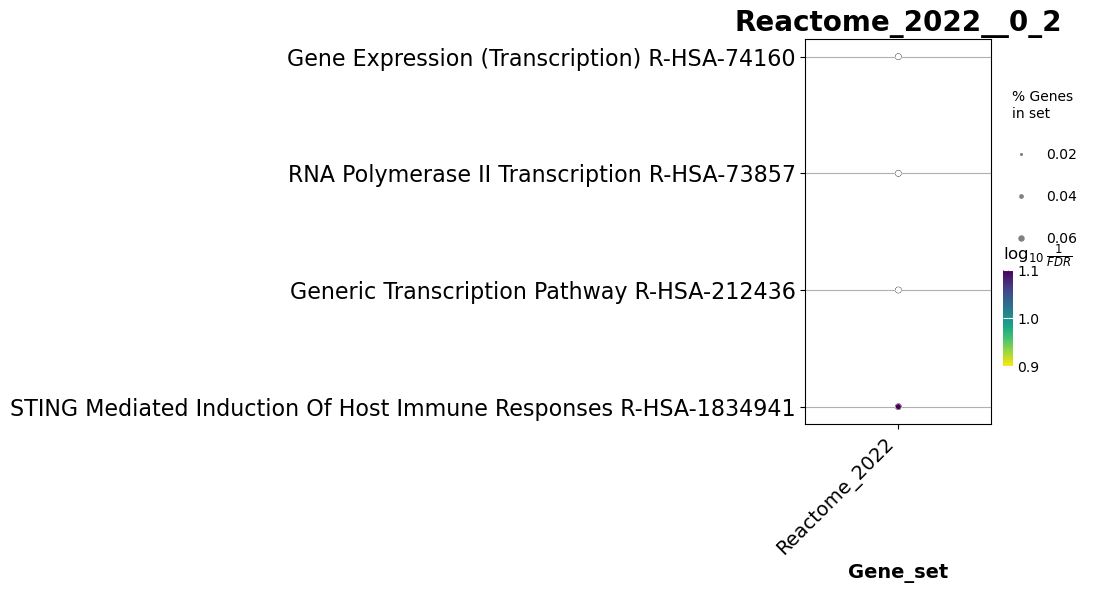

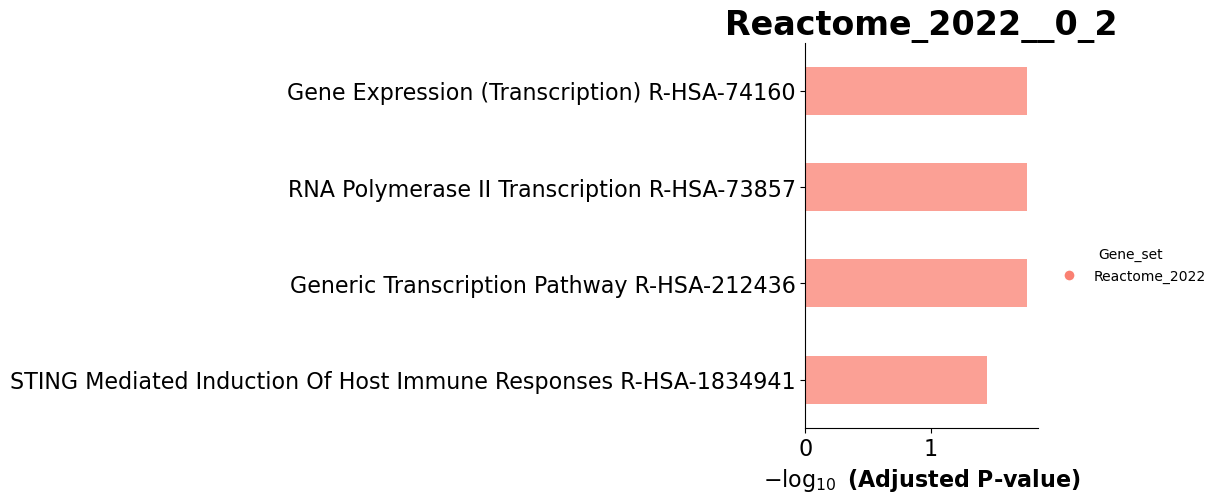

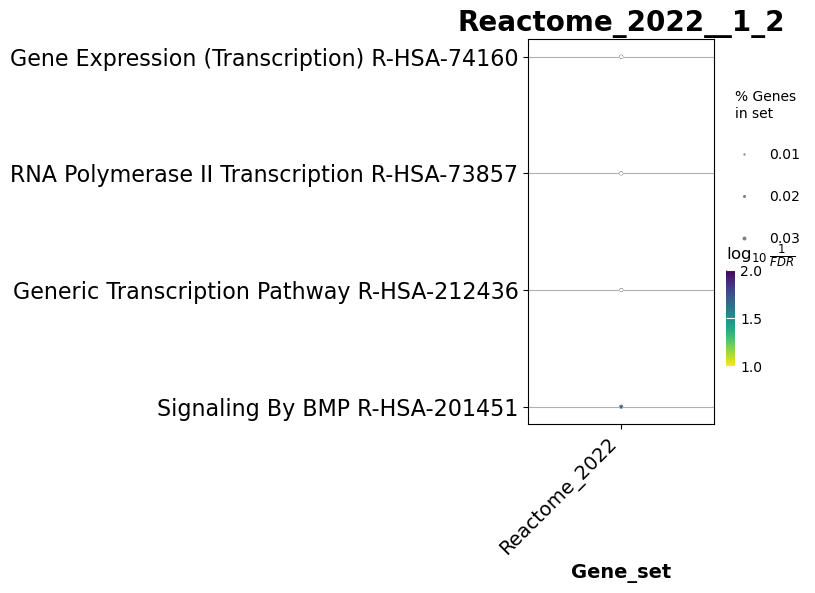

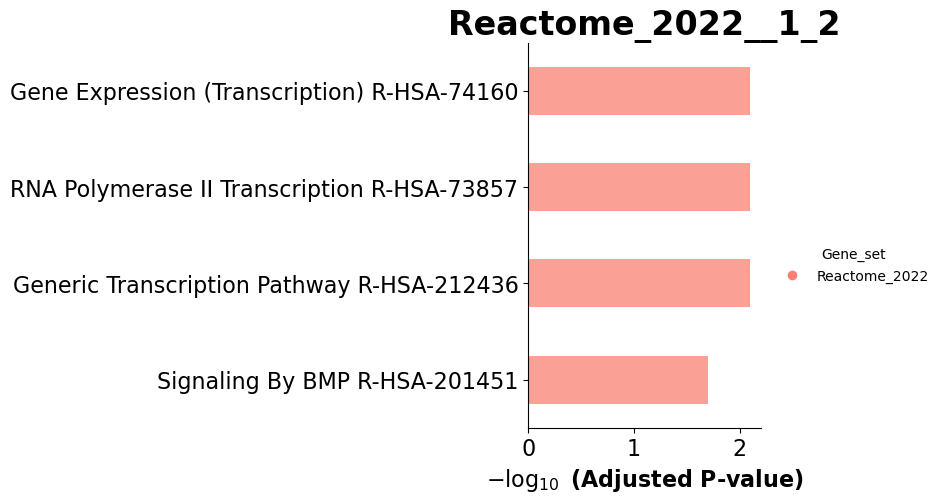

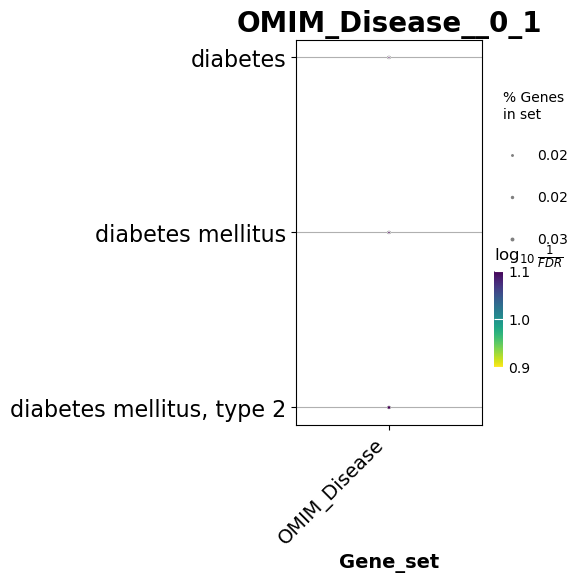

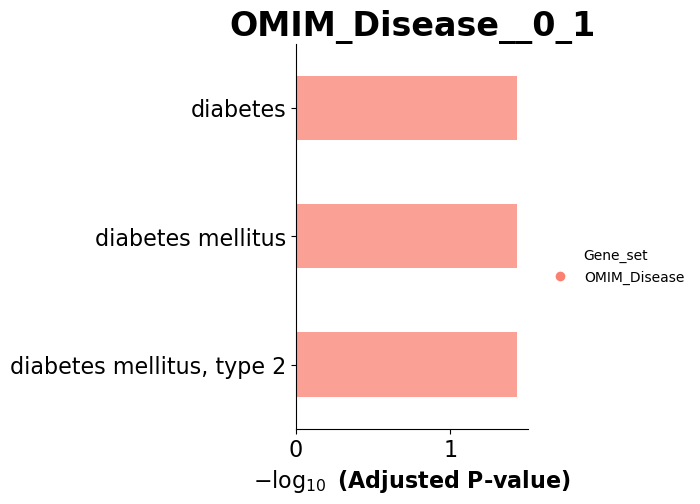

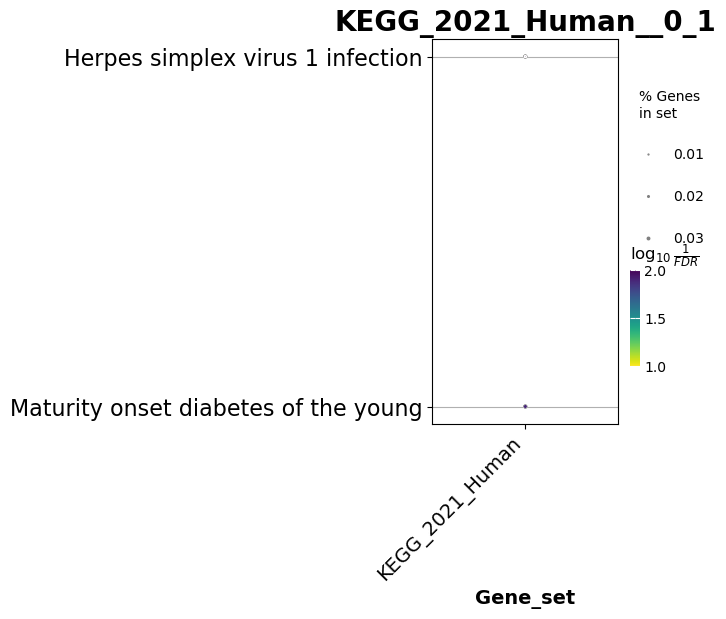

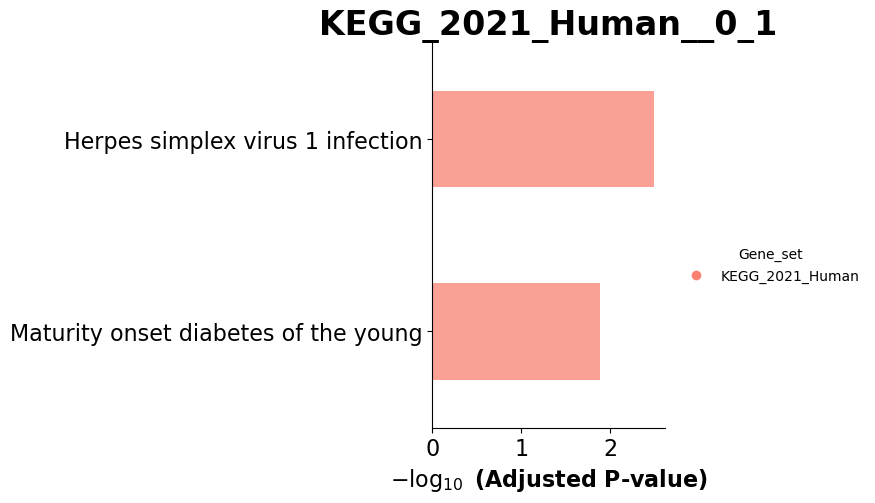

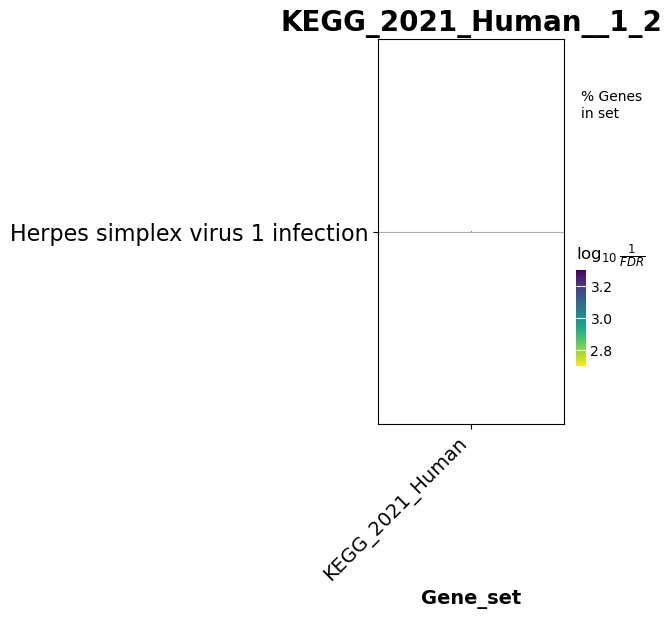

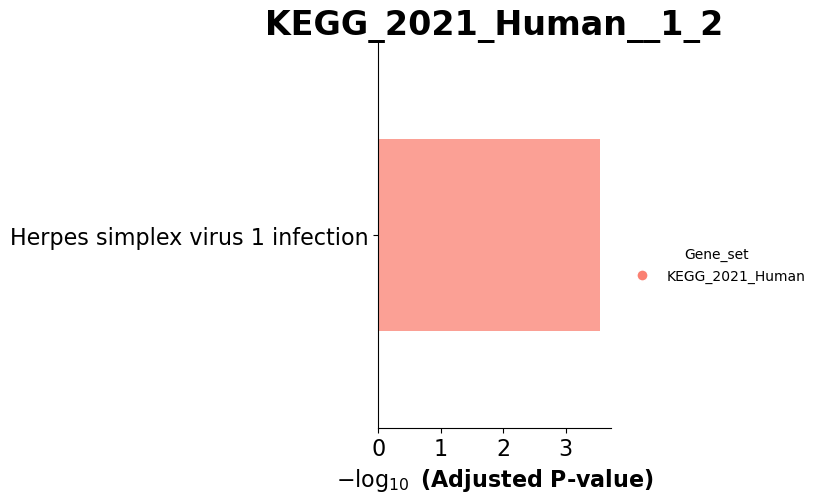

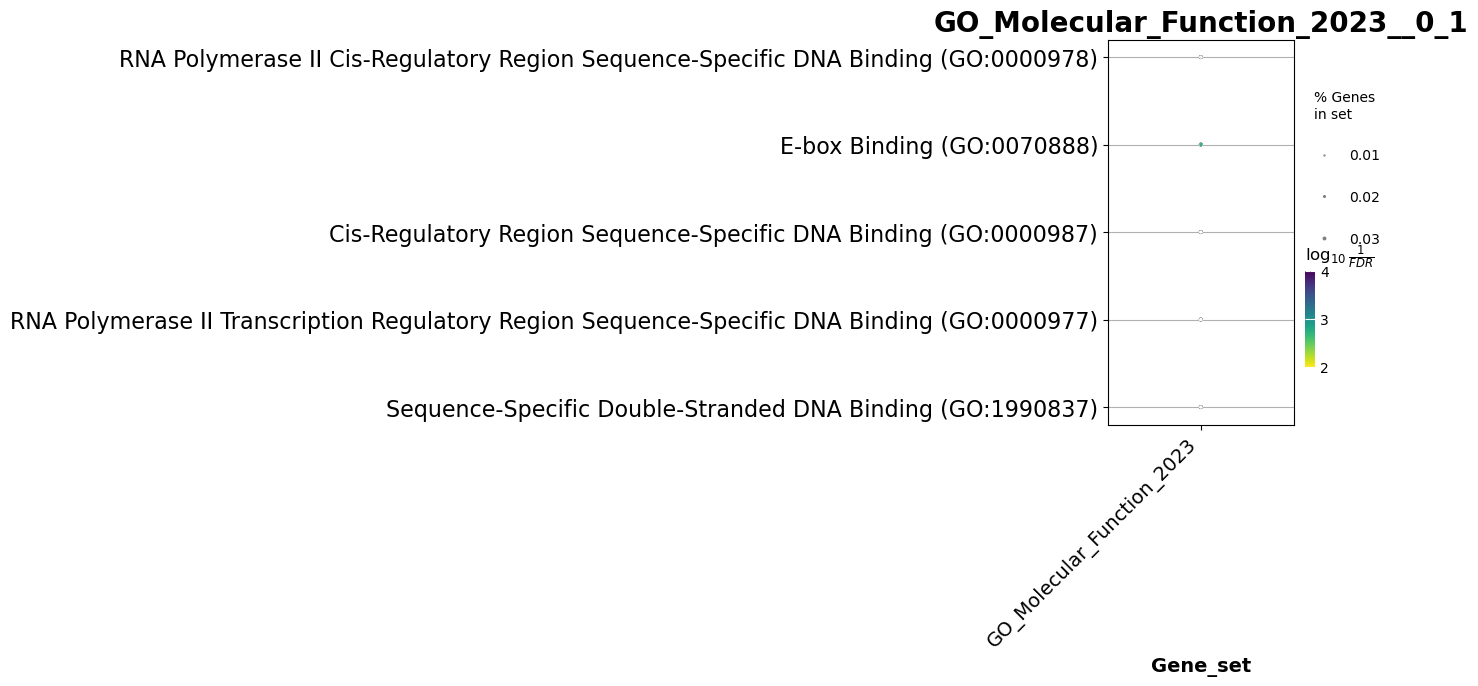

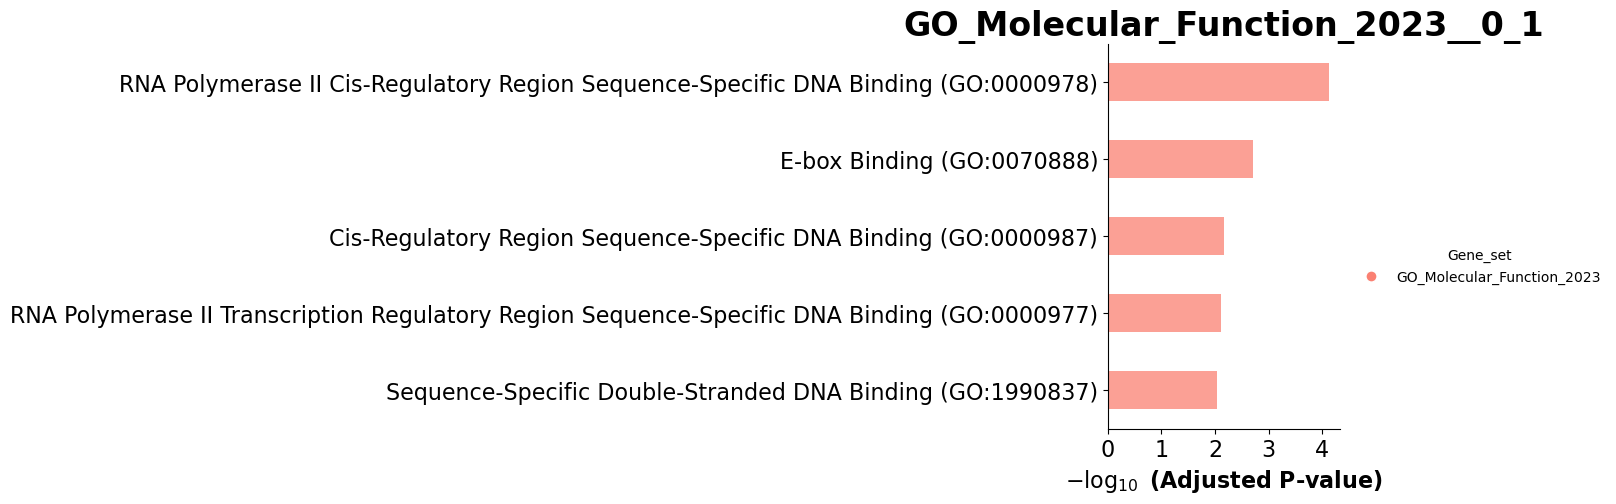

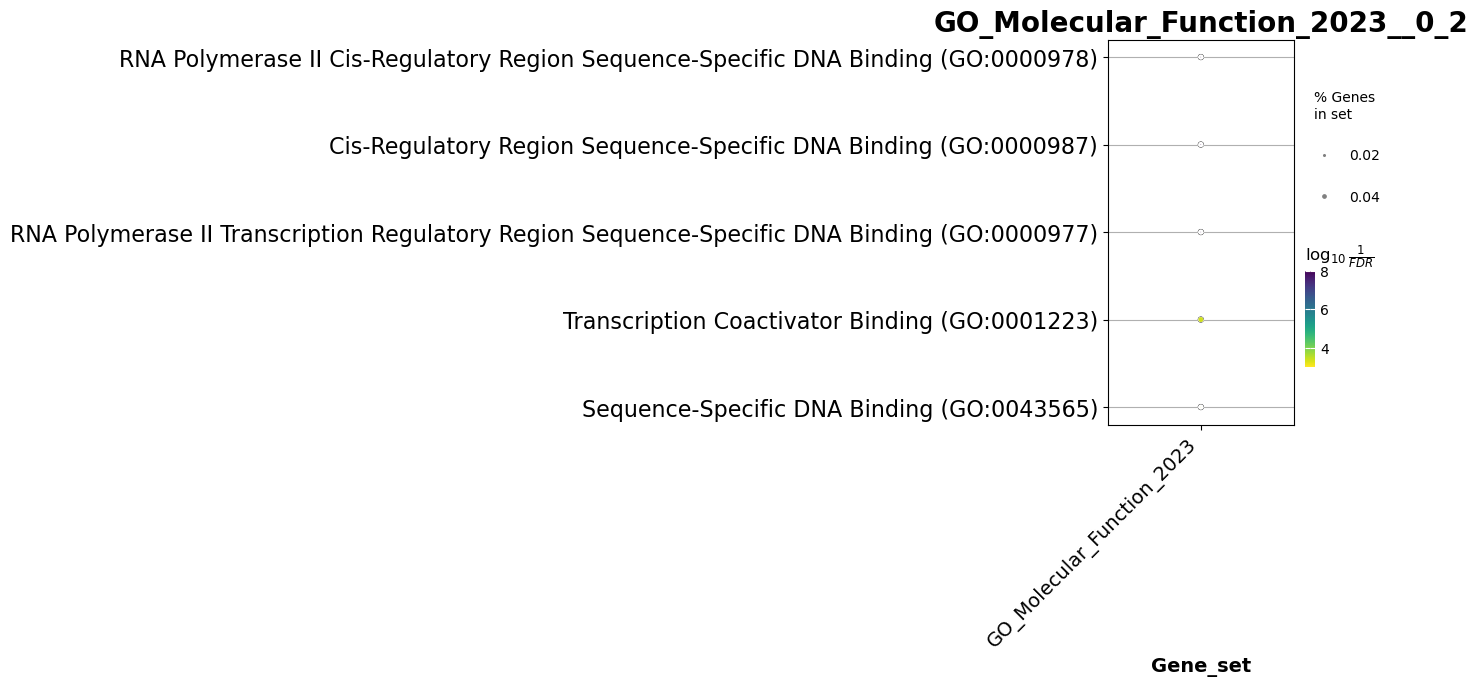

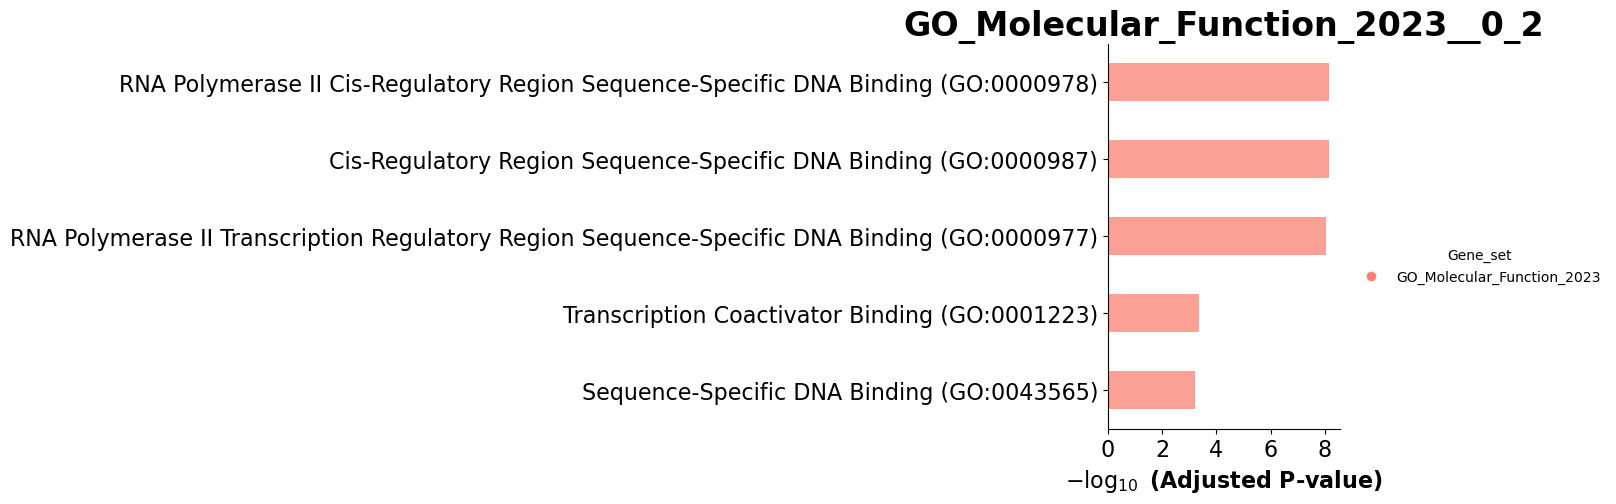

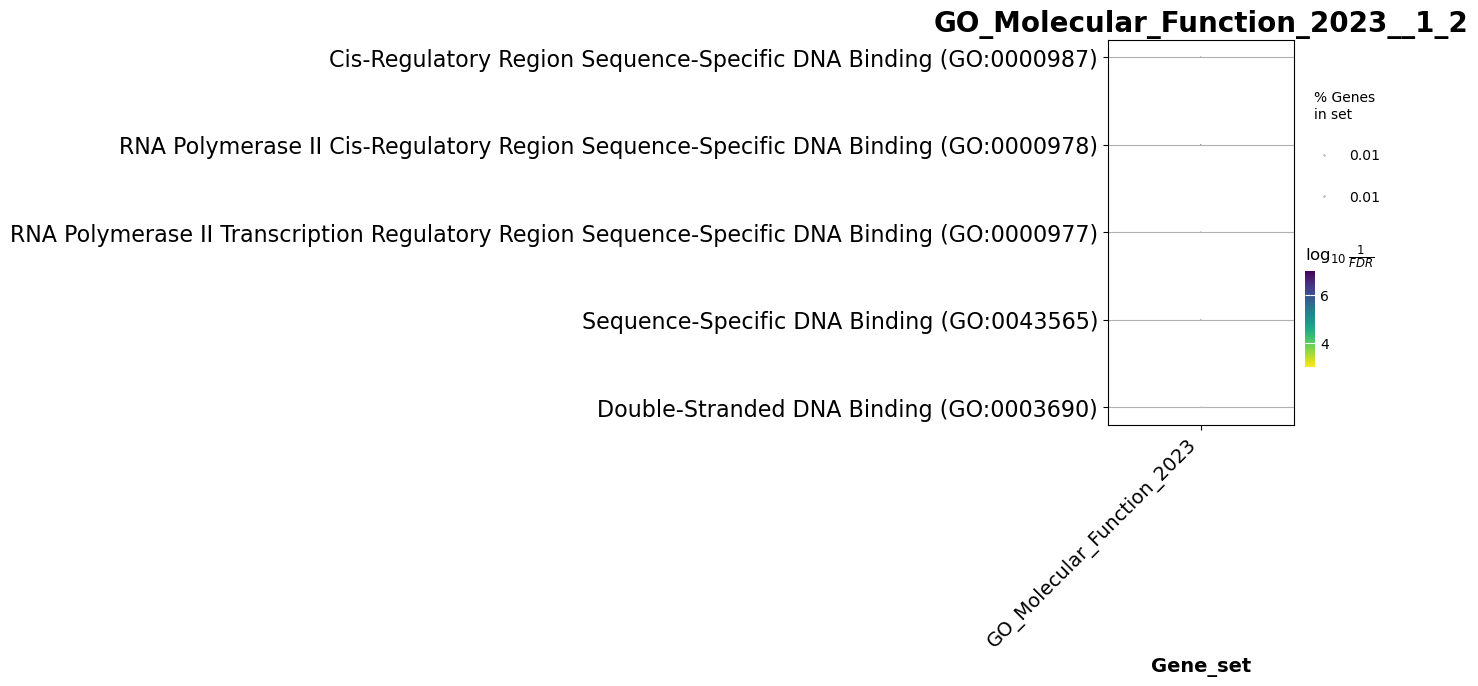

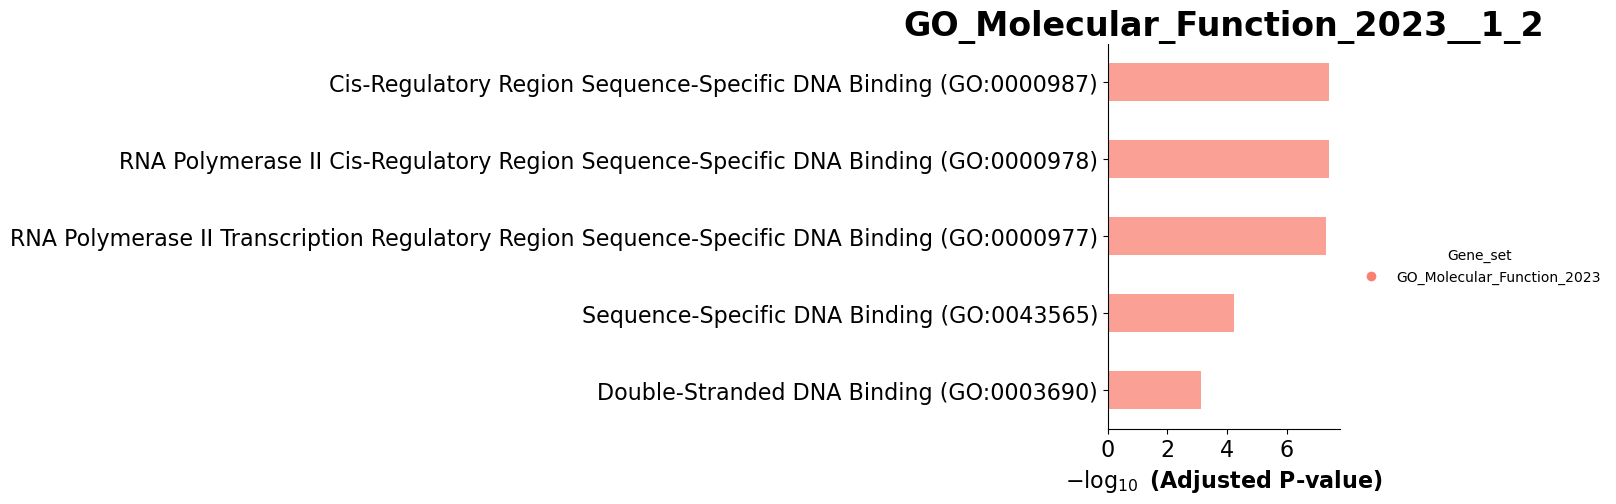

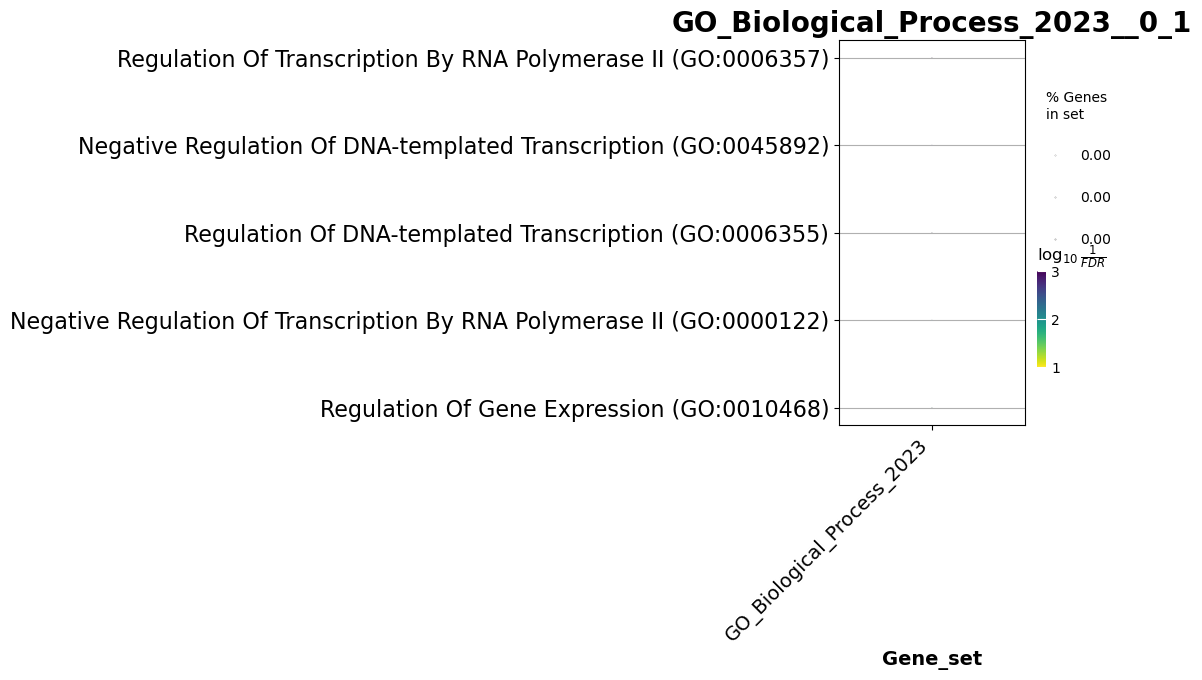

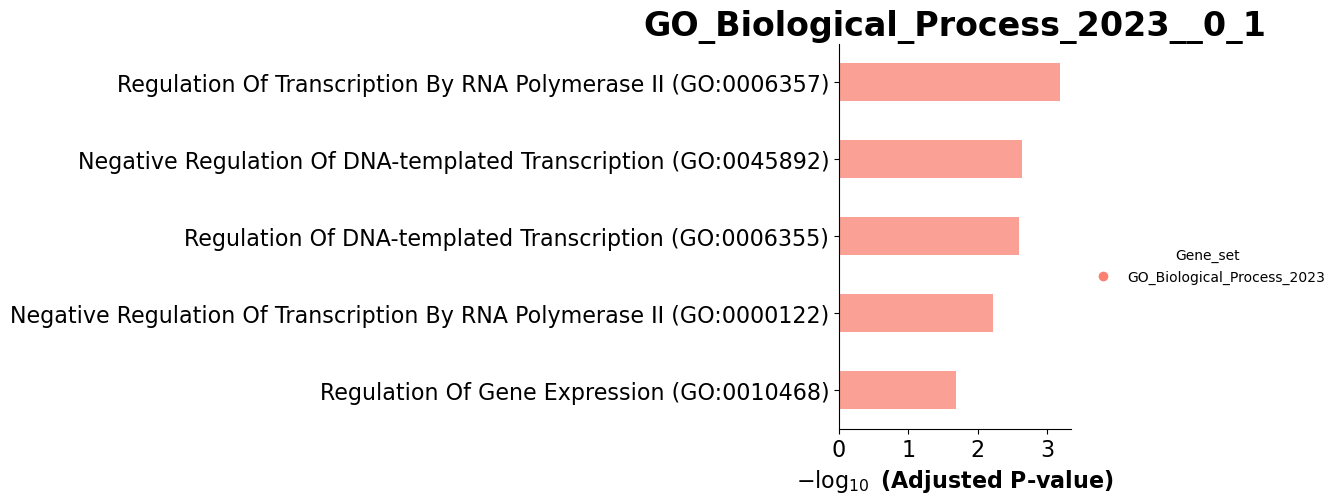

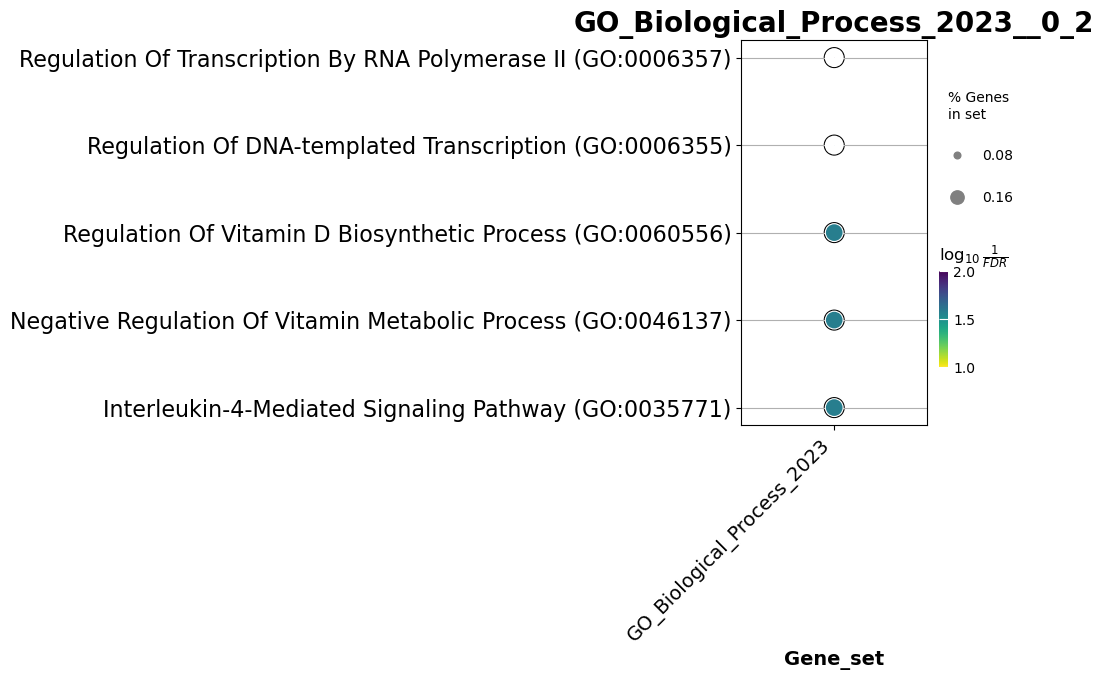

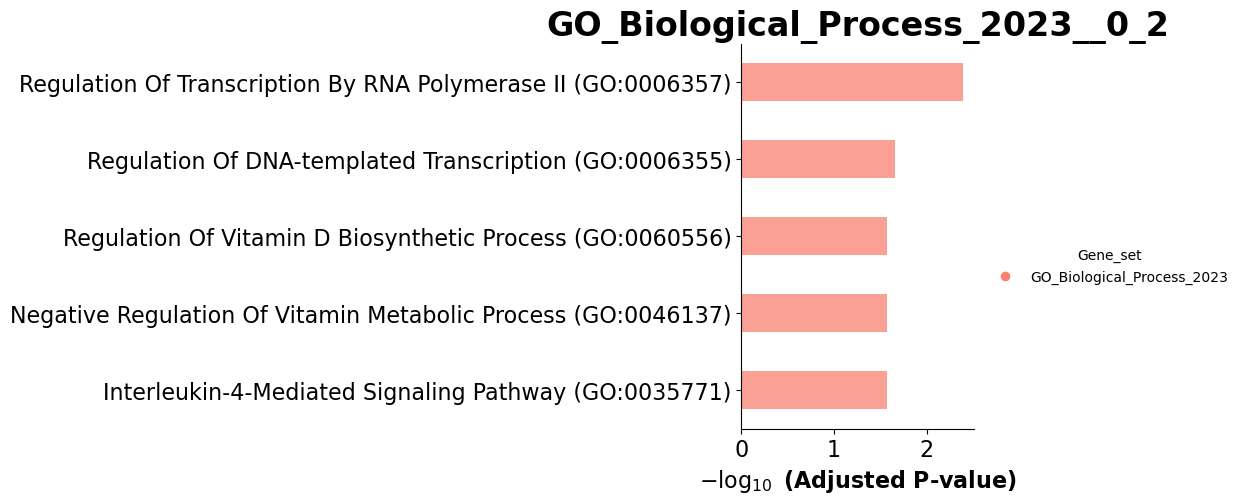

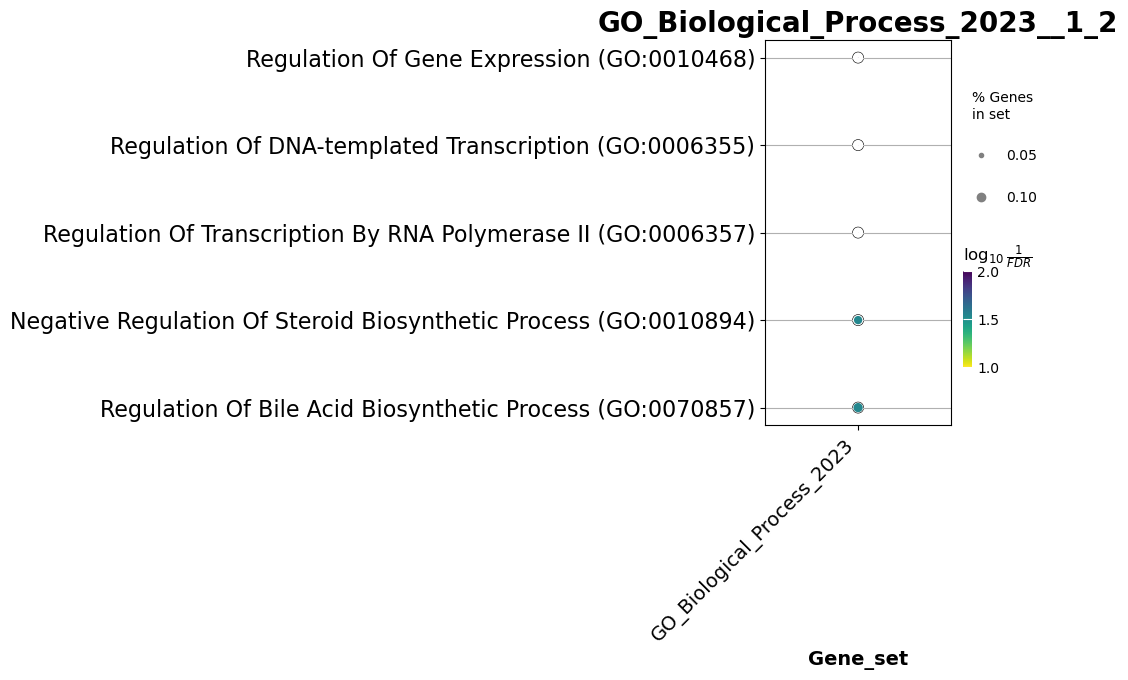

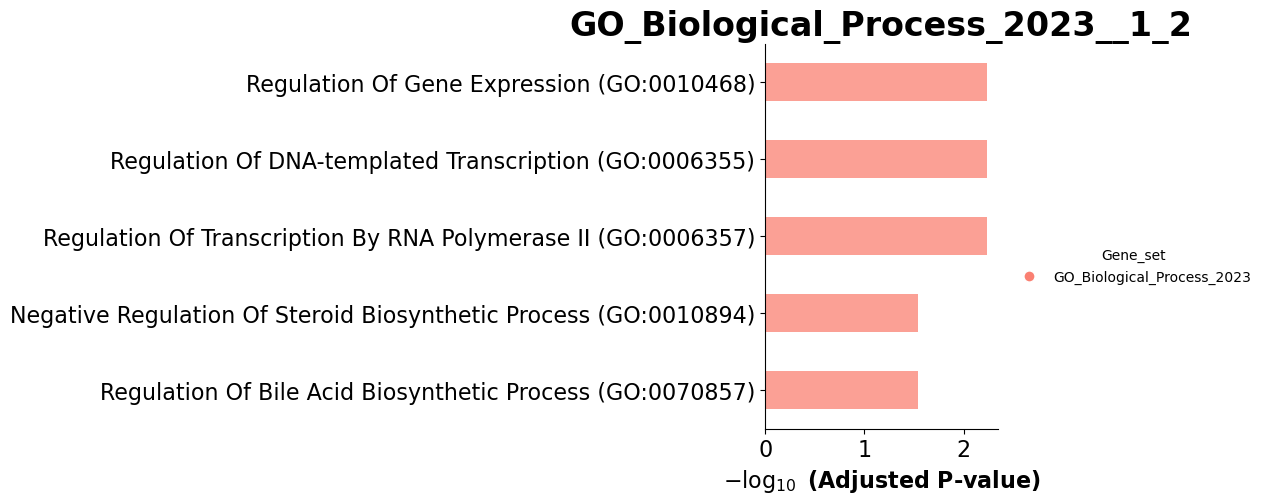

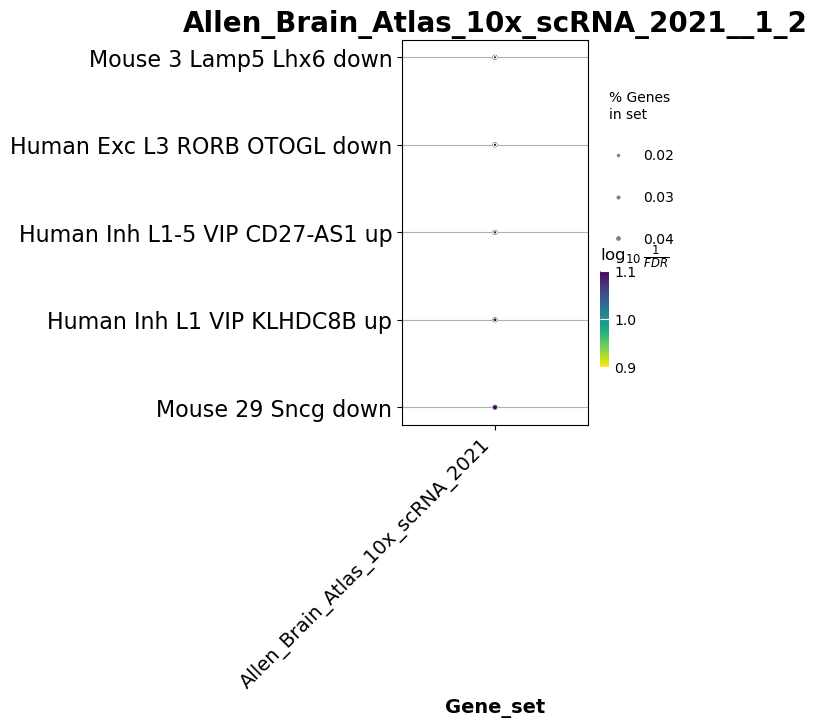

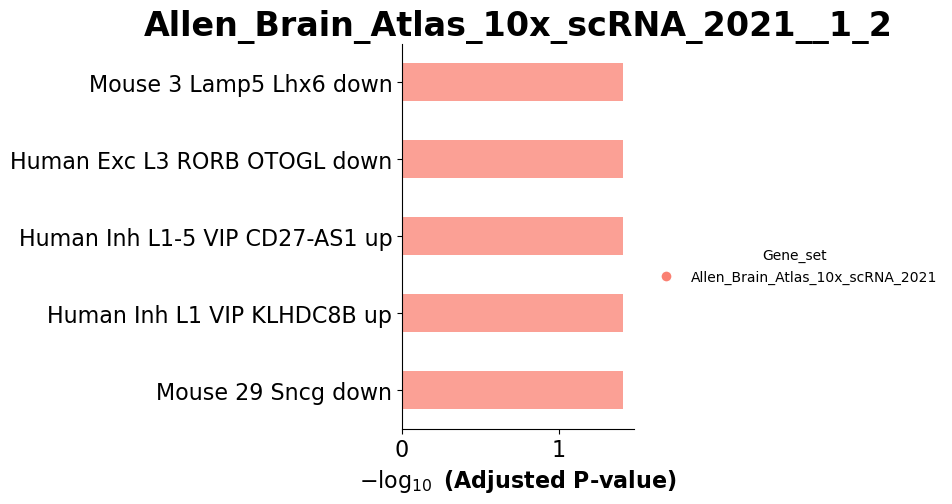

In [57]:
from gseapy import barplot, dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']


for i in databases:
    dataframe_tf_0_1= return_enriched_pathways(filtered_tf_set_0_1, adj_p_value = 0.05, gene_sets_databases =[i])
    dataframe_tf_0_2= return_enriched_pathways(filtered_tf_set_0_2, adj_p_value = 0.05, gene_sets_databases =[i])
    dataframe_tf_1_2= return_enriched_pathways(filtered_tf_set_1_2, adj_p_value = 0.05, gene_sets_databases =[i])

    # Plot the results for each gene set comparison
    try:
        plot_dotplot(dataframe_tf_0_1,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_1')
        plot_barplot(dataframe_tf_0_1,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_1')
    except:
        print('No significant results for', i, '_0_1')
    try:
        plot_dotplot(dataframe_tf_0_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_2')
        plot_barplot(dataframe_tf_0_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_2')
    except:
        print('No significant results for', i, '_0_2')
    
    try:
        plot_dotplot(dataframe_tf_1_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_1_2')
        plot_barplot(dataframe_tf_1_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_1_2')
    except:
        print('No significant results for', i, '_1_2')





Group: ENSG00000092607
111
['DBNDD1', 'PI4K2B', 'PMS1', 'PKM', 'TBC1D25', 'CPSF1', 'NDE1', 'APLP2', 'DDX18', 'LZTS3', 'PIGU', 'SUV39H1', 'BNIP3L', 'TFR2', 'SFXN3', 'RPL28', 'ELP4', 'TBC1D30', 'PHC1', 'GNLY', 'EPAS1', 'CACYBP', 'CRIPT', 'SLC17A5', 'CISD1', 'MT1G', 'CFP', 'FGFRL1', 'MINDY2', 'SHFL', 'ZNF341', 'ZSCAN5A', 'POLR3F', 'IER3IP1', 'COL4A2', 'PWP1', 'CKAP2', 'MMAB', 'KCNH5', 'SIRT3', 'PEX14', 'RPL11', 'ZC3HAV1L', 'ZNF182', 'NRGN', 'CD109', 'TBC1D31', 'SLC38A10', 'ZC3H18', 'FGF17', 'DFFA', 'COX7A1', 'ACOX1', 'TPCN2', 'KCNF1', 'ERCC3', 'HDAC11', 'AIMP1', 'INTS1', 'FREM1', 'NUDT5', 'PLIN1', 'STXBP6', 'MAP3K2', 'EXOSC10', 'RCAN2', 'ABCG4', 'PLAC8L1', 'ANAPC2', 'ZDHHC13', 'LINC00304', 'TMEM259', 'KIAA2012', 'CLEC4G', 'GPR19', 'CMTM4', 'PSMD13', 'CYP2R1', 'PCDHB13', 'SLC38A3', 'ZNF600', 'TOGARAM2', 'MYO6', 'ZNF239', 'ZNF429', 'PELI1', 'ZNF808', 'NAGA', 'ZNF525', 'RNF39', 'TMEM170B', 'ZNF845', 'FAM240C', 'LINC01422', '', 'CDPF1P1', '', 'KRTAP5-AS1', '', 'PPP1R3E', 'TPM3P9', '', 'GAPDH

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v


Group: ENSG00000177485
146
['SEC62', 'CSDE1', 'AGA', 'OFD1', 'PHF21B', 'SLC12A2', 'NFYC', 'IDH3G', 'VDAC3', 'CARMIL1', 'ERGIC2', 'PTPN4', 'COQ9', 'MTAP', 'POLR2E', 'DDX17', 'HDAC10', 'VSX1', 'ABCD1', 'DNAJA3', 'TUSC3', 'LYL1', 'RNF167', 'TBC1D9', 'RSRC2', 'CAND1', 'CCNC', 'CCNG1', 'RPS15', 'ATF2', 'CAMSAP2', 'ANKRD13C', 'AKAP1', 'SEPTIN7', 'HERPUD2', 'RECK', 'MED1', 'CENPB', 'CCNT1', 'ASH2L', 'ZNF317', 'SLC7A10', 'RBM39', 'COX7B', 'ZNF414', 'KATNBL1', 'ARF3', 'RPS15A', 'RELCH', 'CEP350', 'RPS6', 'ANXA7', 'SENP7', 'LARP1B', 'PDPK1', 'BCAS3', 'ASXL3', 'RPS11', 'TMCO1', 'SPAG16', 'USP53', 'FAM50B', 'MDH2', 'AGBL3', 'NCAPG2', 'STAR', 'CNNM2', 'BTBD10', 'ESAM', 'SAP18', 'SLC25A4', 'SRP19', 'NMRAL1', 'XPC', 'RAB6B', 'SLC25A28', 'RHOC', 'NPTN', 'PAXBP1', 'ATP5MC1', 'TAOK1', 'RPL26', 'MYSM1', 'USP1', 'AGL', 'NEUROD1', 'MFSD8', 'SMIM43', 'COX11', 'STXBP4', 'PRTG', 'ZNF606', 'GOLM2', 'PCMTD1', 'ATF7', 'ZBTB26', 'EXOSC10', 'FUT9', 'MRPL57', 'RBM4B', 'NDUFA11', 'DCTN2', 'KDF1', 'NSUN3', 'DHFR2', 

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v


Group: ENSG00000177873
4
['PGM1', 'MPRIP', 'AQP4', 'KRT8P26']


/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v


Group: ENSG00000196705
385
['MAD1L1', 'CFLAR', 'AP2B1', 'IFFO1', 'IL20RA', 'PRDM11', 'LRRC7', 'CLXN', 'DGKG', 'PRKCQ', 'ATP11A', 'CLEC2D', 'EVC', 'FERMT2', 'ADD2', 'MLH1', 'TPD52', 'TULP3', 'FDFT1', 'KCNN2', 'OXCT1', 'ACOX3', 'PIGS', 'LPCAT2', 'FER1L4', 'SNX5', 'GCN1', 'PITPNM2', 'SNAP23', 'COMT', 'SF3A1', 'SRRD', 'CYP2D6', 'SBF1', 'RHBDD3', 'CBX7', 'SUSD6', 'PCNX1', 'BRMS1L', 'CD40', 'CDS2', 'TLDC2', 'CHMP4B', 'CST3', 'GPR143', 'SUV39H1', 'SRPX', 'KLHL4', 'DHRS12', 'LONP2', 'PSMD7', 'ZC2HC1A', 'ECH1', 'DMPK', 'TIMM44', 'RASAL3', 'GPI', 'KDELR1', 'PLPPR2', 'LENG1', 'PRPF31', 'RAB3A', 'SUGP1', 'CAV2', 'STX1A', 'PLOD3', 'PRKAG2', 'PALD1', 'FBXL15', 'LARP4B', 'PRPF19', 'RNF141', 'PTPN5', 'WNT5B', 'ACAD10', 'CMAS', 'MDFI', 'GABRG2', 'SLC41A3', 'PODXL2', 'ARHGEF26', 'STEAP3', 'POLE4', 'TACR1', 'GNLY', 'ST3GAL5', 'STK25', 'PRRX1', 'DHCR24', 'AMPD2', 'CD58', 'KIF21B', 'MAP7D1', 'AIRIM', 'GBP1', 'STMN1', 'PPP6C', 'GOT1', 'UBIAD1', 'KIAA1191', 'WWP1', 'SLC12A4', 'ENKD1', 'KCNS1', 'SLC2A4RG', '

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



Group: ENSG00000198429
360
['ARF5', 'RBM6', 'NDUFAB1', 'GAS7', 'FAM76A', 'BTK', 'RNF216', 'QPCTL', 'GLRX2', 'KCNG1', 'CAPG', 'CELF2', 'HHAT', 'TAF2', 'PACC1', 'MPPED2', 'PYGM', 'AFF4', 'PLD1', 'BAZ2A', 'ACTN2', 'MOK', 'ZNF264', 'SCAMP1', 'PREP', 'POMGNT1', 'PHACTR3', 'MLF2', 'TMEM38B', 'SLC16A8', 'TTLL1', 'PNPLA5', 'SAMM50', 'L3MBTL2', 'CHGA', 'PRELID3B', 'ARFGAP1', 'ADISSP', 'SLC32A1', 'ZDHHC15', 'CMC2', 'HCFC1R1', 'CRISPLD2', 'CLUAP1', 'EMC2', 'GFUS', 'SNRNP70', 'SF3A2', 'CLEC11A', 'BAG1', 'HPS1', 'CXCL12', 'ATE1', 'SLC25A11', 'FTSJ3', 'FOXRED1', 'GPN3', 'FGFR1OP2', 'CILK1', 'PRPH2', 'PCDHB2', 'TXNDC15', 'SLC25A36', 'RPL24', 'NKTR', 'DOK1', 'GGCX', 'PLCD4', 'IL1RL2', 'STK16', 'SRSF11', 'HPCAL4', 'MTARC2', 'KLF7', 'VAMP8', 'RBM25', 'YIPF4', 'ADRA1A', 'MRPS2', 'ZNF205', 'ADGRE5', 'RAB9B', 'ACVR1C', 'ENKD1', 'SLC12A5', 'SDC4', 'AARS2', 'CNOT1', 'MT2A', 'SOX21', 'SLC25A19', 'NT5C', 'MSTO1', 'SNRPD2', 'ZNF133', 'BPIFB9P', 'SGPP1', 'ARMCX1', 'CHTF18', 'GNG13', 'PRKRIP1', 'TTBK2', 'ALDH1A2

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v

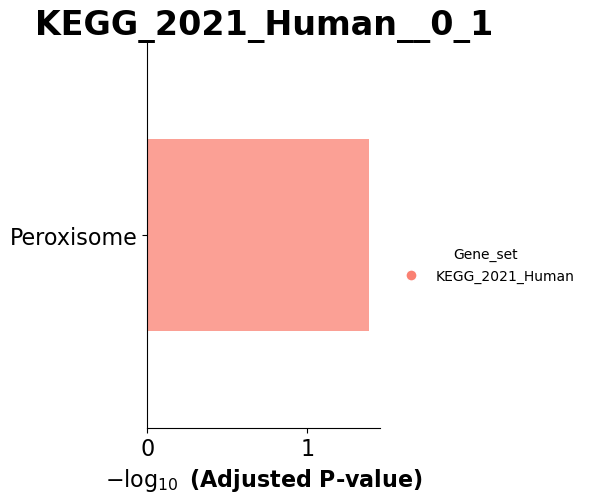

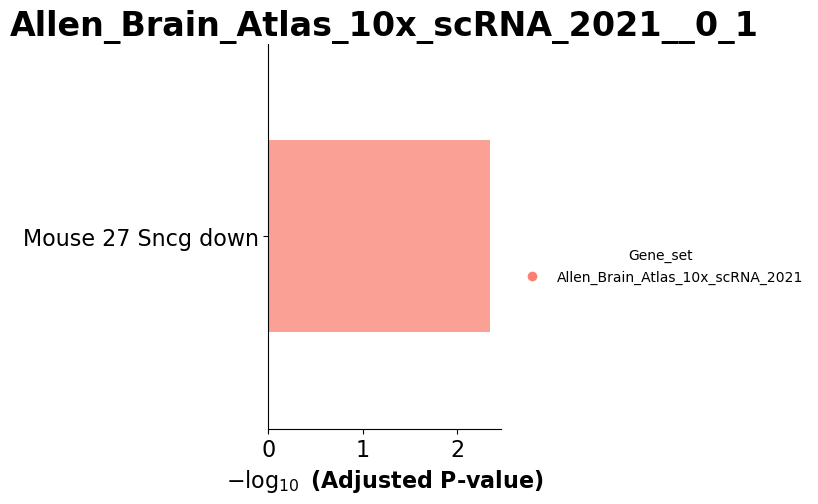

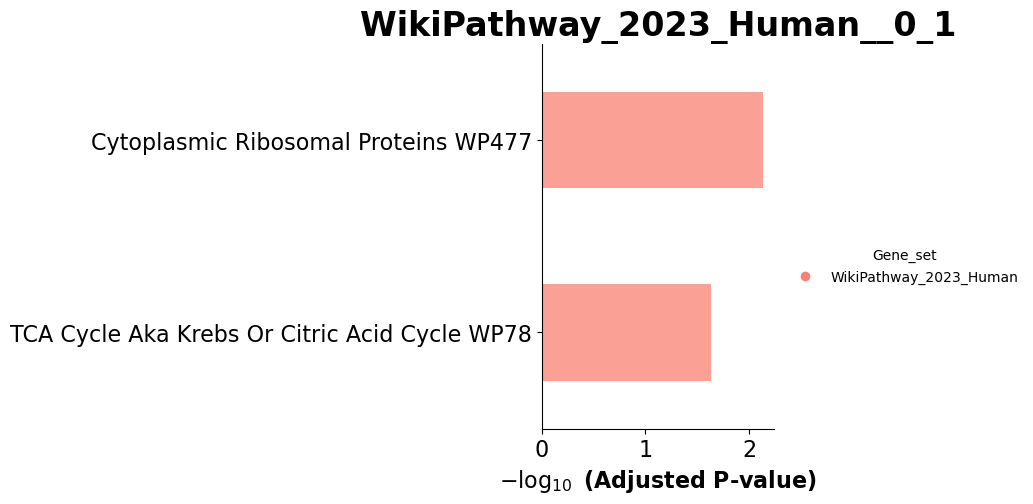

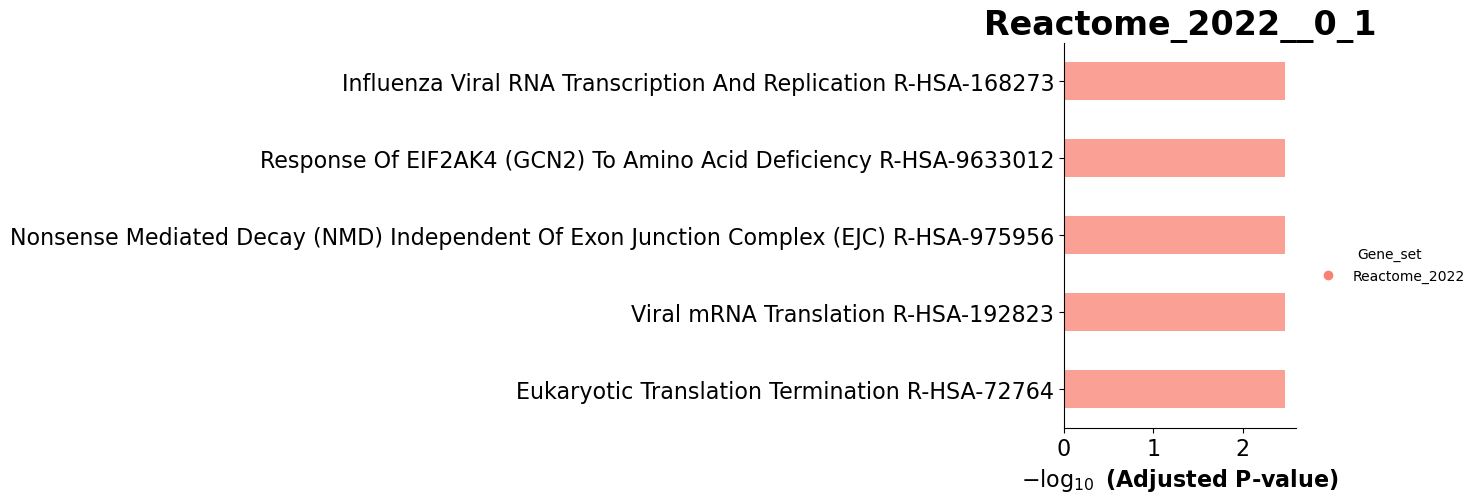

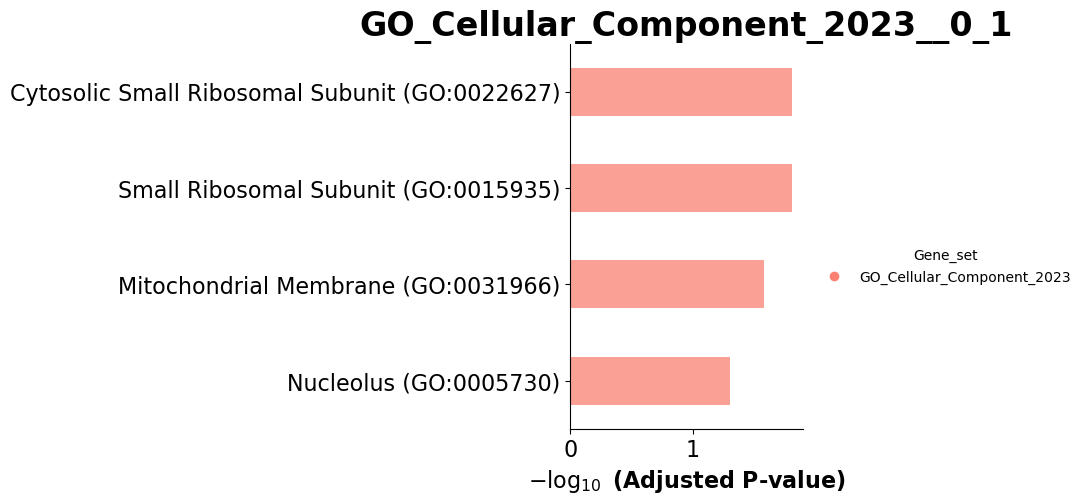

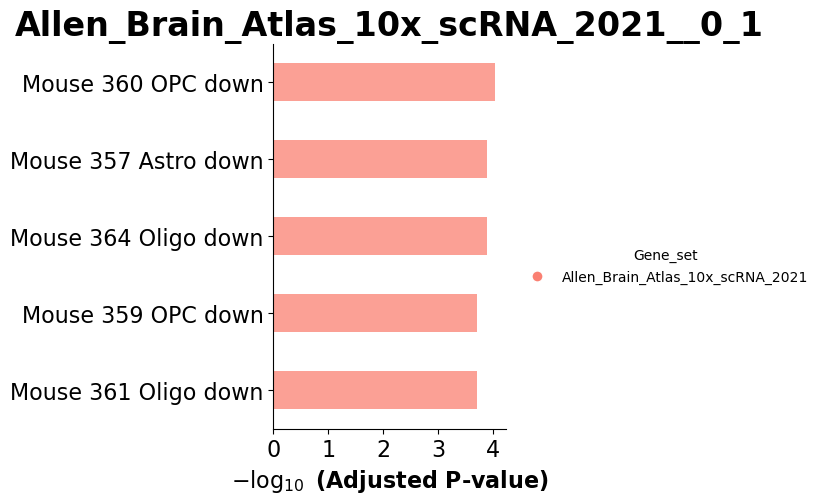

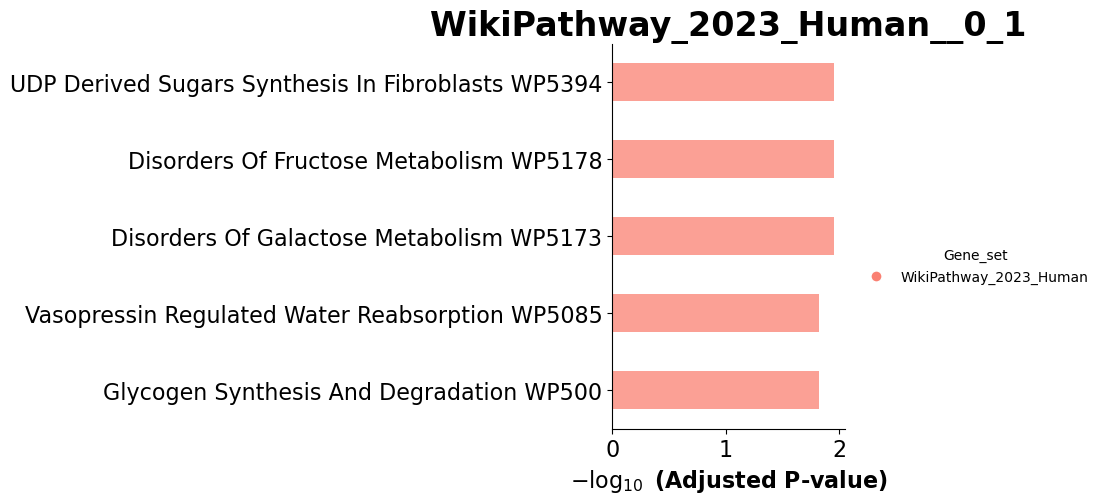

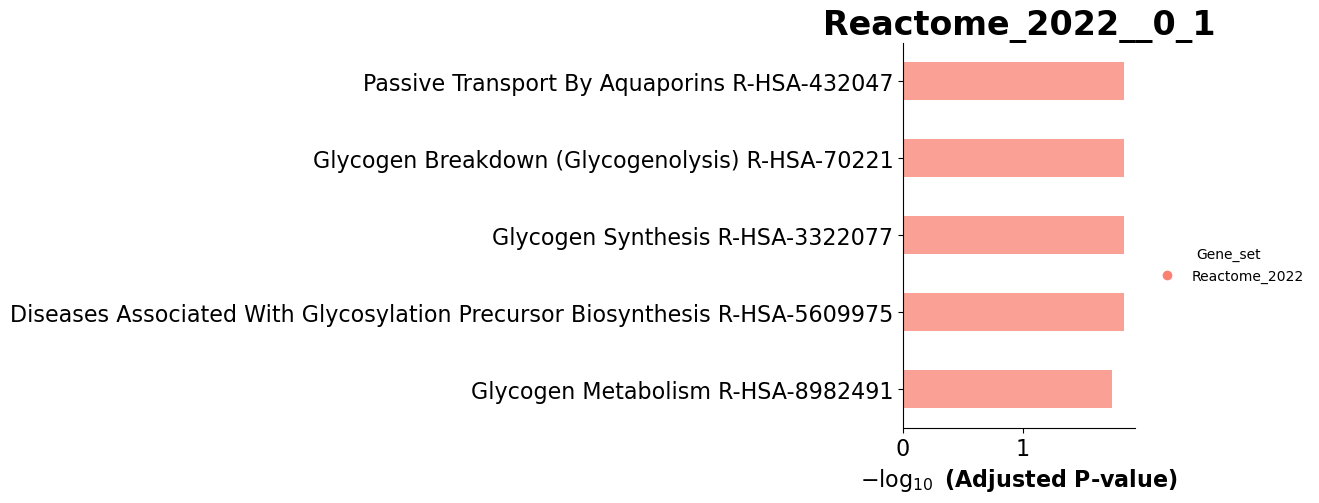

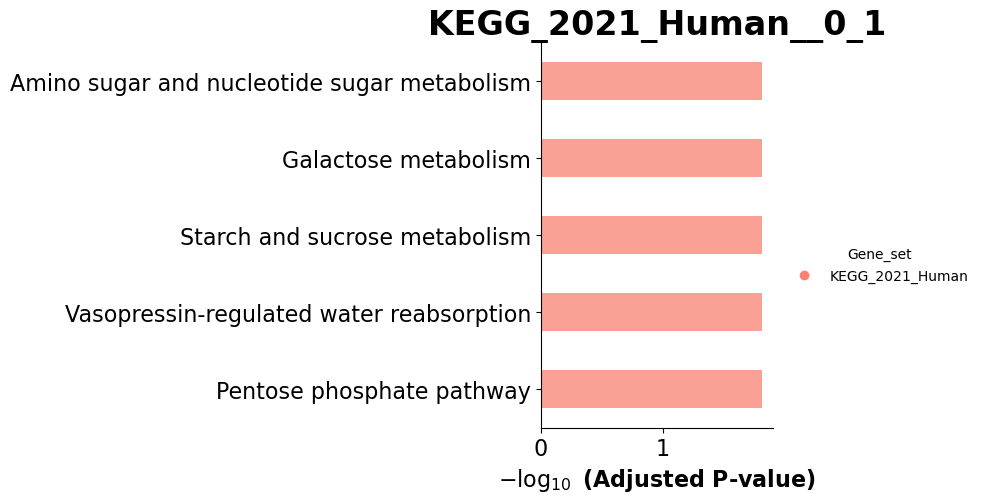

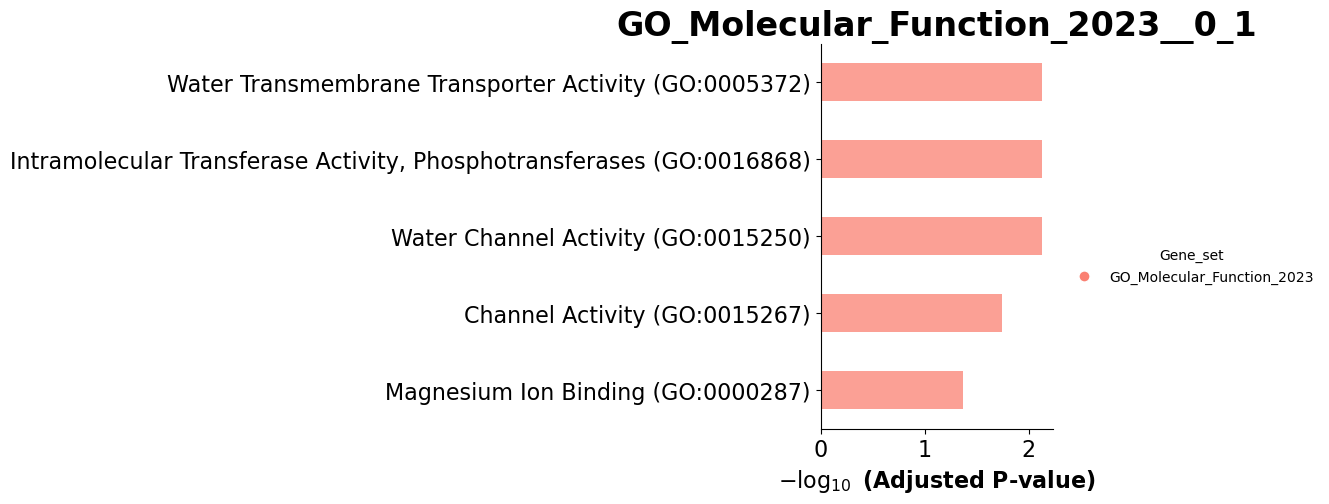

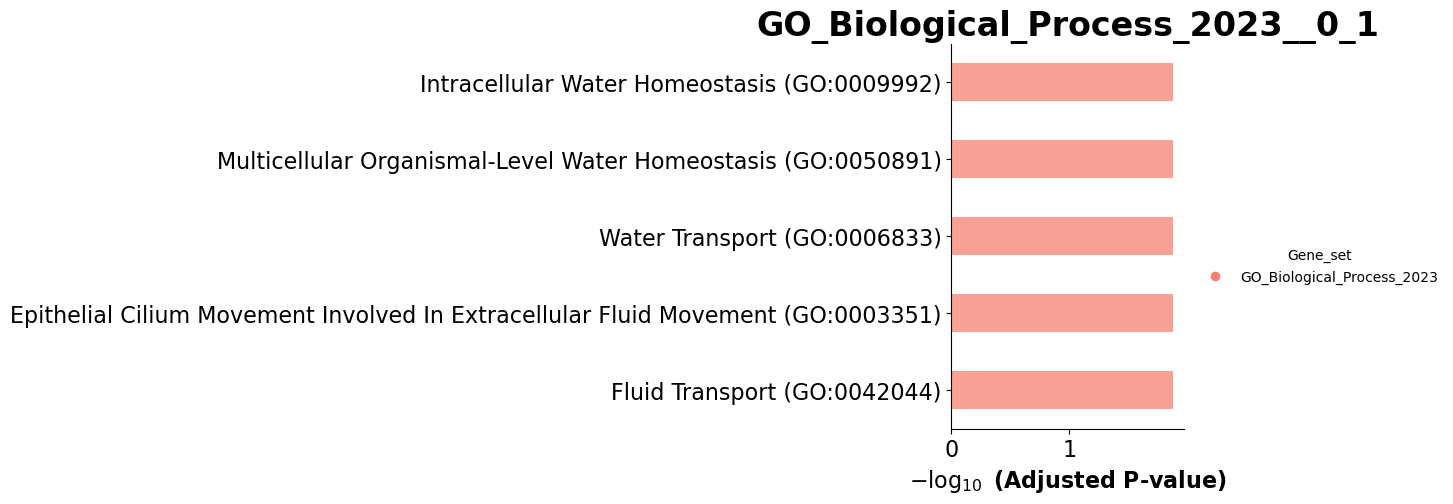

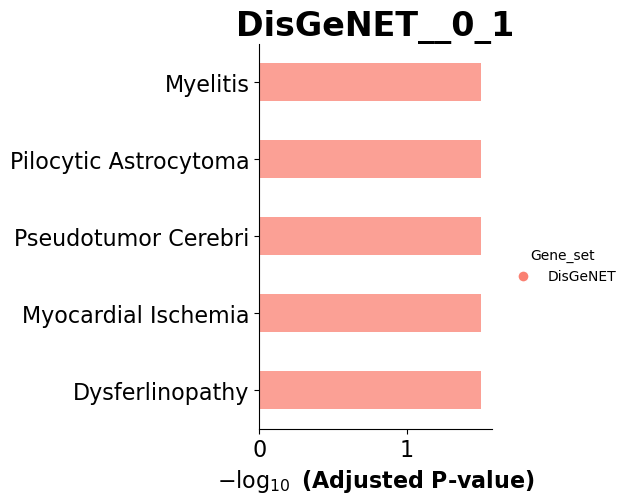

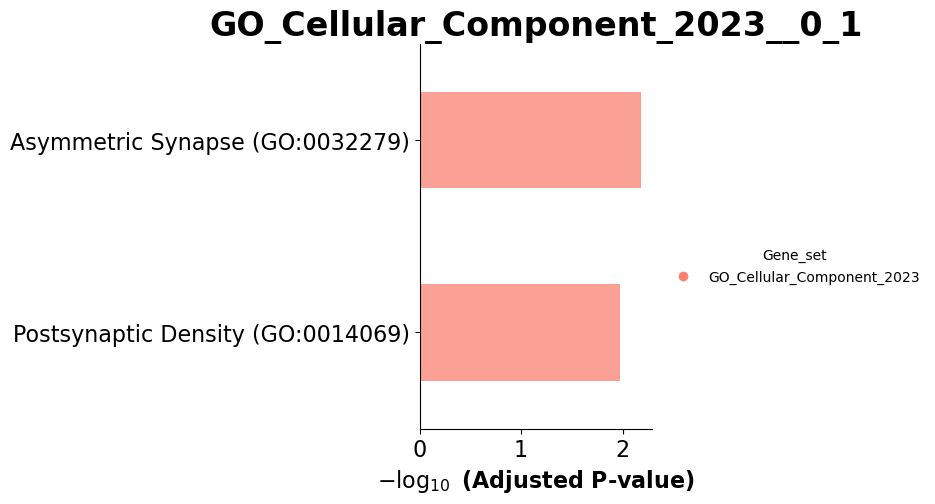

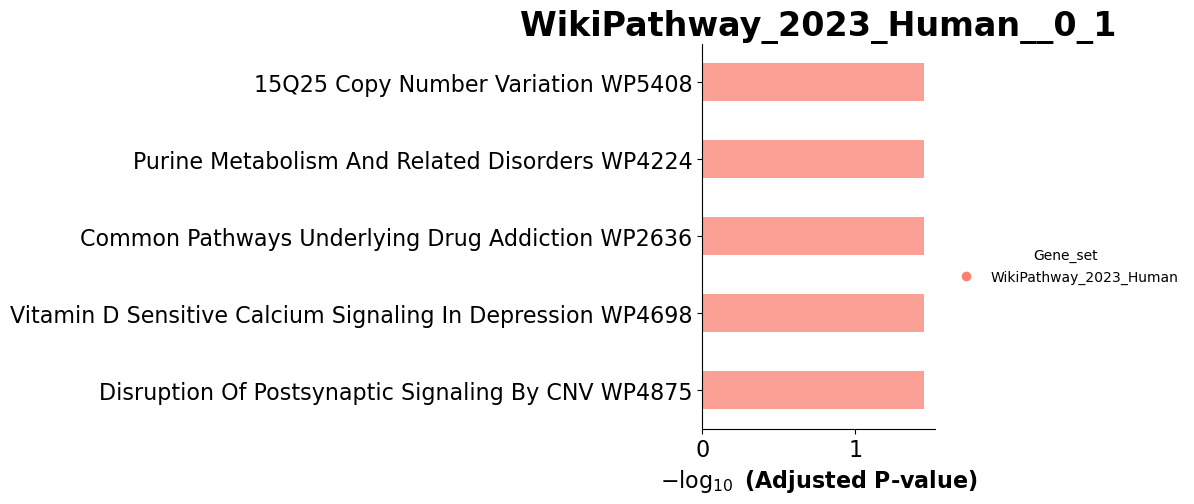

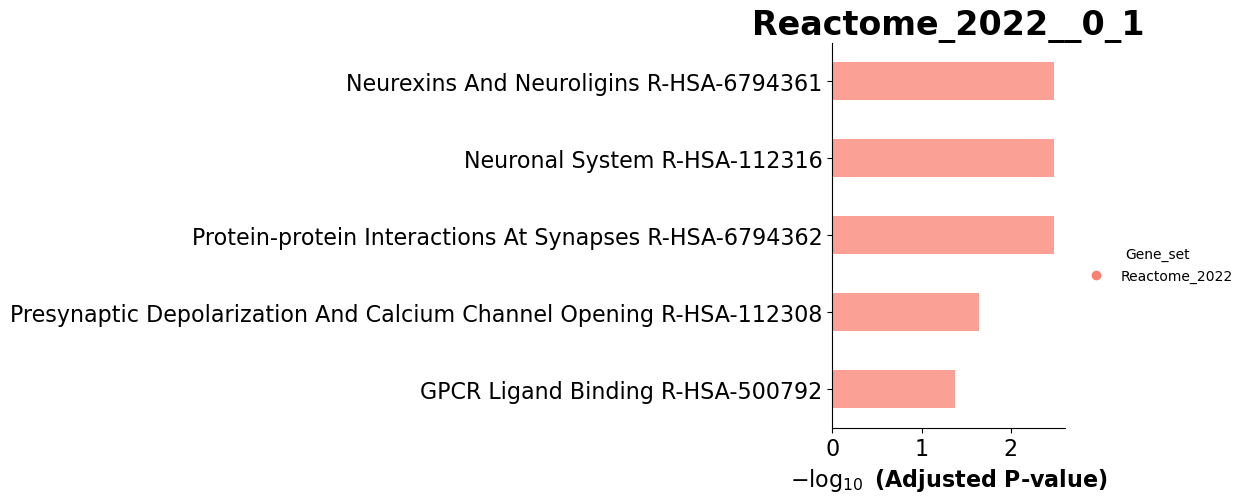

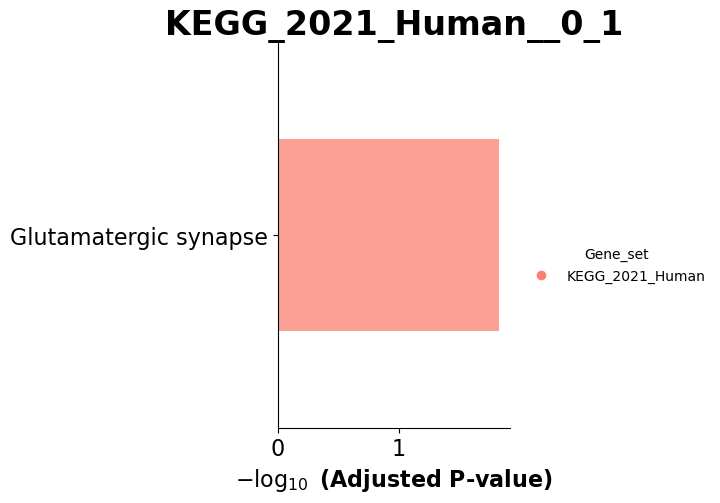

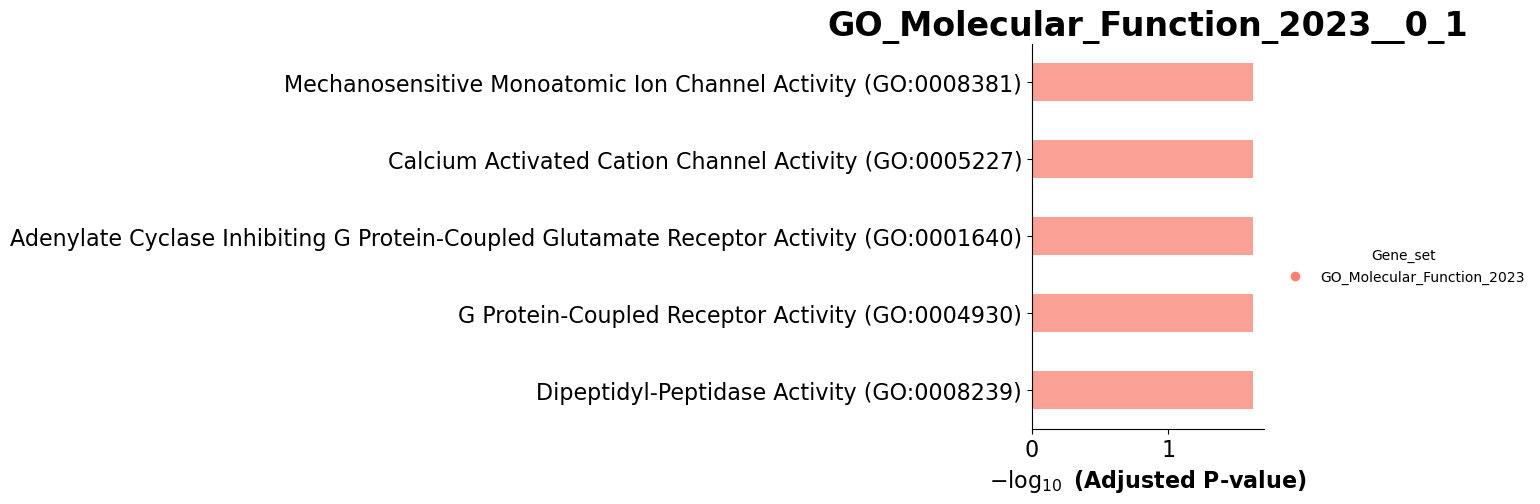

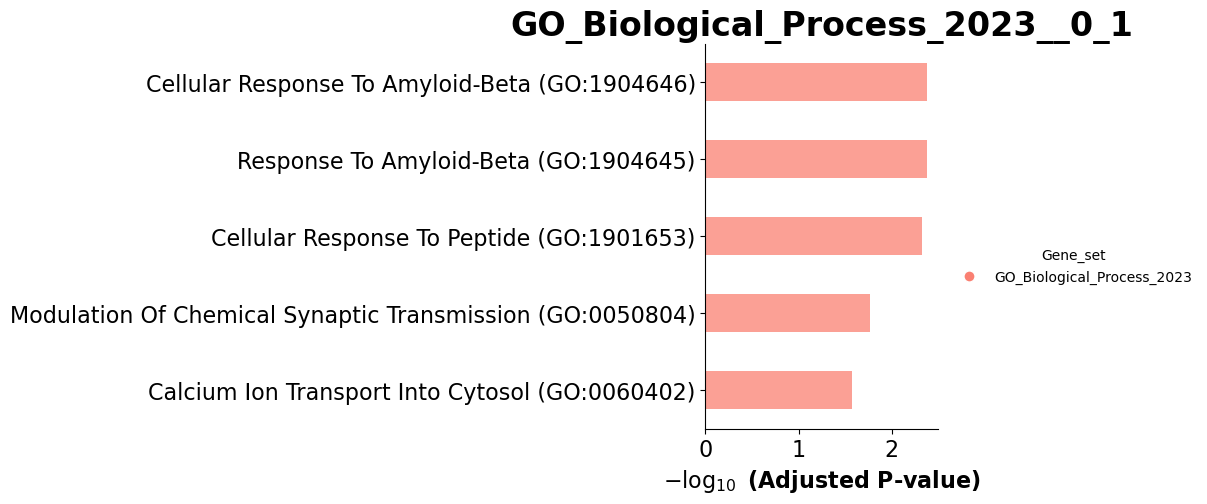

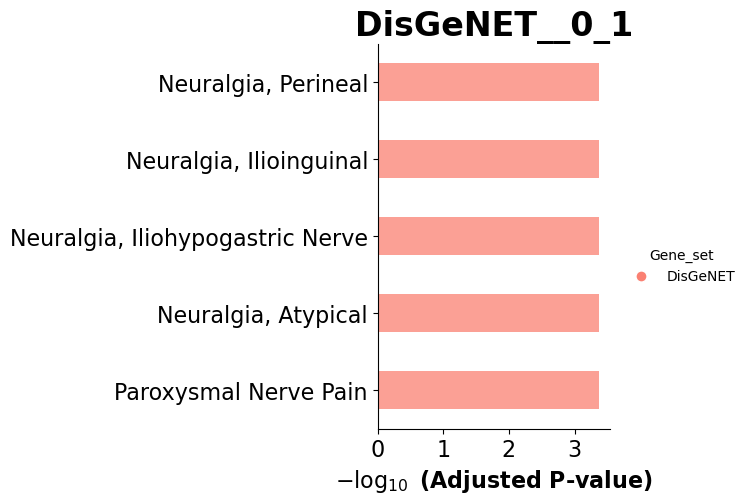

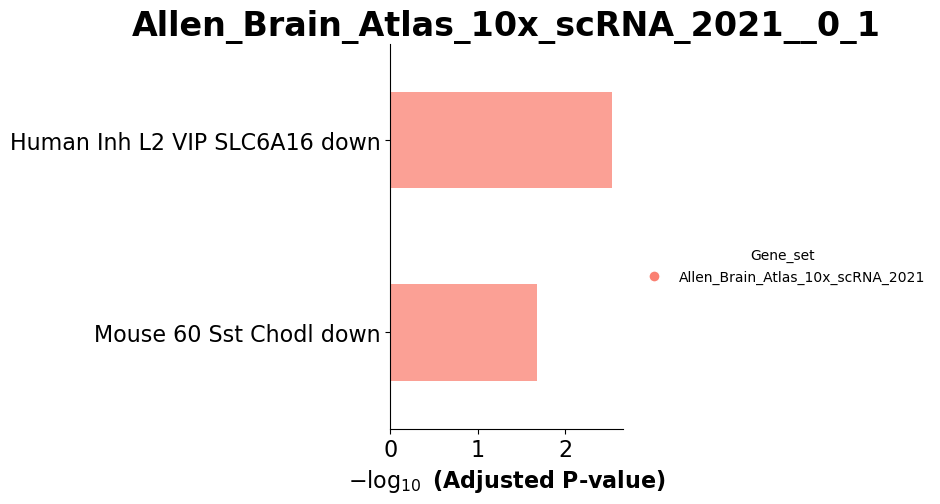

In [58]:
grouped = aggregate_network[aggregate_network.TF.isin(important_TF_0_1)].groupby('TF')
dataframe_0_1 = 0
for name, group in grouped:
    print(f"\nGroup: {name}")
    filtered_gene_set = list(group['Gene'].values)
    print(len(filtered_gene_set))
    try:
     filtered_gene_set = return_gene_name(filtered_gene_set)
    except:
        continue
    print(filtered_gene_set)
    databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']
    
    for i in databases:

        dataframe_tf_gene_0_1 = return_enriched_pathways(filtered_gene_set, adj_p_value = 0.05, gene_sets_databases =[i])
        
      
        try:
            plot_barplot(dataframe_tf_gene_0_1,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_1')
        except:
            continue
        if isinstance(dataframe_0_1, pd.DataFrame):
            dataframe_0_1 = pd.concat([dataframe_0_1,dataframe_tf_gene_0_1])
        else:
            
            dataframe_0_1 = dataframe_tf_gene_0_1


Group: ENSG00000092607
111
['DBNDD1', 'PI4K2B', 'PMS1', 'PKM', 'TBC1D25', 'CPSF1', 'NDE1', 'APLP2', 'DDX18', 'LZTS3', 'PIGU', 'SUV39H1', 'BNIP3L', 'TFR2', 'SFXN3', 'RPL28', 'ELP4', 'TBC1D30', 'PHC1', 'GNLY', 'EPAS1', 'CACYBP', 'CRIPT', 'SLC17A5', 'CISD1', 'MT1G', 'CFP', 'FGFRL1', 'MINDY2', 'SHFL', 'ZNF341', 'ZSCAN5A', 'POLR3F', 'IER3IP1', 'COL4A2', 'PWP1', 'CKAP2', 'MMAB', 'KCNH5', 'SIRT3', 'PEX14', 'RPL11', 'ZC3HAV1L', 'ZNF182', 'NRGN', 'CD109', 'TBC1D31', 'SLC38A10', 'ZC3H18', 'FGF17', 'DFFA', 'COX7A1', 'ACOX1', 'TPCN2', 'KCNF1', 'ERCC3', 'HDAC11', 'AIMP1', 'INTS1', 'FREM1', 'NUDT5', 'PLIN1', 'STXBP6', 'MAP3K2', 'EXOSC10', 'RCAN2', 'ABCG4', 'PLAC8L1', 'ANAPC2', 'ZDHHC13', 'LINC00304', 'TMEM259', 'KIAA2012', 'CLEC4G', 'GPR19', 'CMTM4', 'PSMD13', 'CYP2R1', 'PCDHB13', 'SLC38A3', 'ZNF600', 'TOGARAM2', 'MYO6', 'ZNF239', 'ZNF429', 'PELI1', 'ZNF808', 'NAGA', 'ZNF525', 'RNF39', 'TMEM170B', 'ZNF845', 'FAM240C', 'LINC01422', '', 'CDPF1P1', '', 'KRTAP5-AS1', '', 'PPP1R3E', 'TPM3P9', '', 'GAPDH

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



Group: ENSG00000144792
165
['USH1C', 'BRD9', 'SLC66A1', 'AP2S1', 'FAM107B', 'CD84', 'TUBA3D', 'RBMS2', 'KIF3C', 'MCOLN1', 'TGFB2', 'EFHC1', 'TSPAN15', 'TECR', 'RTCB', 'ARSA', 'SAMM50', 'GID8', 'KCND1', 'SRPX2', 'ABCC1', 'FBXO31', 'DNAJA3', 'KAT8', 'IQCH', 'DMXL2', 'TNFRSF10A', 'NFKBIB', 'DMPK', 'ZNF419', 'AHR', 'PITRM1', 'WNT3', 'VTN', 'TMEM33', 'ACCS', 'SUDS3', 'GCNT2', 'CUTA', 'PRPH2', 'EXOC2', 'NNT', 'LMAN2L', 'TTL', 'ITGA4', 'RMDN2', 'TMEM9', 'NPC2', 'ACOT2', 'SMNDC1', 'CDK2', 'TRAP1', 'ASPHD2', 'HIP1R', 'ZNF426', 'CHMP1A', 'KIF3A', 'ACTR10', 'SRRM1', 'AGAP3', 'MPHOSPH6', 'KIF12', 'LRRC1', 'RNF121', 'UNC13C', 'RAP1GDS1', 'SEC24B', 'DEF8', 'MINK1', 'GARIN5A', 'PRCC', 'RPS3A', 'ZMAT2', 'TTBK1', 'TIAM2', 'TATDN1', 'ADD3', 'FAM177A1', 'ZNF773', 'ZNF837', 'BMP6', 'FGD5', 'EPB41', 'THEM4', 'TCHH', 'TLCD1', 'EMC10', 'NEXN', 'CADPS', 'DNAJC5G', 'PBRM1', 'ABLIM2', 'GFM2', 'CGAS', 'PIGO', 'ZNF503', 'HPRT1', 'TRIM66', 'MFAP4', 'CCDC88B', 'METTL15', 'ZFPM2', 'TMEM182', 'PAQR8', 'SCAND1', 'SMN

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



Group: ENSG00000168826
223
['DPF1', 'PLEKHB1', 'UBA6', 'PI4K2B', 'ADAM28', 'ANO2', 'RRM2B', 'H6PD', 'NNAT', 'CYFIP2', 'SPEN', 'RRP15', 'POLB', 'ST6GALNAC2', 'TRIP13', 'PRKACA', 'PAG1', 'DDHD2', 'RAD54L', 'DNAJA1', 'EDEM2', 'PPP2R3C', 'PPP6R2', 'TRIP11', 'IFT52', 'BMP7', 'HRH3', 'MAP1LC3A', 'NOL4', 'TBL1X', 'RENBP', 'PQBP1', 'PBDC1', 'CDIPT', 'TJP1', 'STK3', 'MINDY4', 'LHX6', 'SFXN3', 'ARHGAP21', 'CPEB3', 'CASC3', 'USP46', 'SEPSECS', 'IL10RA', 'MDK', 'ACAD10', 'GMNN', 'UMPS', 'GPD2', 'TXNDC12', 'SPCS2', 'RAB32', 'LGALSL', 'SIL1', 'HERPUD2', 'CLTA', 'RNF11', 'ACOT9', 'IKZF4', 'LPGAT1', 'ZNF576', 'F13A1', 'SLC35B3', 'SLC25A23', 'ARMCX5', 'EIF2S2', 'SCAF1', 'PPAT', 'VPS13C', 'NRL', 'PLVAP', 'TRPM4', 'HELZ2', 'UBE2M', 'METTL26', 'DCAF8', 'ACY3', 'LPIN3', 'CCNA1', 'TPT1', 'C1QTNF6', 'ZDHHC8BP', 'HOOK1', 'CCDC146', 'NAT10', 'RNASEL', 'DHX9', 'ATIC', 'ITPRID2', 'NEIL1', 'BBS4', 'ABHD2', 'SH3GL3', 'PRDM15', 'MVB12A', 'ACKR3', 'SLC25A38', 'LIMD1', 'TMEM108', 'NCEH1', 'FBXL17', 'GFOD1', 'PM20D2'

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v


Group: ENSG00000254004
9
['BZW1', 'PRSS16', 'VIPR1', 'TMEM63B', 'CACNA2D1', 'GRM5', 'DNAJC18', 'DLGAP1', '']


/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v


Group: ENSG00000272602
117
['SKAP2', 'OPN3', 'ATP9A', 'PPP2R5B', 'ATP2A3', 'GNAS', 'ITGA6', 'SH3GLB1', 'TTC28', 'TCF20', 'PYGL', 'PNN', 'KLHL4', 'PSMD7', 'R3HCC1', 'PPP6R1', 'TRDMT1', 'PMP22', 'CRYAB', 'GTF2H3', 'FANCE', 'DNPH1', 'MRPS27', 'NEK4', 'RBM25', 'PFDN5', 'TRAP1', 'PPP1R1B', 'PATJ', 'STARD13', 'PTGFRN', 'RPS15A', 'CAPN9', 'PPM1B', 'BBS4', 'NPC1', 'STAC2', 'XPR1', 'LSP1P4', 'PDGFC', 'FAM50B', 'ACSL1', 'GRIA4', 'SAR1B', 'RASSF3', 'TOMM70', 'VSIG4', 'SLC26A2', 'ZFHX2-AS1', 'TSPAN18', 'DEDD', 'RBBP4', 'CDC42EP3', 'ATP1A1', 'IGFBP7', 'GLB1L', 'ICA1L', 'RAD54L2', 'TMEM144', 'PTTG1', 'SLC13A4', 'KCNV1', 'VEGFD', 'ZNF22-AS1', 'SMCO4', 'ZNF319', 'TMEM100', 'MC4R', 'ZNF668', 'CYB5D2', 'NPNT', 'HEXD', 'CHD3', 'RNF150', 'CLEC7A', 'CIMAP3', 'TNK1', 'EFCAB13', 'NPM1', 'RTKN2', 'GET1', 'FES', 'RPS17', 'FBXL7', 'POU6F1', 'BCR', 'ZNF546', 'RINL', 'LIN54', 'SPOCK3', 'TDRD7', 'FAM163B', 'NEK5', 'MTCO3P12', 'MT-CO3', 'C6orf163', 'ZBTB10', 'LOH12CR2', '', 'PHB2', 'C2CD4D', 'LINC02802', 'C2CD4D-A

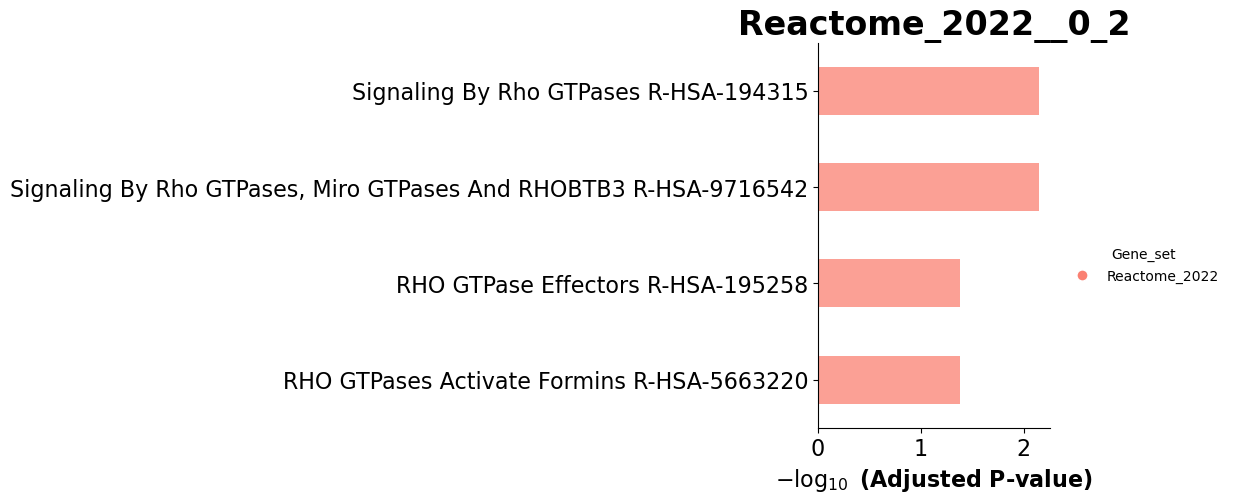

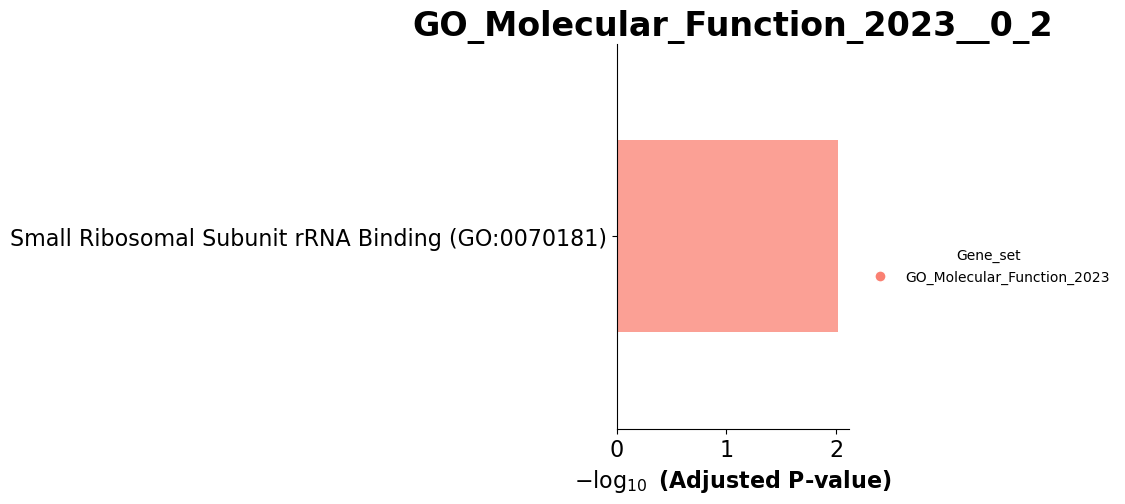

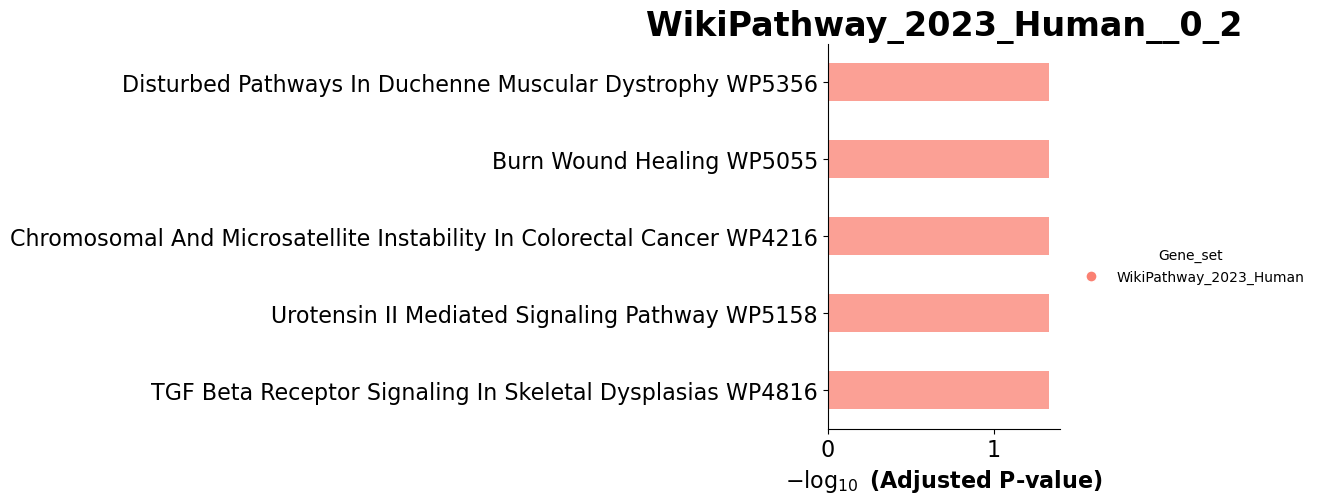

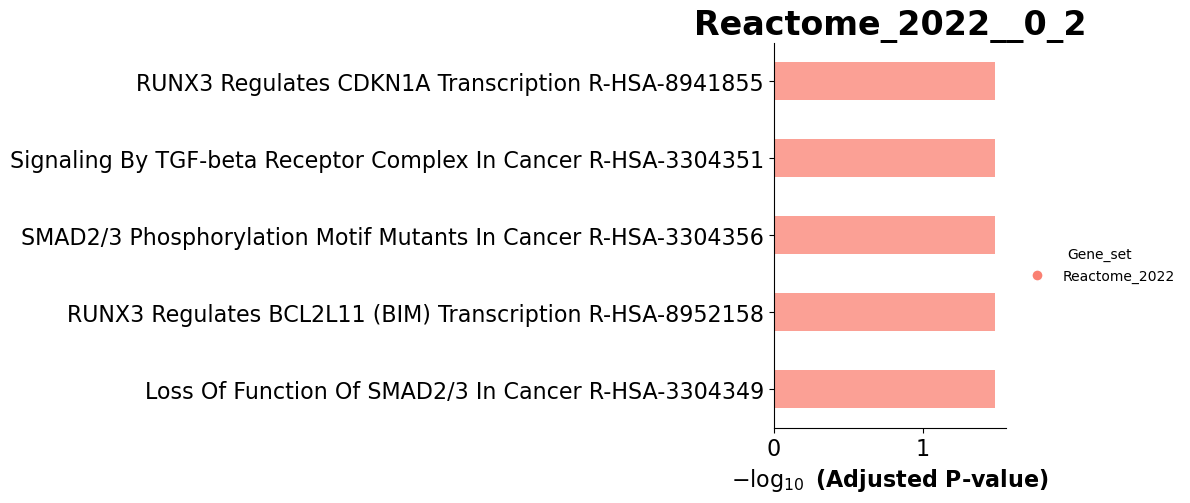

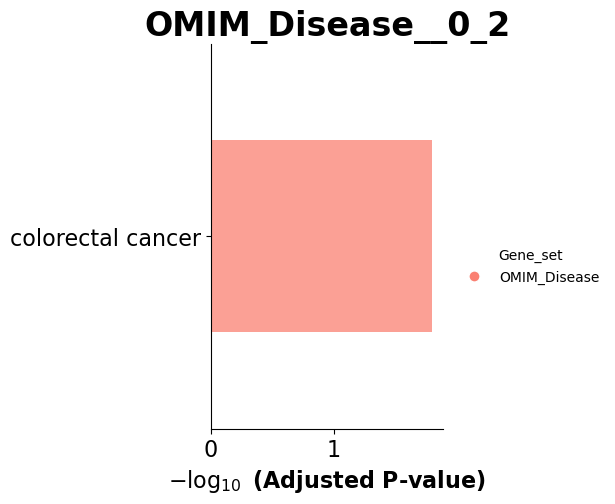

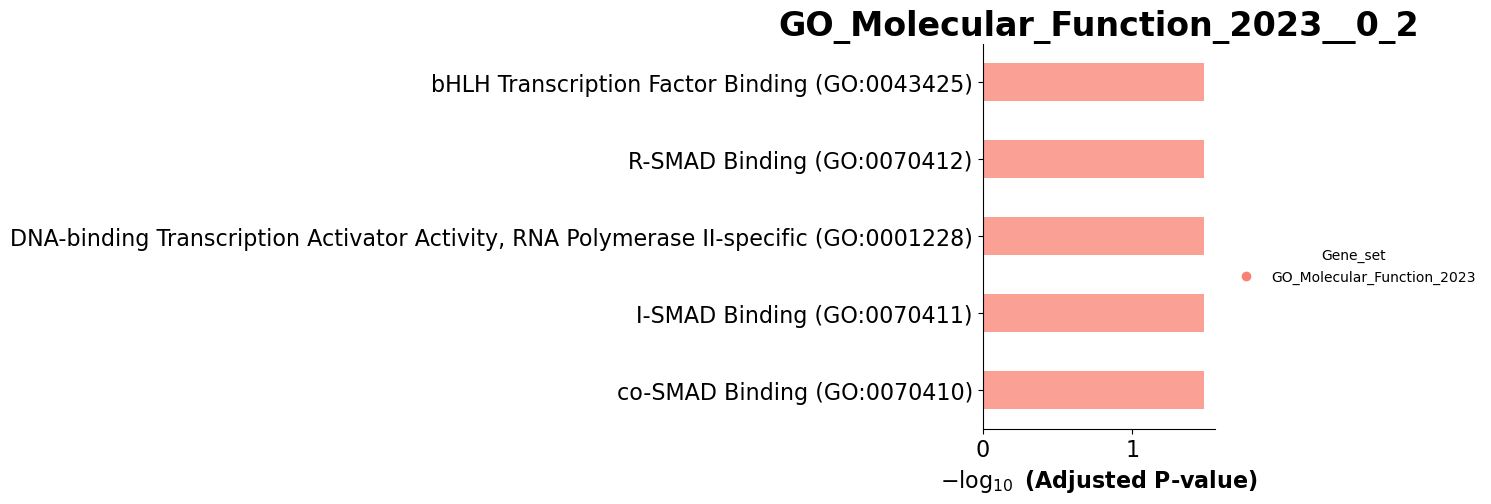

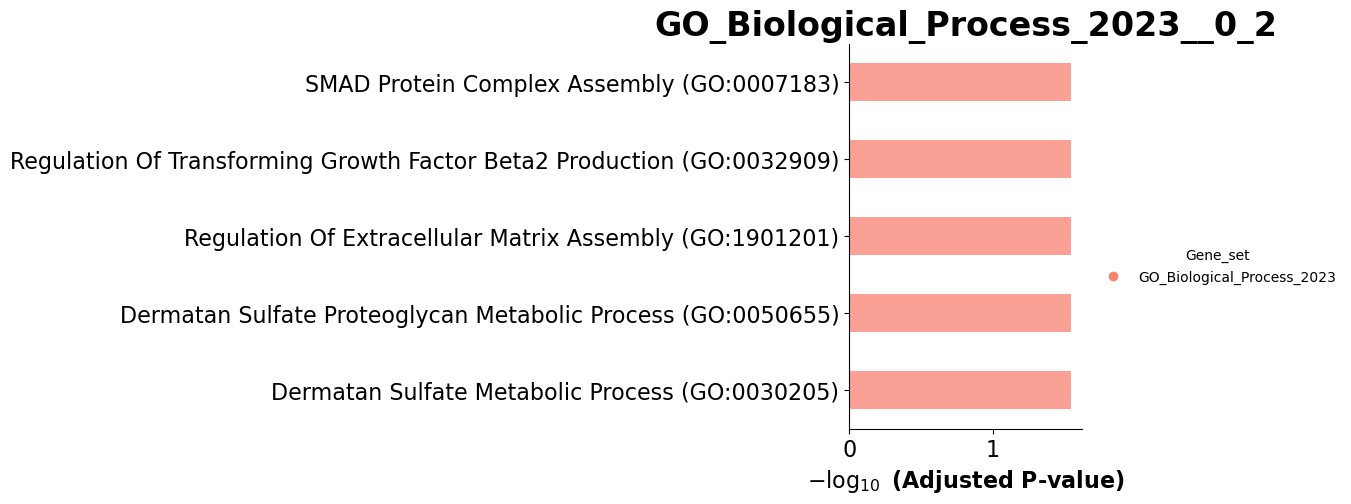

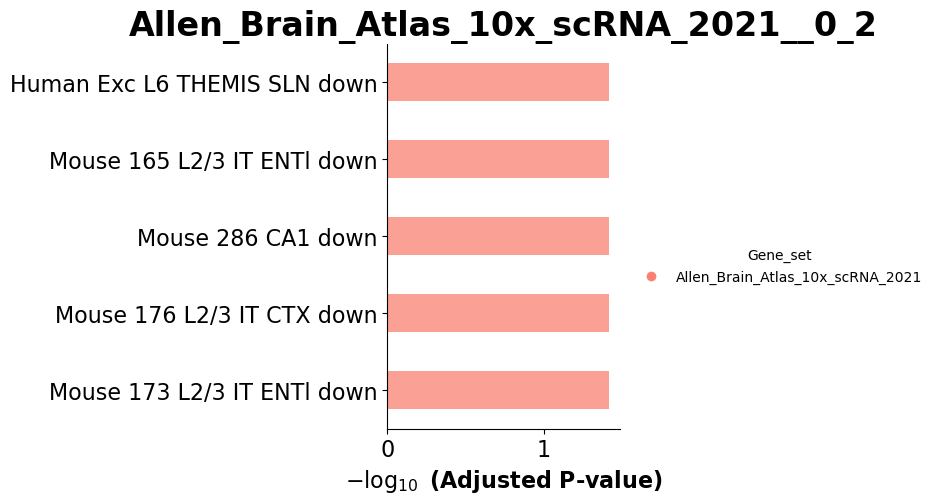

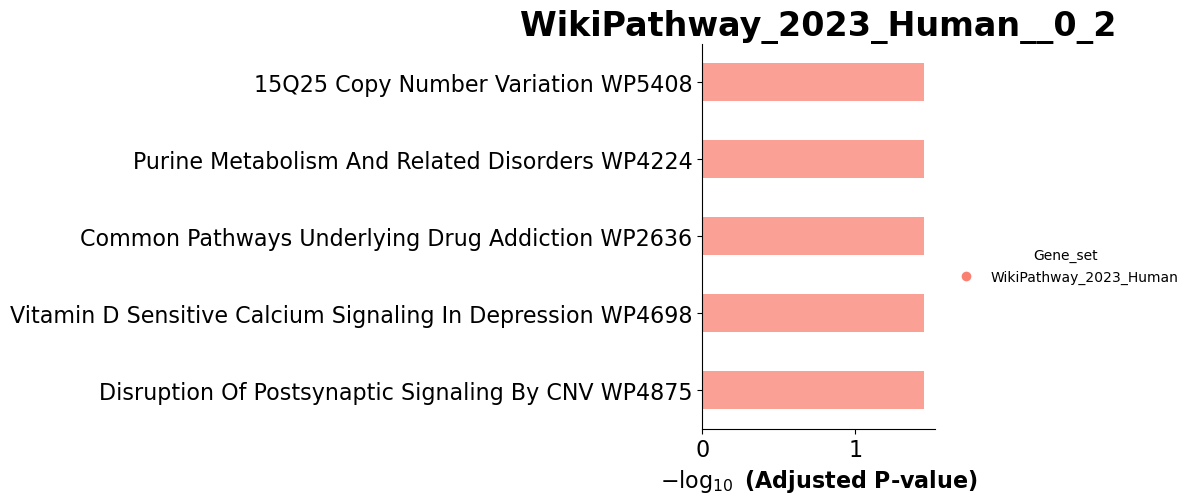

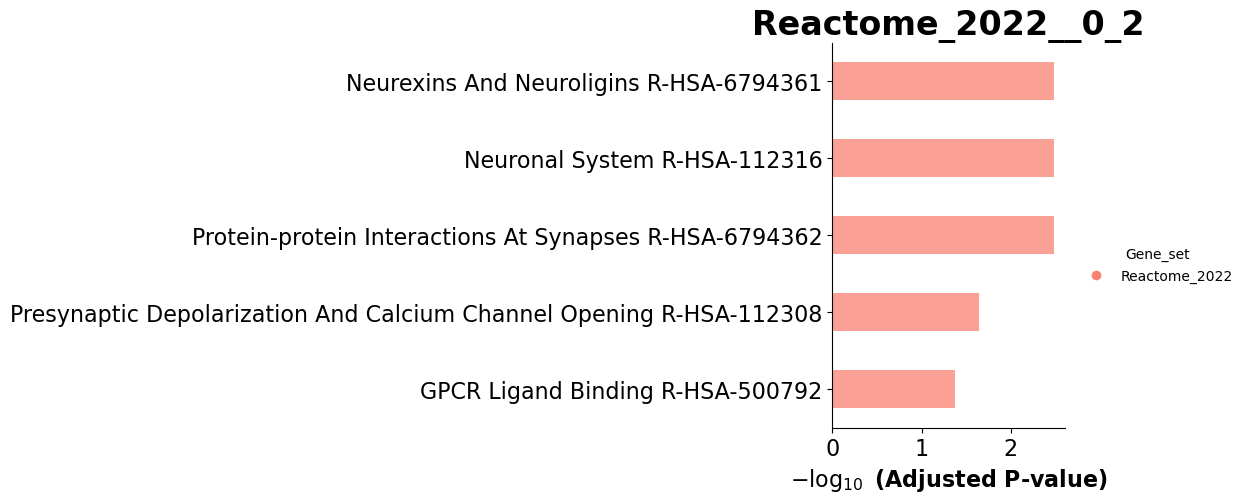

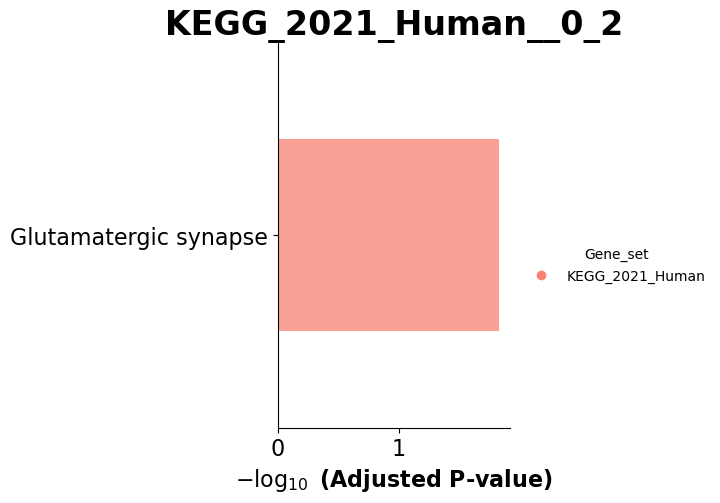

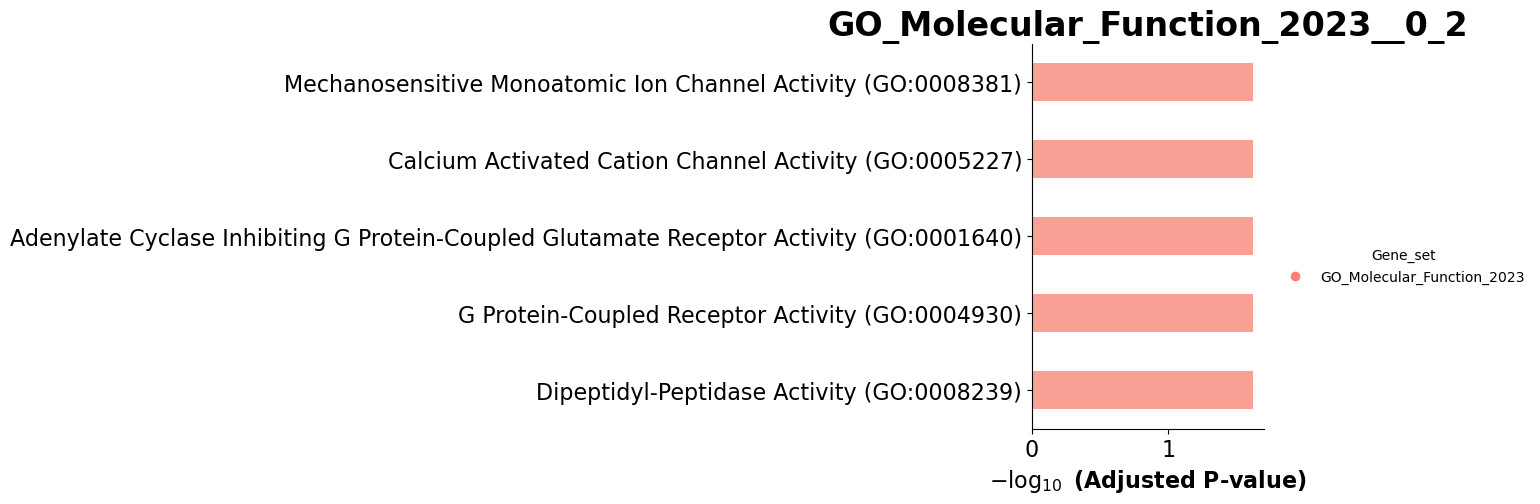

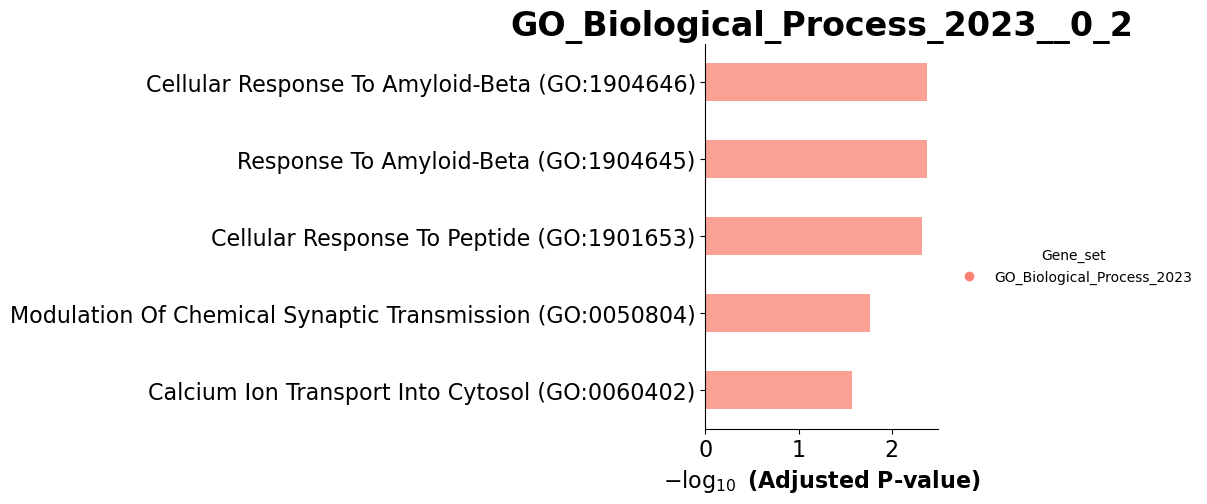

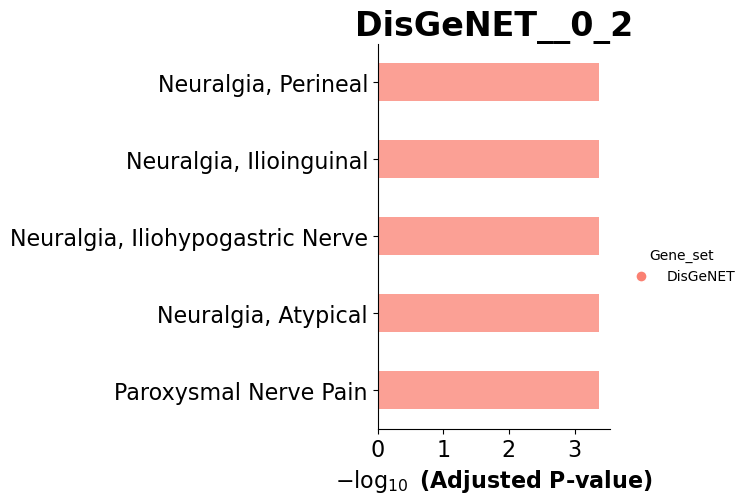

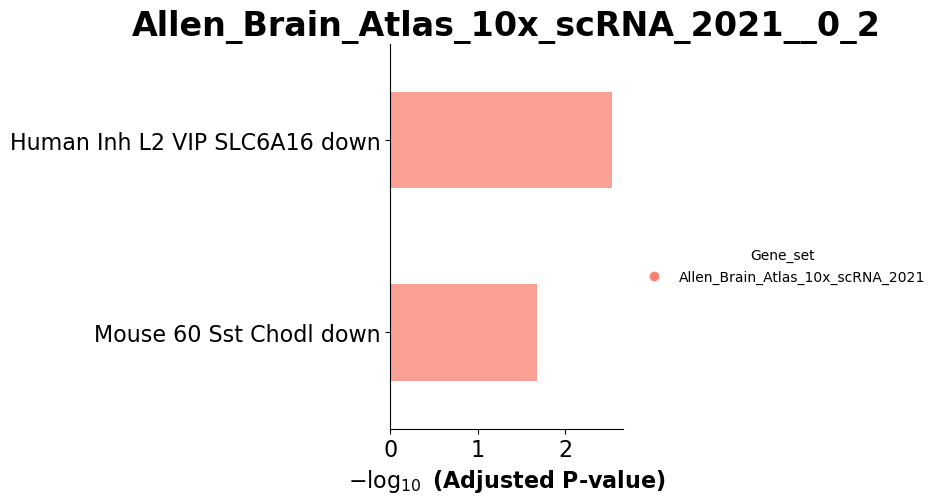

In [62]:
grouped = aggregate_network[aggregate_network.TF.isin(important_TF_0_2)].groupby('TF')
dataframe_0_2 = 0
for name, group in grouped:
    print(f"\nGroup: {name}")
    filtered_gene_set = list(group['Gene'].values)
    print(len(filtered_gene_set))
    try:
     filtered_gene_set = return_gene_name(filtered_gene_set)
    except:
        continue
    print(filtered_gene_set)
    databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']
    
    for i in databases:

        dataframe_tf_gene_0_2 = return_enriched_pathways(filtered_gene_set, adj_p_value = 0.05, gene_sets_databases =[i])
        
      
        try:
            plot_barplot(dataframe_tf_gene_0_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_2')
        except:
            continue
        if isinstance(dataframe_0_2, pd.DataFrame):
            dataframe_0_2 = pd.concat([dataframe_0_2,dataframe_tf_gene_0_2])
        else:
            
            dataframe_0_2 = dataframe_tf_gene_0_2


Group: ENSG00000009709
32
['CRY1', 'SMARCE1', 'SH3GLB1', 'POLI', 'TMEM205', 'NCS1', 'KHDRBS2', 'PHF1', 'YIPF3', 'KIAA0319', 'VASH2', 'SLC7A11', 'CABP1', 'PWWP3A', 'BOLA3', 'CIP2A', 'TNKS', 'ZNF408', 'ARHGAP1', 'ATG13', 'HARBI1', 'FBXL7', 'SMTN', 'DMWD', 'AMZ2P1', 'LINC00299', 'TUNAR', '', '', '', 'RAB11B-AS1', '']

Group: ENSG00000083812
222
['NIPAL3', 'ADAM22', 'MLXIPL', 'RNF14', 'PRKCH', 'ZCCHC8', 'PSMA4', 'ELP1', 'WIPI1', 'ASNS', 'ACTR6', 'VDAC3', 'OSTM1', 'CPNE3', 'TGDS', 'EBF4', 'TNRC6A', 'TBC1D2', 'HNRNPH3', 'SEZ6L', 'HPS4', 'TTLL12', 'APOL4', 'PGRMC1', 'NKAP', 'CENPT', 'ENTREP2', 'BPNT2', 'SPAG1', 'CD37', 'C19orf53', 'CLIP3', 'PON2', 'ADAP1', 'CPVL', 'EIF4H', 'EZH1', 'RCVRN', 'TMEM97', 'LAMTOR3', 'FAM149A', 'BCL7A', 'STK38', 'ASCC3', 'EHHADH', 'PCCB', 'NEK4', 'PSMD14', 'HDLBP', 'CRYZ', 'ATP10B', 'SGK1', 'RBM25', 'SMNDC1', 'GNA13', 'RPL21', 'SCAF1', 'ELK1', 'TMEM175', 'PLA2G5', 'OSGEPL1', 'ACTR10', 'FBXW9', 'BTBD2', 'CCNB1', 'APC', 'CHST12', 'IREB2', 'DCTN3', 'ATAT1', 'PPCDC', '

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



Group: ENSG00000120693
3
['SLC9B2', 'MATCAP2', 'TMEM70']


/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v


Group: ENSG00000122386
163
['ARSD', 'SLC6A7', 'DDX11', 'ARID4A', 'RPL26L1', 'AGA', 'YTHDC2', 'TNPO3', 'SMARCE1', 'MLLT10', 'DIS3', 'PIBF1', 'SLC17A6', 'SYDE2', 'SNRPD3', 'TNFSF13B', 'HAS3', 'ITGB8', 'IQCE', 'PTPRZ1', 'UBTF', 'MYH3', 'SLC1A2', 'P3H3', 'SYT10', 'TARS1', 'FAM20B', 'SGK1', 'NEK9', 'ARAP3', 'ARL1', 'CXCR4', 'NAA60', 'ITIH5', 'PFDN5', 'MRPS12', 'RPA1', 'POLR3F', 'MUTYH', 'SLC41A1', 'TCEAL4', 'SBF2', 'RABEPK', 'BCAR3', 'PREPL', 'TRPC3', 'LEF1', 'ZCRB1', 'VAMP1', 'RPL14P1', 'SSTR1', 'ZNF710', 'NCOR1', 'TRIM65', 'ARHGEF19', 'PRCC', 'SOX13', 'CAMKMT', 'SFXN5', 'ARL6IP5', 'TPBG', 'NDUFB11', 'NSD3', 'MZT2B', 'ZNF776', 'ZNF837', 'PAN3', 'ABCA9', 'RBM45', 'TTN', 'TMBIM4', 'RBPMS', 'FZD1', 'TNFRSF14', 'FGF17', 'NEXN', 'IGSF8', 'KCNJ3', 'PYGO2', 'SMIM14', 'BSN', 'CAMKV', 'GASK1B', 'ANKRA2', 'ANKS6', 'VPS39', 'TTC16', 'TOX-DT', 'FAM234A', 'RAB3IL1', 'TNIP2', 'INPP5D', 'NFXL1', 'ATF7IP', 'FBXL14', 'DPAGT1', 'KCNK7', 'LRFN4', 'TIGD3', 'TNK1', 'LPCAT4', 'PFN4', 'TCEANC', 'FBXO46', 'ALOXE

/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



Group: ENSG00000197714
3
['ANKRD52', 'DNAJA4', 'FOXJ3']


/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/opt/conda/envs/netzoopy/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future v


Group: ENSG00000272602
117
['SKAP2', 'OPN3', 'ATP9A', 'PPP2R5B', 'ATP2A3', 'GNAS', 'ITGA6', 'SH3GLB1', 'TTC28', 'TCF20', 'PYGL', 'PNN', 'KLHL4', 'PSMD7', 'R3HCC1', 'PPP6R1', 'TRDMT1', 'PMP22', 'CRYAB', 'GTF2H3', 'FANCE', 'DNPH1', 'MRPS27', 'NEK4', 'RBM25', 'PFDN5', 'TRAP1', 'PPP1R1B', 'PATJ', 'STARD13', 'PTGFRN', 'RPS15A', 'CAPN9', 'PPM1B', 'BBS4', 'NPC1', 'STAC2', 'XPR1', 'LSP1P4', 'PDGFC', 'FAM50B', 'ACSL1', 'GRIA4', 'SAR1B', 'RASSF3', 'TOMM70', 'VSIG4', 'SLC26A2', 'ZFHX2-AS1', 'TSPAN18', 'DEDD', 'RBBP4', 'CDC42EP3', 'ATP1A1', 'IGFBP7', 'GLB1L', 'ICA1L', 'RAD54L2', 'TMEM144', 'PTTG1', 'SLC13A4', 'KCNV1', 'VEGFD', 'ZNF22-AS1', 'SMCO4', 'ZNF319', 'TMEM100', 'MC4R', 'ZNF668', 'CYB5D2', 'NPNT', 'HEXD', 'CHD3', 'RNF150', 'CLEC7A', 'CIMAP3', 'TNK1', 'EFCAB13', 'NPM1', 'RTKN2', 'GET1', 'FES', 'RPS17', 'FBXL7', 'POU6F1', 'BCR', 'ZNF546', 'RINL', 'LIN54', 'SPOCK3', 'TDRD7', 'FAM163B', 'NEK5', 'MTCO3P12', 'MT-CO3', 'C6orf163', 'ZBTB10', 'LOH12CR2', '', 'PHB2', 'C2CD4D', 'LINC02802', 'C2CD4D-A

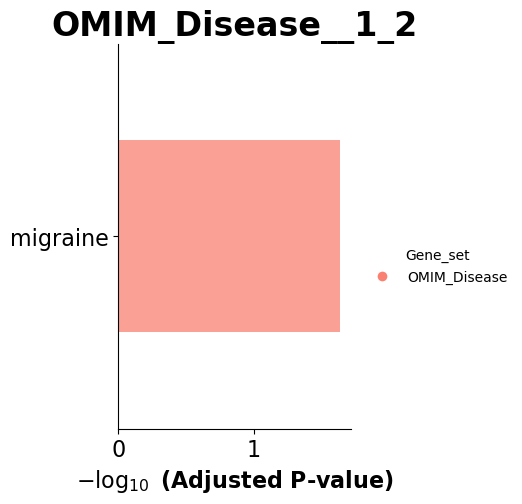

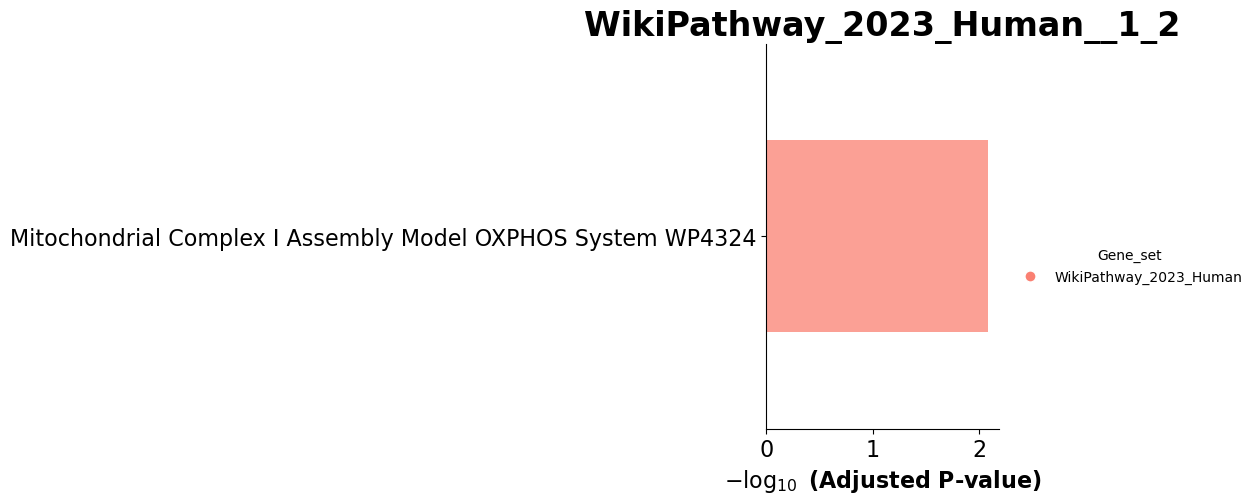

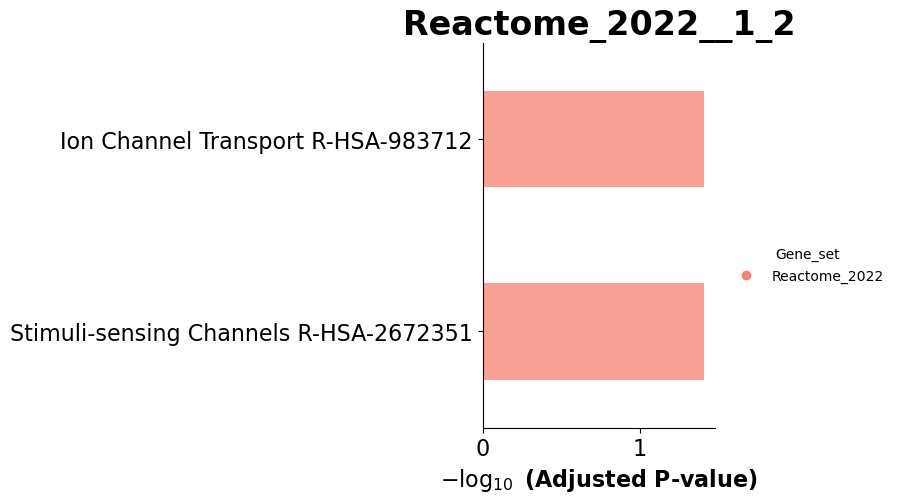

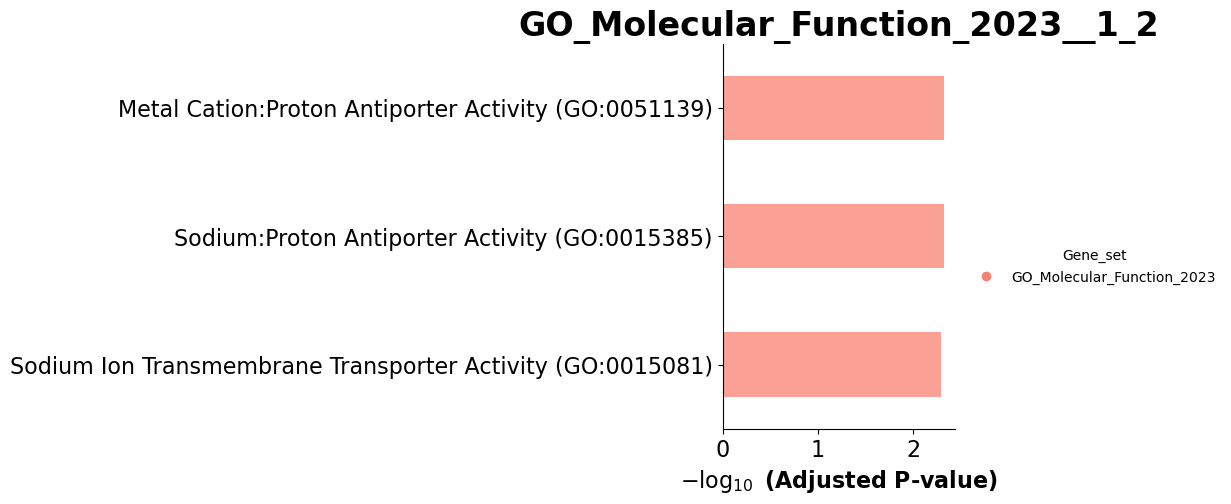

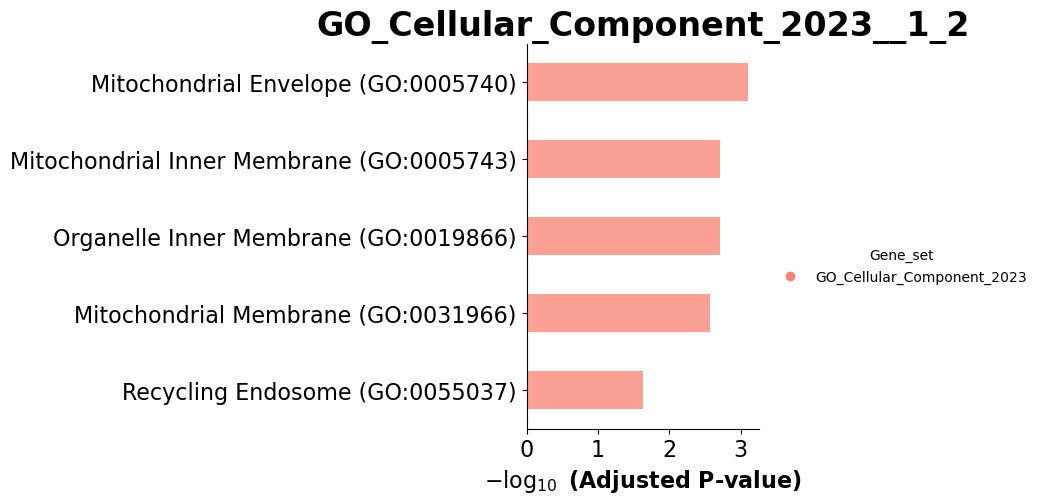

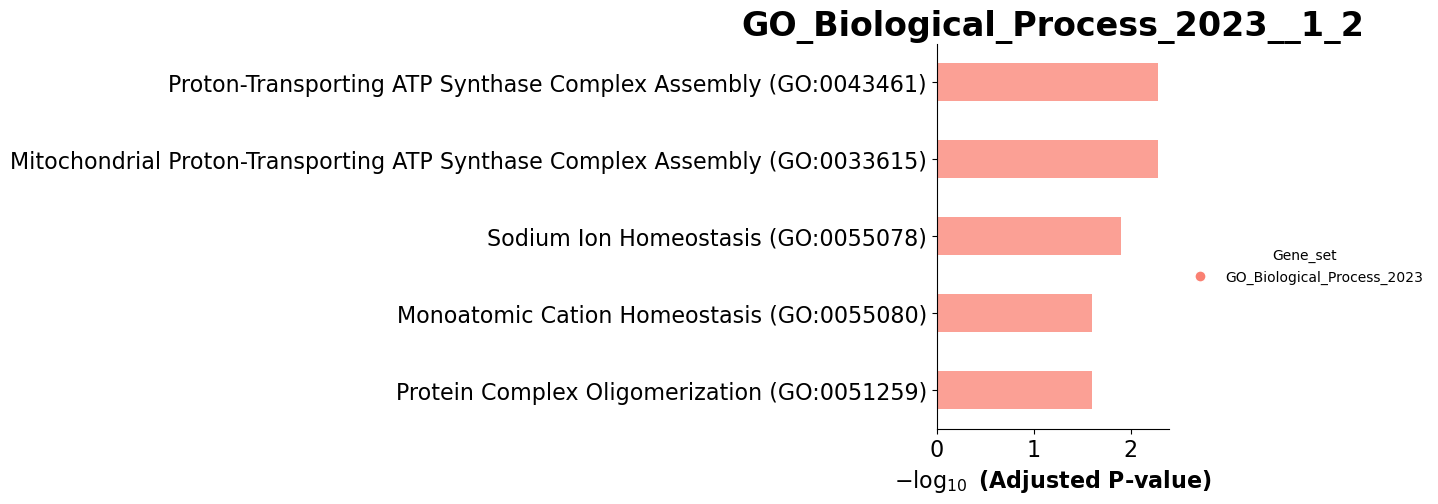

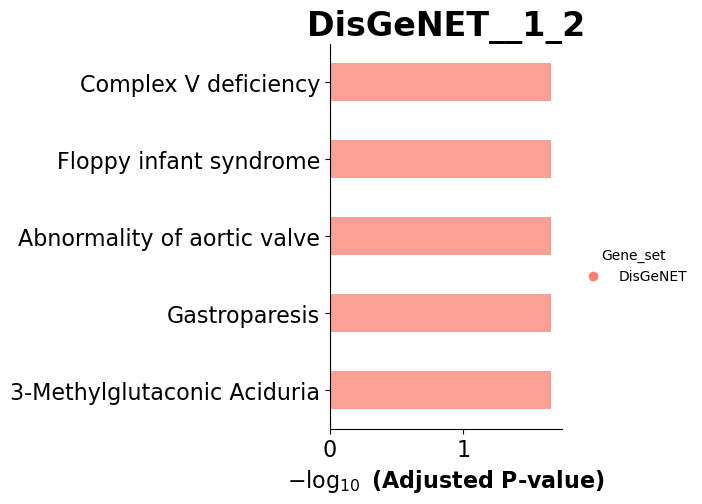

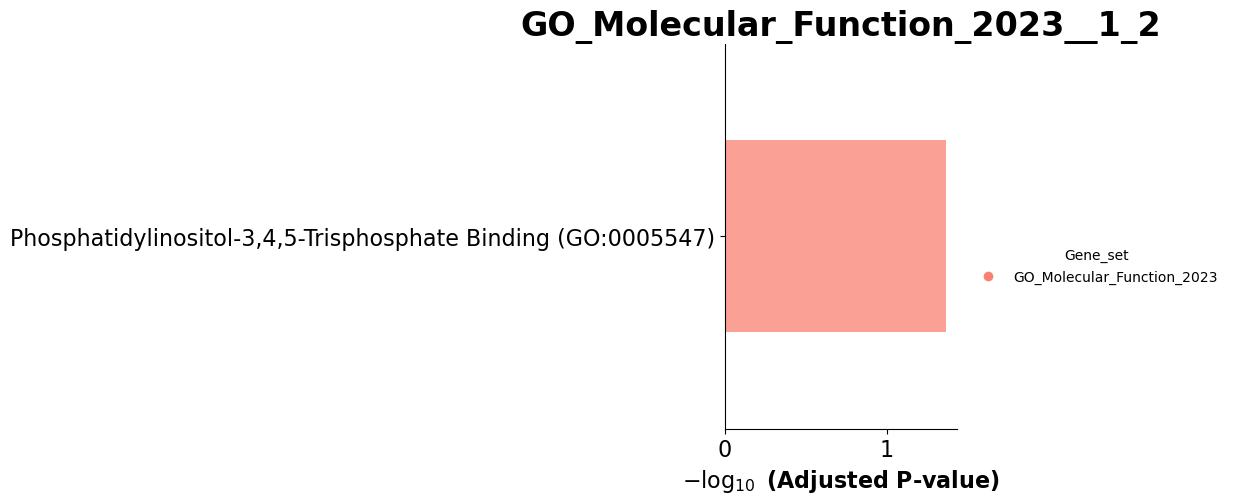

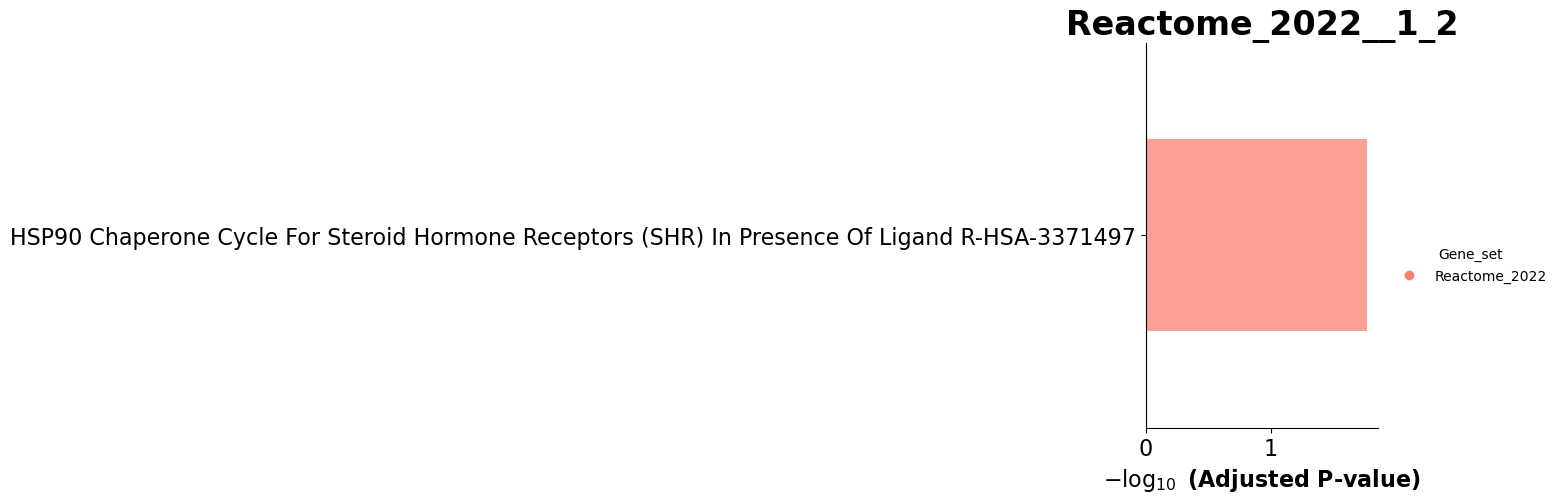

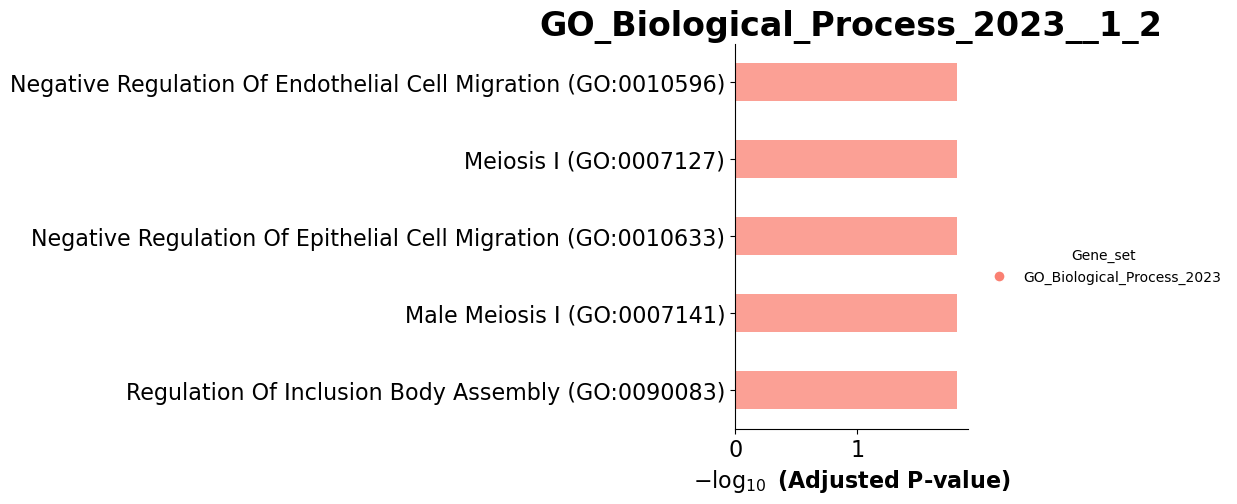

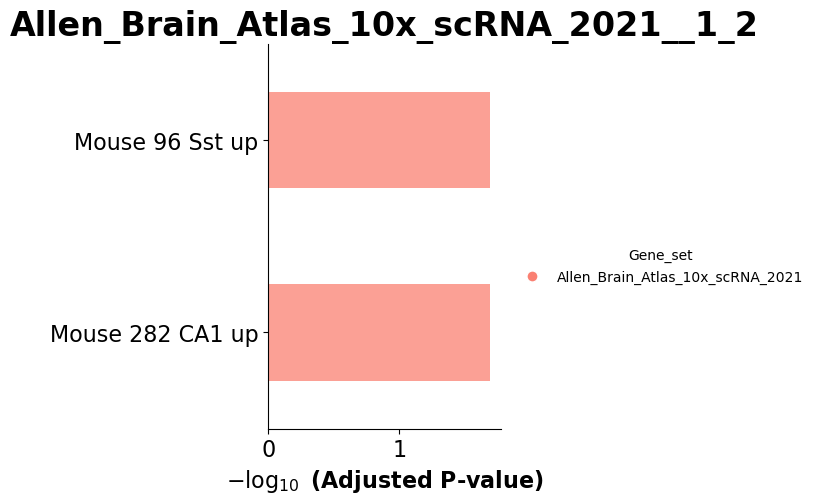

In [63]:
grouped = aggregate_network[aggregate_network.TF.isin(important_TF_1_2)].groupby('TF')
dataframe_1_2 = 0
for name, group in grouped:
    print(f"\nGroup: {name}")
    filtered_gene_set = list(group['Gene'].values)
    print(len(filtered_gene_set))
    try:
     filtered_gene_set = return_gene_name(filtered_gene_set)
    except:
        continue
    print(filtered_gene_set)
    databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']
    
    for i in databases:

        dataframe_tf_gene_1_2 = return_enriched_pathways(filtered_gene_set, adj_p_value = 0.05, gene_sets_databases =[i])
        
      
        try:
            plot_barplot(dataframe_tf_gene_1_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_1_2')
        except:
            continue
        if isinstance(dataframe_1_2, pd.DataFrame):
            dataframe_1_2 = pd.concat([dataframe_1_2,dataframe_tf_gene_1_2])
        else:
            
            dataframe_1_2 = dataframe_tf_gene_1_2

# Differential Expression Analysis

In [21]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats


In [22]:
!mkdir ./output_files
!mkdir ./synthetic_example

mkdir: cannot create directory ‘./output_files’: File exists
mkdir: cannot create directory ‘./synthetic_example’: File exists


In [23]:
# Replace this with the path to directory where you would like results to be saved
OUTPUT_PATH = "./output_files/synthetic_example/"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

In [24]:
DATA_PATH = "https://raw.githubusercontent.com/owkin/PyDESeq2/main/datasets/synthetic/"

# %% Loading counts
counts_df = pd.read_csv(os.path.join(DATA_PATH, "test_counts.csv"), index_col=0)
print(counts_df)

        sample1  sample2  sample3  sample4  sample5  sample6  sample7  \
gene1        12        1        4        1        1        0        0   
gene2        21       44        4       10       11        8       14   
gene3         4        2       11        2        6        2       17   
gene4       130       63      180      100      135       36      159   
gene5        18       11       21       44       16       26       11   
gene6         0       10        3        9        2        3       19   
gene7        16       70       28       28       32       36       39   
gene8        54       32       34       16       29       42       22   
gene9        49       57       65       33       31       42       38   
gene10        3        9        2        9        5       17        6   

        sample8  sample9  sample10  ...  sample91  sample92  sample93  \
gene1         2        5        18  ...         0         9         5   
gene2        19       19        11  ...        31 

In [33]:
counts_df = counts_df.T
print(counts_df)

# %% Loading annotations
metadata = pd.read_csv(os.path.join(DATA_PATH, "test_metadata.csv"), index_col=0)
print(metadata)

           gene1  gene2  gene3  gene4  gene5  gene6  gene7  gene8  gene9  \
sample1       12     21      4    130     18      0     16     54     49   
sample2        1     44      2     63     11     10     70     32     57   
sample3        4      4     11    180     21      3     28     34     65   
sample4        1     10      2    100     44      9     28     16     33   
sample5        1     11      6    135     16      2     32     29     31   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
sample96       7     26      3     67     11      4     41     44     54   
sample97       1     14      3     71     33      5     19     42     25   
sample98      10     36      2     72     11      2     66     27     16   
sample99      18     14      3     66     53     11     32     19     79   
sample100     21      9      3     42     13     13     19     78     30   

           gene10  
sample1         3  
sample2         9  
sample3         2  
sample4

In [34]:
samples_to_keep = ~metadata.condition.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [35]:
metadata

condition group
sample1           A     X
sample2           A     Y
sample3           A     X
sample4           A     Y
sample5           A     X
...             ...   ...
sample96          B     Y
sample97          B     X
sample98          B     Y
sample99          B     X
sample100         B     Y

[100 rows x 2 columns]

In [36]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

In [ ]:
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...


In [ ]:
print(dds)

In [ ]:
print(dds.varm["dispersions"])

# %%

print(dds.varm["LFC"])

In [ ]:
stat_res = DeseqStats(dds, inference=inference)


In [ ]:

stat_res.summary()


In [ ]:
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "results.csv"))

In [64]:
!pwd

/cephyr/NOBACKUP/groups/naiss2023-23-453/Gene_Regulatory_Network_ROSMAP/code/New_GRN_ROSMAP/code/community_detection_Tf
